In [172]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})

In [173]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/edwan70/Datasets/main/MinilinkDB.csv', 
                        sep=';', header= None, names = ['date_time', 'CenDoob1', 'CenDoob2', 
                                                                     'DoobCen1', 'DoobCen2',
                                                                     'CenPenay1', 'CenPenay2', 
                                                                     'PenayCen1', 'PenayCen2'])
df_2 = pd.read_csv('https://raw.githubusercontent.com/edwan70/Datasets/main/MinilinkDB_1.csv',
                          sep=';', header= None, names = ['date_time', 'CenDoob1', 'CenDoob2', 
                                                                     'DoobCen1', 'DoobCen2',
                                                                     'CenPenay1', 'CenPenay2', 
                                                                     'PenayCen1', 'PenayCen2'])

In [174]:
df_1

date_time CenDoob1 CenDoob2 DoobCen1 DoobCen2 CenPenay1 CenPenay2  \
0        10.7.19 7:21    -55,7    -69,1      -53    -46,9     -48,3       -44   
1        10.7.19 7:31    -57,9      -57    -51,9    -47,3     -45,6     -50,4   
2        10.7.19 7:41    -56,3      -62    -51,9    -47,3       -45     -51,5   
3        10.7.19 7:51    -55,6    -66,7    -51,9    -46,9     -45,3     -49,7   
4        10.7.19 8:01    -56,3    -70,4    -52,2    -45,7     -45,9     -48,8   
...               ...      ...      ...      ...      ...       ...       ...   
144568  8.16.22 13:30    -46,2    -44,8    -52,6    -44,7     -46,3     -44,4   
144569  8.16.22 13:40    -46,6      -45    -52,3    -45,6     -46,9       -44   
144570  8.16.22 13:50    -46,5    -45,3    -51,9    -45,3     -46,1     -44,4   
144571  8.16.22 14:00    -47,7    -44,7    -52,6    -45,1     -47,9     -43,8   
144572  8.16.22 14:10    -46,1    -45,6    -48,8      -46     -46,6     -44,7   

       PenayCen1 PenayCen2  
0            -45     -45,7  
1          -40,6     -43,8  
2          -40,2     -44,4  
3          -40,6     -44,4  
4          -41,2     -44,1  
...          ...       ...  
144568       -43     -45,1  
144569     -42,6     -45,3  
144570     -43,8     -45,6  
144571     -43,2     -45,6  
144572     -43,3     -45,9  

[144573 rows x 9 columns]

In [175]:
df_2

date_time CenDoob1 CenDoob2 DoobCen1 DoobCen2 CenPenay1 CenPenay2  \
0       4.18.21 8:30    -53,4    -49,1      -50    -44,7     -50,7     -40,5   
1       4.18.21 8:40    -48,8      -66      -46    -46,1     -44,7     -45,6   
2       4.18.21 8:50    -56,6      -48    -51,6    -44,7     -43,1     -55,8   
3       4.18.21 9:00      -54    -44,7    -61,7      -45       -43     -55,3   
4       4.18.21 9:10    -53,2    -43,8    -60,2    -45,1     -57,4       -45   
...              ...      ...      ...      ...      ...       ...       ...   
79367  11.14.22 1:35    -48,8    -43,5    -53,1      -46       -45       -46   
79368  11.14.22 1:45    -50,3    -45,3    -55,2    -45,8     -44,7     -46,9   
79369  11.14.22 1:55    -51,5    -44,7    -55,5    -45,7       -45     -46,7   
79370  11.14.22 2:05    -50,9      -46    -55,2    -45,8     -44,7     -45,9   
79371  11.14.22 2:15      -51      -44    -55,8    -45,3     -44,1     -45,6   

      PenayCen1 PenayCen2  
0         -42,4     -43,8  
1         -41,9     -43,8  
2         -43,1       -45  
3         -44,3     -46,7  
4         -43,2     -45,6  
...         ...       ...  
79367     -43,5     -44,7  
79368       -43     -44,7  
79369     -42,6     -44,9  
79370     -42,8       -45  
79371     -42,5       -45  

[79372 rows x 9 columns]

In [176]:
df_1.isnull().sum()

date_time     0
CenDoob1      0
CenDoob2      0
DoobCen1      0
DoobCen2      0
CenPenay1    46
CenPenay2    46
PenayCen1    46
PenayCen2    46
dtype: int64

In [177]:
df_2.isnull().sum()

date_time    0
CenDoob1     0
CenDoob2     0
DoobCen1     0
DoobCen2     0
CenPenay1    0
CenPenay2    0
PenayCen1    0
PenayCen2    0
dtype: int64

In [178]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_1["CenPenay1"] = imputer.fit_transform(df_1["CenPenay1"].values.reshape(-1,1))[:,0]
df_1["CenPenay2"] = imputer.fit_transform(df_1["CenPenay2"].values.reshape(-1,1))[:,0]
df_1["PenayCen1"] = imputer.fit_transform(df_1["PenayCen1"].values.reshape(-1,1))[:,0]
df_1["PenayCen2"] = imputer.fit_transform(df_1["PenayCen2"].values.reshape(-1,1))[:,0]

In [179]:
df_1.isnull().sum()

date_time    0
CenDoob1     0
CenDoob2     0
DoobCen1     0
DoobCen2     0
CenPenay1    0
CenPenay2    0
PenayCen1    0
PenayCen2    0
dtype: int64

In [180]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144573 entries, 0 to 144572
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date_time  144573 non-null  object
 1   CenDoob1   144573 non-null  object
 2   CenDoob2   144573 non-null  object
 3   DoobCen1   144573 non-null  object
 4   DoobCen2   144573 non-null  object
 5   CenPenay1  144573 non-null  object
 6   CenPenay2  144573 non-null  object
 7   PenayCen1  144573 non-null  object
 8   PenayCen2  144573 non-null  object
dtypes: object(9)
memory usage: 9.9+ MB


In [181]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79372 entries, 0 to 79371
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  79372 non-null  object
 1   CenDoob1   79372 non-null  object
 2   CenDoob2   79372 non-null  object
 3   DoobCen1   79372 non-null  object
 4   DoobCen2   79372 non-null  object
 5   CenPenay1  79372 non-null  object
 6   CenPenay2  79372 non-null  object
 7   PenayCen1  79372 non-null  object
 8   PenayCen2  79372 non-null  object
dtypes: object(9)
memory usage: 5.5+ MB


In [182]:
df_1.duplicated().sum()

0

In [183]:
df_2.duplicated().sum()

0

In [184]:
df_1["date_time"] = pd.to_datetime(df_1["date_time"])
df_1.date_time.describe()

count                           144573
mean     2021-03-11 20:15:14.813554432
min                2019-10-07 07:21:00
25%                2020-06-27 17:39:00
50%                2021-03-11 05:35:00
75%                2021-11-30 05:40:00
max                2022-08-16 14:10:00
Name: date_time, dtype: object

In [185]:
for t in set(df_1.dtypes):
    print('\033[1m' + "Переменные типа" + '\033[0m', t)
    print(df_1.select_dtypes(include = [t]).describe(), '\n')

Переменные типа datetime64[ns]
                           date_time
count                         144573
mean   2021-03-11 20:15:14.813554432
min              2019-10-07 07:21:00
25%              2020-06-27 17:39:00
50%              2021-03-11 05:35:00
75%              2021-11-30 05:40:00
max              2022-08-16 14:10:00 

Переменные типа object
       CenDoob1 CenDoob2 DoobCen1 DoobCen2 CenPenay1 CenPenay2 PenayCen1  \
count    144573   144573   144573   144573    144573    144573    144573   
unique      329      403      355      359       302       386       337   
top       -45,3    -44,4    -44,7    -45,3     -44,7     -44,4     -42,8   
freq       3574     3490     2363     3799      4773      1676      5706   

       PenayCen2  
count     144573  
unique       265  
top          -45  
freq        6558   



In [186]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df_1.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df_1[i].unique()))+'\033[0m')
    print(df_1[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак date_time имеет 144523 следующих уникальных значений:
<DatetimeArray>
['2019-10-07 07:21:00', '2019-10-07 07:31:00', '2019-10-07 07:41:00',
 '2019-10-07 07:51:00', '2019-10-07 08:01:00', '2019-10-07 08:11:00',
 '2019-10-07 08:21:00', '2019-10-07 08:34:00', '2019-10-07 08:44:00',
 '2019-10-07 08:54:00',
 ...
 '2022-08-16 12:40:00', '2022-08-16 12:50:00', '2022-08-16 13:00:00',
 '2022-08-16 13:10:00', '2022-08-16 13:20:00', '2022-08-16 13:30:00',
 '2022-08-16 13:40:00', '2022-08-16 13:50:00', '2022-08-16 14:00:00',
 '2022-08-16 14:10:00']
Length: 144523, dtype: datetime64[ns]
---------------------------------------------------------------------------------
Признак CenDoob1 имеет 329 следующих уникальных значений:
['-55,7' '-57,9' '-56,3' '-55,6' '-56,6' '-54,7' '-57,3' '-55,2' '-54,5'
 '-53,9' '-54,9' '-53,5' '-55,3' '-55,4' '-55,9' '-56,2' '-56' '-57,2'
 '-56,1' '-54,2' '-55,5' '-56,5' '-55' '-53,8' '-54,8' '-54' '-55,1'
 '-53,2' '-54,4' '-52,9' '-56,4' '-52

['-45' '-40,6' '-40,2' '-41,2' '-40,9' '-39,7' '-40,3' '-40,1' '-39,4'
 '-40,4' '-40,5' '-41' '-41,5' '-43,6' '-42,1' '-42,2' '-41,6' '-43'
 '-42,9' '-42,5' '-41,4' '-44,3' '-41,8' '-42,6' '-42,8' '-42,3' '-42,7'
 '-44,1' '-43,2' '-45,3' '-46,6' '-42' '-44,7' '-47,9' '-47,3' '-46,5'
 '-43,8' '-43,3' '-45,6' '-46,4' '-43,5' '-46' '-46,2' '-46,1' '-47,4'
 '-44,6' '-45,1' '-41,9' '-41,1' '-41,3' '-40,8' '-41,7' '-43,1' '-43,4'
 '-45,2' '-48,1' '-45,4' '-44,5' '-45,9' '-43,9' '-48,6' '-47,8' '-51,1'
 '-47,5' '-46,3' '-45,5' '-44,2' '-50' '-47,6' '-49,1' '-47,7' '-50,9'
 '-45,7' '-45,8' '-44' '-47,1' '-46,9' '-44,9' '-48,4' '-47,2' '-44,4'
 '-51,3' '-43,7' '-46,8' '-53,3' '-49,4' '-42,4' '-48,5' '-44,8' '-48,3'
 '-55,6' '-55,3' '-51,9' '-55,4' '-51,4' '-50,3' '-39,2' '-56,4' '-61,9'
 '-48,8' '-50,6' '-51,2' '-51,7' '-40' '-48,2' '-49,3' '-52,2' '-40,7'
 '-39,9' '-53,1' '-54,5' '-50,4' '-52,8' '-50,7' '-49,7' '-49,6' '-50,8'
 '-50,5' '-46,7' '-48,7' '-51,6' '-49,5' '-49,2' '-55,5' '-50,2' '-

In [187]:
df_2["date_time"] = pd.to_datetime(df_2["date_time"])
df_2.date_time.describe()

count                            79372
mean     2022-02-01 23:27:54.749281792
min                2021-04-18 08:30:00
25%                2021-09-12 21:27:30
50%                2022-02-02 07:45:00
75%                2022-06-24 14:02:30
max                2022-11-14 02:15:00
Name: date_time, dtype: object

In [188]:
for t in set(df_2.dtypes):
    print('\033[1m' + "Переменные типа" + '\033[0m', t)
    print(df_2.select_dtypes(include = [t]).describe(), '\n')

Переменные типа datetime64[ns]
                           date_time
count                          79372
mean   2022-02-01 23:27:54.749281792
min              2021-04-18 08:30:00
25%              2021-09-12 21:27:30
50%              2022-02-02 07:45:00
75%              2022-06-24 14:02:30
max              2022-11-14 02:15:00 

Переменные типа object
       CenDoob1 CenDoob2 DoobCen1 DoobCen2 CenPenay1 CenPenay2 PenayCen1  \
count     79372    79372    79372    79372     79372     79372     79372   
unique      271      319      277      274       285       367       278   
top       -45,3    -43,8    -44,7      -45     -43,8     -44,4     -42,8   
freq       2175     2188     1789     2345      2877       923      3658   

       PenayCen2  
count      79372  
unique       212  
top        -44,7  
freq        4354   



In [189]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df_2.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df_2[i].unique()))+'\033[0m')
    print(df_2[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак date_time имеет 79318 следующих уникальных значений:
<DatetimeArray>
['2021-04-18 08:30:00', '2021-04-18 08:40:00', '2021-04-18 08:50:00',
 '2021-04-18 09:00:00', '2021-04-18 09:10:00', '2021-04-18 09:20:00',
 '2021-04-18 09:30:00', '2021-04-18 09:40:00', '2021-04-18 09:50:00',
 '2021-04-18 10:00:00',
 ...
 '2022-11-14 00:45:00', '2022-11-14 00:55:00', '2022-11-14 01:05:00',
 '2022-11-14 01:15:00', '2022-11-14 01:25:00', '2022-11-14 01:35:00',
 '2022-11-14 01:45:00', '2022-11-14 01:55:00', '2022-11-14 02:05:00',
 '2022-11-14 02:15:00']
Length: 79318, dtype: datetime64[ns]
---------------------------------------------------------------------------------
Признак CenDoob1 имеет 271 следующих уникальных значений:
['-53,4' '-48,8' '-56,6' '-54' '-53,2' '-52,7' '-51' '-50' '-51,3' '-50,1'
 '-51,2' '-49' '-48,4' '-47,9' '-45,3' '-44,7' '-45,2' '-45,7' '-44,4'
 '-44,1' '-57,6' '-57,2' '-57,3' '-56,3' '-52,8' '-53,5' '-57,7' '-58,2'
 '-55,7' '-53,8' '-48,5' '-45,6' 

In [190]:
df_3 = df_2[df_2['date_time'] > '2022-08-16T14:10:00.000000000'][['date_time', 'CenDoob1','CenDoob2',
                                                                 'DoobCen1', 'DoobCen2',
                                                                 'CenPenay1', 'CenPenay2',
                                                                 'PenayCen1', 'PenayCen2']]
df_3

date_time CenDoob1 CenDoob2 DoobCen1 DoobCen2 CenPenay1  \
66907 2022-08-16 14:20:00    -47,2      -45    -51,1    -45,2     -46,1   
66908 2022-08-16 14:30:00    -46,6    -46,7    -53,6    -45,6     -46,8   
66909 2022-08-16 14:40:00    -46,7    -45,2    -51,3    -46,3     -45,8   
66910 2022-08-16 14:50:00    -46,1    -47,1    -51,9    -46,5     -44,9   
66911 2022-08-16 15:00:00    -46,3    -46,2    -52,7    -46,3     -46,4   
...                   ...      ...      ...      ...      ...       ...   
79367 2022-11-14 01:35:00    -48,8    -43,5    -53,1      -46       -45   
79368 2022-11-14 01:45:00    -50,3    -45,3    -55,2    -45,8     -44,7   
79369 2022-11-14 01:55:00    -51,5    -44,7    -55,5    -45,7       -45   
79370 2022-11-14 02:05:00    -50,9      -46    -55,2    -45,8     -44,7   
79371 2022-11-14 02:15:00      -51      -44    -55,8    -45,3     -44,1   

      CenPenay2 PenayCen1 PenayCen2  
66907     -44,7     -43,4       -45  
66908     -45,8     -43,5     -45,3  
66909       -48     -43,8       -46  
66910     -45,9       -44     -46,3  
66911     -47,1     -43,6     -45,7  
...         ...       ...       ...  
79367       -46     -43,5     -44,7  
79368     -46,9       -43     -44,7  
79369     -46,7     -42,6     -44,9  
79370     -45,9     -42,8       -45  
79371     -45,6     -42,5       -45  

[12465 rows x 9 columns]

In [191]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df_3.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df_3[i].unique()))+'\033[0m')
    print(df_3[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак date_time имеет 12411 следующих уникальных значений:
<DatetimeArray>
['2022-08-16 14:20:00', '2022-08-16 14:30:00', '2022-08-16 14:40:00',
 '2022-08-16 14:50:00', '2022-08-16 15:00:00', '2022-08-16 15:10:00',
 '2022-08-16 15:20:00', '2022-08-16 15:30:00', '2022-08-16 15:40:00',
 '2022-08-16 15:50:00',
 ...
 '2022-11-14 00:45:00', '2022-11-14 00:55:00', '2022-11-14 01:05:00',
 '2022-11-14 01:15:00', '2022-11-14 01:25:00', '2022-11-14 01:35:00',
 '2022-11-14 01:45:00', '2022-11-14 01:55:00', '2022-11-14 02:05:00',
 '2022-11-14 02:15:00']
Length: 12411, dtype: datetime64[ns]
---------------------------------------------------------------------------------
Признак CenDoob1 имеет 202 следующих уникальных значений:
['-47,2' '-46,6' '-46,7' '-46,1' '-46,3' '-45,7' '-46,4' '-46,9' '-46,5'
 '-45,9' '-45' '-46,2' '-46' '-47,7' '-48,2' '-47,1' '-47' '-45,6' '-44,8'
 '-44,7' '-45,3' '-47,5' '-49,1' '-55,2' '-58,8' '-51' '-49,5' '-45,1'
 '-45,4' '-50' '-54,5' '-56,9' '-

In [192]:
df_3.date_time.describe()

count                            12465
mean     2022-09-30 18:45:04.794223872
min                2022-08-16 14:20:00
25%                2022-09-08 12:28:00
50%                2022-09-30 19:20:00
75%                2022-10-23 05:20:00
max                2022-11-14 02:15:00
Name: date_time, dtype: object

In [193]:
df = pd.concat([df_1, df_3], axis=0).reset_index()
df = df.drop(columns=['index'])
df

date_time CenDoob1 CenDoob2 DoobCen1 DoobCen2 CenPenay1  \
0      2019-10-07 07:21:00    -55,7    -69,1      -53    -46,9     -48,3   
1      2019-10-07 07:31:00    -57,9      -57    -51,9    -47,3     -45,6   
2      2019-10-07 07:41:00    -56,3      -62    -51,9    -47,3       -45   
3      2019-10-07 07:51:00    -55,6    -66,7    -51,9    -46,9     -45,3   
4      2019-10-07 08:01:00    -56,3    -70,4    -52,2    -45,7     -45,9   
...                    ...      ...      ...      ...      ...       ...   
157033 2022-11-14 01:35:00    -48,8    -43,5    -53,1      -46       -45   
157034 2022-11-14 01:45:00    -50,3    -45,3    -55,2    -45,8     -44,7   
157035 2022-11-14 01:55:00    -51,5    -44,7    -55,5    -45,7       -45   
157036 2022-11-14 02:05:00    -50,9      -46    -55,2    -45,8     -44,7   
157037 2022-11-14 02:15:00      -51      -44    -55,8    -45,3     -44,1   

       CenPenay2 PenayCen1 PenayCen2  
0            -44       -45     -45,7  
1          -50,4     -40,6     -43,8  
2          -51,5     -40,2     -44,4  
3          -49,7     -40,6     -44,4  
4          -48,8     -41,2     -44,1  
...          ...       ...       ...  
157033       -46     -43,5     -44,7  
157034     -46,9       -43     -44,7  
157035     -46,7     -42,6     -44,9  
157036     -45,9     -42,8       -45  
157037     -45,6     -42,5       -45  

[157038 rows x 9 columns]

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157038 entries, 0 to 157037
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  157038 non-null  datetime64[ns]
 1   CenDoob1   157038 non-null  object        
 2   CenDoob2   157038 non-null  object        
 3   DoobCen1   157038 non-null  object        
 4   DoobCen2   157038 non-null  object        
 5   CenPenay1  157038 non-null  object        
 6   CenPenay2  157038 non-null  object        
 7   PenayCen1  157038 non-null  object        
 8   PenayCen2  157038 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 10.8+ MB


In [195]:
df['date_time'].duplicated().sum()

104

In [196]:
df.date_time.describe()

count                           157038
mean     2021-04-25 22:11:03.374470144
min                2019-10-07 07:21:00
25%                2020-07-19 20:18:30
50%                2021-04-24 16:30:00
75%                2022-02-05 12:17:30
max                2022-11-14 02:15:00
Name: date_time, dtype: object

In [197]:
df['CenDoob1'] = df['CenDoob1'].str.replace(',','.')
df['CenDoob2'] = df['CenDoob2'].str.replace(',','.')
df['DoobCen1'] = df['DoobCen1'].str.replace(',','.')
df['DoobCen2'] = df['DoobCen2'].str.replace(',','.')
df['DoobCen2'] = df['DoobCen2'].str.replace('-1254.4', '-54.4')
df['CenPenay1'] = df['CenPenay1'].str.replace(',','.')
df['CenPenay2'] = df['CenPenay2'].str.replace(',','.')
df['PenayCen1'] = df['PenayCen1'].str.replace(',','.')
df['PenayCen2'] = df['PenayCen2'].str.replace(',','.')
df['PenayCen2'] = df['PenayCen2'].str.replace('-4582.4', '-45.8')

In [198]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df[i].unique()))+'\033[0m')
    print(df[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак date_time имеет 156934 следующих уникальных значений:
<DatetimeArray>
['2019-10-07 07:21:00', '2019-10-07 07:31:00', '2019-10-07 07:41:00',
 '2019-10-07 07:51:00', '2019-10-07 08:01:00', '2019-10-07 08:11:00',
 '2019-10-07 08:21:00', '2019-10-07 08:34:00', '2019-10-07 08:44:00',
 '2019-10-07 08:54:00',
 ...
 '2022-11-14 00:45:00', '2022-11-14 00:55:00', '2022-11-14 01:05:00',
 '2022-11-14 01:15:00', '2022-11-14 01:25:00', '2022-11-14 01:35:00',
 '2022-11-14 01:45:00', '2022-11-14 01:55:00', '2022-11-14 02:05:00',
 '2022-11-14 02:15:00']
Length: 156934, dtype: datetime64[ns]
---------------------------------------------------------------------------------
Признак CenDoob1 имеет 330 следующих уникальных значений:
['-55.7' '-57.9' '-56.3' '-55.6' '-56.6' '-54.7' '-57.3' '-55.2' '-54.5'
 '-53.9' '-54.9' '-53.5' '-55.3' '-55.4' '-55.9' '-56.2' '-56' '-57.2'
 '-56.1' '-54.2' '-55.5' '-56.5' '-55' '-53.8' '-54.8' '-54' '-55.1'
 '-53.2' '-54.4' '-52.9' '-56.4' '-52

In [199]:
df = df.astype({'CenDoob1': float, 'CenDoob2': float})
df = df.astype({'DoobCen1': float, 'DoobCen2': float})
df = df.astype({'CenPenay1': float, 'CenPenay2': float})
df = df.astype({'PenayCen1': float, 'PenayCen2': float})

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157038 entries, 0 to 157037
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  157038 non-null  datetime64[ns]
 1   CenDoob1   157038 non-null  float64       
 2   CenDoob2   157038 non-null  float64       
 3   DoobCen1   157038 non-null  float64       
 4   DoobCen2   157038 non-null  float64       
 5   CenPenay1  157038 non-null  float64       
 6   CenPenay2  157038 non-null  float64       
 7   PenayCen1  157038 non-null  float64       
 8   PenayCen2  157038 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 10.8 MB


In [201]:
df.max(numeric_only=True) 

CenDoob1     0.0
CenDoob2     0.0
DoobCen1     0.0
DoobCen2     0.0
CenPenay1    0.0
CenPenay2    0.0
PenayCen1    0.0
PenayCen2    0.0
dtype: float64

In [202]:
df.min(numeric_only=True)

CenDoob1    -91.1
CenDoob2    -99.9
DoobCen1    -99.9
DoobCen2    -99.9
CenPenay1   -92.0
CenPenay2   -99.9
PenayCen1   -91.4
PenayCen2   -99.9
dtype: float64

In [203]:
imputer = SimpleImputer(missing_values = 0.0, strategy = 'most_frequent')
imputer1 = SimpleImputer(missing_values = -0.1, strategy = 'most_frequent')
imputer2 = SimpleImputer(missing_values = -0.2, strategy = 'most_frequent')

df["CenDoob1"] = imputer.fit_transform(df["CenDoob1"].values.reshape(-1,1))[:,0]
df["CenDoob1"] = imputer1.fit_transform(df["CenDoob1"].values.reshape(-1,1))[:,0]
df["CenDoob1"] = imputer2.fit_transform(df["CenDoob1"].values.reshape(-1,1))[:,0]

df["CenDoob2"] = imputer.fit_transform(df["CenDoob2"].values.reshape(-1,1))[:,0]
df["CenDoob2"] = imputer1.fit_transform(df["CenDoob2"].values.reshape(-1,1))[:,0]
df["CenDoob2"] = imputer2.fit_transform(df["CenDoob2"].values.reshape(-1,1))[:,0]

df["DoobCen1"] = imputer.fit_transform(df["DoobCen1"].values.reshape(-1,1))[:,0]
df["DoobCen1"] = imputer1.fit_transform(df["DoobCen1"].values.reshape(-1,1))[:,0]
df["DoobCen1"] = imputer2.fit_transform(df["DoobCen1"].values.reshape(-1,1))[:,0]

df["DoobCen2"] = imputer.fit_transform(df["DoobCen2"].values.reshape(-1,1))[:,0]
df["DoobCen2"] = imputer1.fit_transform(df["DoobCen2"].values.reshape(-1,1))[:,0]
df["DoobCen2"] = imputer2.fit_transform(df["DoobCen2"].values.reshape(-1,1))[:,0]

df["CenPenay1"] = imputer.fit_transform(df["CenPenay1"].values.reshape(-1,1))[:,0]
df["CenPenay1"] = imputer1.fit_transform(df["CenPenay1"].values.reshape(-1,1))[:,0]
df["CenPenay1"] = imputer2.fit_transform(df["CenPenay1"].values.reshape(-1,1))[:,0]

df["CenPenay2"] = imputer.fit_transform(df["CenPenay2"].values.reshape(-1,1))[:,0]
df["CenPenay2"] = imputer1.fit_transform(df["CenPenay2"].values.reshape(-1,1))[:,0]
df["CenPenay2"] = imputer2.fit_transform(df["CenPenay2"].values.reshape(-1,1))[:,0]

df["PenayCen1"] = imputer.fit_transform(df["PenayCen1"].values.reshape(-1,1))[:,0]
df["PenayCen1"] = imputer1.fit_transform(df["PenayCen1"].values.reshape(-1,1))[:,0]
df["PenayCen1"] = imputer2.fit_transform(df["PenayCen1"].values.reshape(-1,1))[:,0]

df["PenayCen2"] = imputer.fit_transform(df["PenayCen2"].values.reshape(-1,1))[:,0]
df["PenayCen2"] = imputer1.fit_transform(df["PenayCen2"].values.reshape(-1,1))[:,0]
df["PenayCen2"] = imputer2.fit_transform(df["PenayCen2"].values.reshape(-1,1))[:,0]

In [204]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df.columns.to_list():
    print('\033[34m\033[1m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, 
                                                                            len(df[i].unique()))+'\033[0m')
    print(df[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак date_time имеет 156934 следующих уникальных значений:
<DatetimeArray>
['2019-10-07 07:21:00', '2019-10-07 07:31:00', '2019-10-07 07:41:00',
 '2019-10-07 07:51:00', '2019-10-07 08:01:00', '2019-10-07 08:11:00',
 '2019-10-07 08:21:00', '2019-10-07 08:34:00', '2019-10-07 08:44:00',
 '2019-10-07 08:54:00',
 ...
 '2022-11-14 00:45:00', '2022-11-14 00:55:00', '2022-11-14 01:05:00',
 '2022-11-14 01:15:00', '2022-11-14 01:25:00', '2022-11-14 01:35:00',
 '2022-11-14 01:45:00', '2022-11-14 01:55:00', '2022-11-14 02:05:00',
 '2022-11-14 02:15:00']
Length: 156934, dtype: datetime64[ns]
---------------------------------------------------------------------------------
Признак CenDoob1 имеет 329 следующих уникальных значений:
[-55.7 -57.9 -56.3 -55.6 -56.6 -54.7 -57.3 -55.2 -54.5 -53.9 -54.9 -53.5
 -55.3 -55.4 -55.9 -56.2 -56.  -57.2 -56.1 -54.2 -55.5 -56.5 -55.  -53.8
 -54.8 -54.  -55.1 -53.2 -54.4 -52.9 -56.4 -52.4 -53.7 -58.4 -52.6 -54.1
 -53.4 -54.6 -53.6 -53.  -52.7 

In [205]:
df.max(numeric_only=True) 

CenDoob1    -37.5
CenDoob2    -37.1
DoobCen1    -38.8
DoobCen2    -34.6
CenPenay1   -40.3
CenPenay2   -35.9
PenayCen1   -35.6
PenayCen2   -37.8
dtype: float64

In [206]:
df.min(numeric_only=True)

CenDoob1    -91.1
CenDoob2    -99.9
DoobCen1    -99.9
DoobCen2    -99.9
CenPenay1   -92.0
CenPenay2   -99.9
PenayCen1   -91.4
PenayCen2   -99.9
dtype: float64

In [207]:
df.to_csv('MiniLink_out.csv')

In [208]:
df

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  CenPenay1  \
0      2019-10-07 07:21:00     -55.7     -69.1     -53.0     -46.9      -48.3   
1      2019-10-07 07:31:00     -57.9     -57.0     -51.9     -47.3      -45.6   
2      2019-10-07 07:41:00     -56.3     -62.0     -51.9     -47.3      -45.0   
3      2019-10-07 07:51:00     -55.6     -66.7     -51.9     -46.9      -45.3   
4      2019-10-07 08:01:00     -56.3     -70.4     -52.2     -45.7      -45.9   
...                    ...       ...       ...       ...       ...        ...   
157033 2022-11-14 01:35:00     -48.8     -43.5     -53.1     -46.0      -45.0   
157034 2022-11-14 01:45:00     -50.3     -45.3     -55.2     -45.8      -44.7   
157035 2022-11-14 01:55:00     -51.5     -44.7     -55.5     -45.7      -45.0   
157036 2022-11-14 02:05:00     -50.9     -46.0     -55.2     -45.8      -44.7   
157037 2022-11-14 02:15:00     -51.0     -44.0     -55.8     -45.3      -44.1   

        CenPenay2  PenayCen1  PenayCen2  
0           -44.0      -45.0      -45.7  
1           -50.4      -40.6      -43.8  
2           -51.5      -40.2      -44.4  
3           -49.7      -40.6      -44.4  
4           -48.8      -41.2      -44.1  
...           ...        ...        ...  
157033      -46.0      -43.5      -44.7  
157034      -46.9      -43.0      -44.7  
157035      -46.7      -42.6      -44.9  
157036      -45.9      -42.8      -45.0  
157037      -45.6      -42.5      -45.0  

[157038 rows x 9 columns]

In [209]:
# создаем новый столбец
df1 = df
df1['month'] = df1['date_time'].dt.month
df1['year'] = df1['date_time'].dt.year
df1['date'] = df1['date_time'].dt.date
df1

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  CenPenay1  \
0      2019-10-07 07:21:00     -55.7     -69.1     -53.0     -46.9      -48.3   
1      2019-10-07 07:31:00     -57.9     -57.0     -51.9     -47.3      -45.6   
2      2019-10-07 07:41:00     -56.3     -62.0     -51.9     -47.3      -45.0   
3      2019-10-07 07:51:00     -55.6     -66.7     -51.9     -46.9      -45.3   
4      2019-10-07 08:01:00     -56.3     -70.4     -52.2     -45.7      -45.9   
...                    ...       ...       ...       ...       ...        ...   
157033 2022-11-14 01:35:00     -48.8     -43.5     -53.1     -46.0      -45.0   
157034 2022-11-14 01:45:00     -50.3     -45.3     -55.2     -45.8      -44.7   
157035 2022-11-14 01:55:00     -51.5     -44.7     -55.5     -45.7      -45.0   
157036 2022-11-14 02:05:00     -50.9     -46.0     -55.2     -45.8      -44.7   
157037 2022-11-14 02:15:00     -51.0     -44.0     -55.8     -45.3      -44.1   

        CenPenay2  PenayCen1  PenayCen2  month  year        date  
0           -44.0      -45.0      -45.7     10  2019  2019-10-07  
1           -50.4      -40.6      -43.8     10  2019  2019-10-07  
2           -51.5      -40.2      -44.4     10  2019  2019-10-07  
3           -49.7      -40.6      -44.4     10  2019  2019-10-07  
4           -48.8      -41.2      -44.1     10  2019  2019-10-07  
...           ...        ...        ...    ...   ...         ...  
157033      -46.0      -43.5      -44.7     11  2022  2022-11-14  
157034      -46.9      -43.0      -44.7     11  2022  2022-11-14  
157035      -46.7      -42.6      -44.9     11  2022  2022-11-14  
157036      -45.9      -42.8      -45.0     11  2022  2022-11-14  
157037      -45.6      -42.5      -45.0     11  2022  2022-11-14  

[157038 rows x 12 columns]

In [210]:
df1.to_csv('MiniLink_out_all.csv', index=False) # со столбцами год и месяц и дата.

In [211]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157038 entries, 0 to 157037
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date_time  157038 non-null  datetime64[ns]
 1   CenDoob1   157038 non-null  float64       
 2   CenDoob2   157038 non-null  float64       
 3   DoobCen1   157038 non-null  float64       
 4   DoobCen2   157038 non-null  float64       
 5   CenPenay1  157038 non-null  float64       
 6   CenPenay2  157038 non-null  float64       
 7   PenayCen1  157038 non-null  float64       
 8   PenayCen2  157038 non-null  float64       
 9   month      157038 non-null  int32         
 10  year       157038 non-null  int32         
 11  date       157038 non-null  object        
dtypes: datetime64[ns](1), float64(8), int32(2), object(1)
memory usage: 13.2+ MB


### 2019 год.

In [212]:
df2 = df1[df1['year'] == 2019][['date_time', 'CenDoob1','CenDoob2',
                                                                 'DoobCen1', 'DoobCen2',
                                                                 'CenPenay1', 'CenPenay2',
                                                                 'PenayCen1', 'PenayCen2']]
df2

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  CenPenay1  \
0     2019-10-07 07:21:00     -55.7     -69.1     -53.0     -46.9      -48.3   
1     2019-10-07 07:31:00     -57.9     -57.0     -51.9     -47.3      -45.6   
2     2019-10-07 07:41:00     -56.3     -62.0     -51.9     -47.3      -45.0   
3     2019-10-07 07:51:00     -55.6     -66.7     -51.9     -46.9      -45.3   
4     2019-10-07 08:01:00     -56.3     -70.4     -52.2     -45.7      -45.9   
...                   ...       ...       ...       ...       ...        ...   
13730 2019-12-31 23:15:00     -46.0     -47.8     -52.0     -43.8      -45.9   
13731 2019-12-31 23:25:00     -45.7     -47.2     -55.2     -43.8      -46.1   
13732 2019-12-31 23:35:00     -44.3     -45.6     -51.9     -43.4      -46.0   
13733 2019-12-31 23:45:00     -47.2     -46.8     -50.2     -46.7      -47.5   
13734 2019-12-31 23:55:00     -48.2     -49.4     -52.9     -42.1      -46.0   

       CenPenay2  PenayCen1  PenayCen2  
0          -44.0      -45.0      -45.7  
1          -50.4      -40.6      -43.8  
2          -51.5      -40.2      -44.4  
3          -49.7      -40.6      -44.4  
4          -48.8      -41.2      -44.1  
...          ...        ...        ...  
13730      -46.3      -38.1      -41.3  
13731      -47.0      -39.0      -41.3  
13732      -48.3      -39.0      -41.2  
13733      -44.8      -39.9      -42.5  
13734      -48.3      -39.9      -41.3  

[13735 rows x 9 columns]

In [213]:
df2.to_csv('MiniLink_out_2019.csv') # за 2019 год

In [214]:
pd.set_option("display.precision", 1)
np.set_printoptions(precision=1)
df2.agg([np.mean, np.median, np.min, np.max])

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  \
mean   2019-11-16 04:29:48.043683840     -52.8     -53.9     -50.6     -47.4   
median 2019-11-10 07:10:00.000000000     -53.5     -54.0     -49.9     -47.2   
amin   2019-10-07 07:21:00.000000000     -91.1     -99.9     -99.9     -99.9   
amax   2019-12-31 23:55:00.000000000     -37.5     -37.1     -40.0     -34.6   

        CenPenay1  CenPenay2  PenayCen1  PenayCen2  
mean        -47.4      -46.7      -44.5      -46.5  
median      -46.6      -46.4      -44.1      -46.6  
amin        -69.9      -99.9      -73.4      -99.9  
amax        -42.7      -38.8      -35.6      -38.1

## РРЛ Пенай 2019 год.

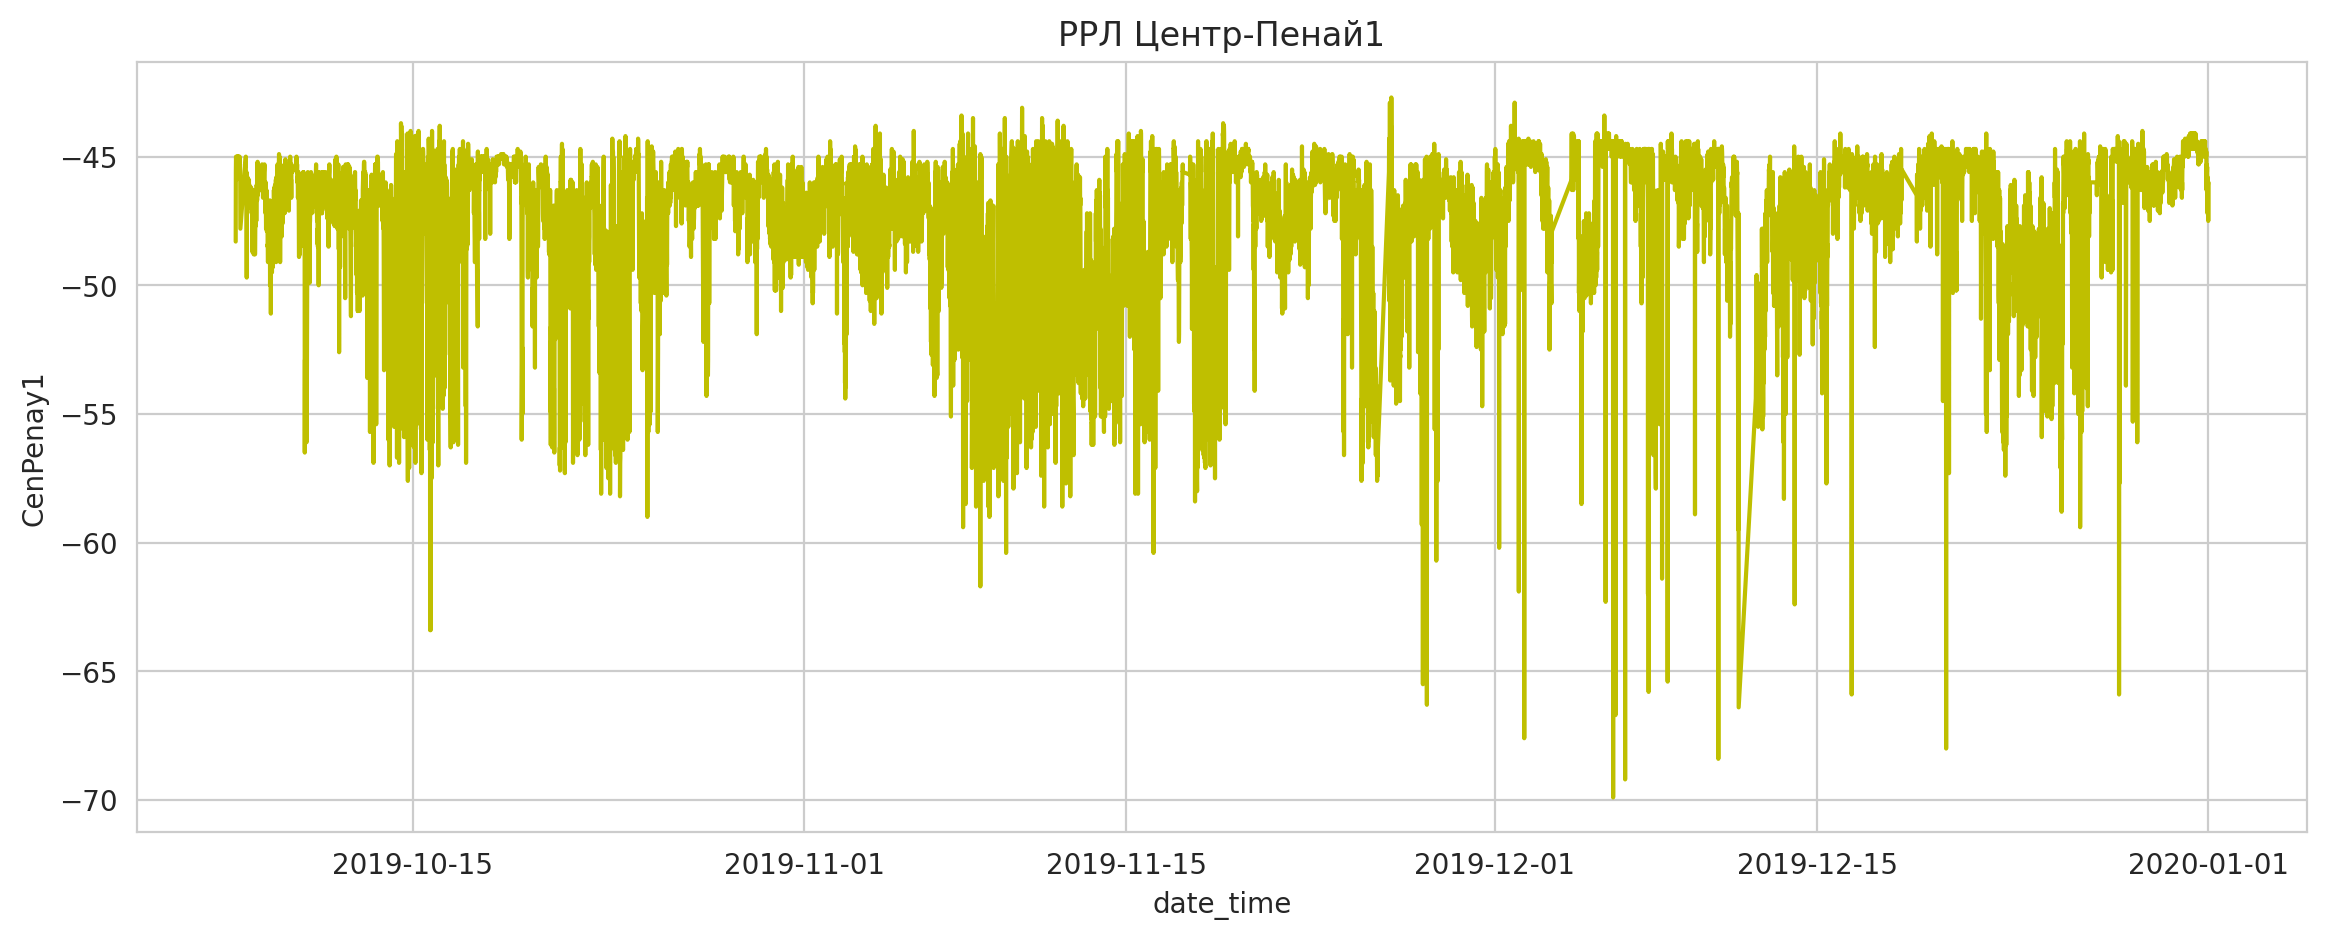

In [215]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay1", data = df2 , legend = 'auto', color = 'y')\
                                                                  .set(title='РРЛ Центр-Пенай1');
plt.show()

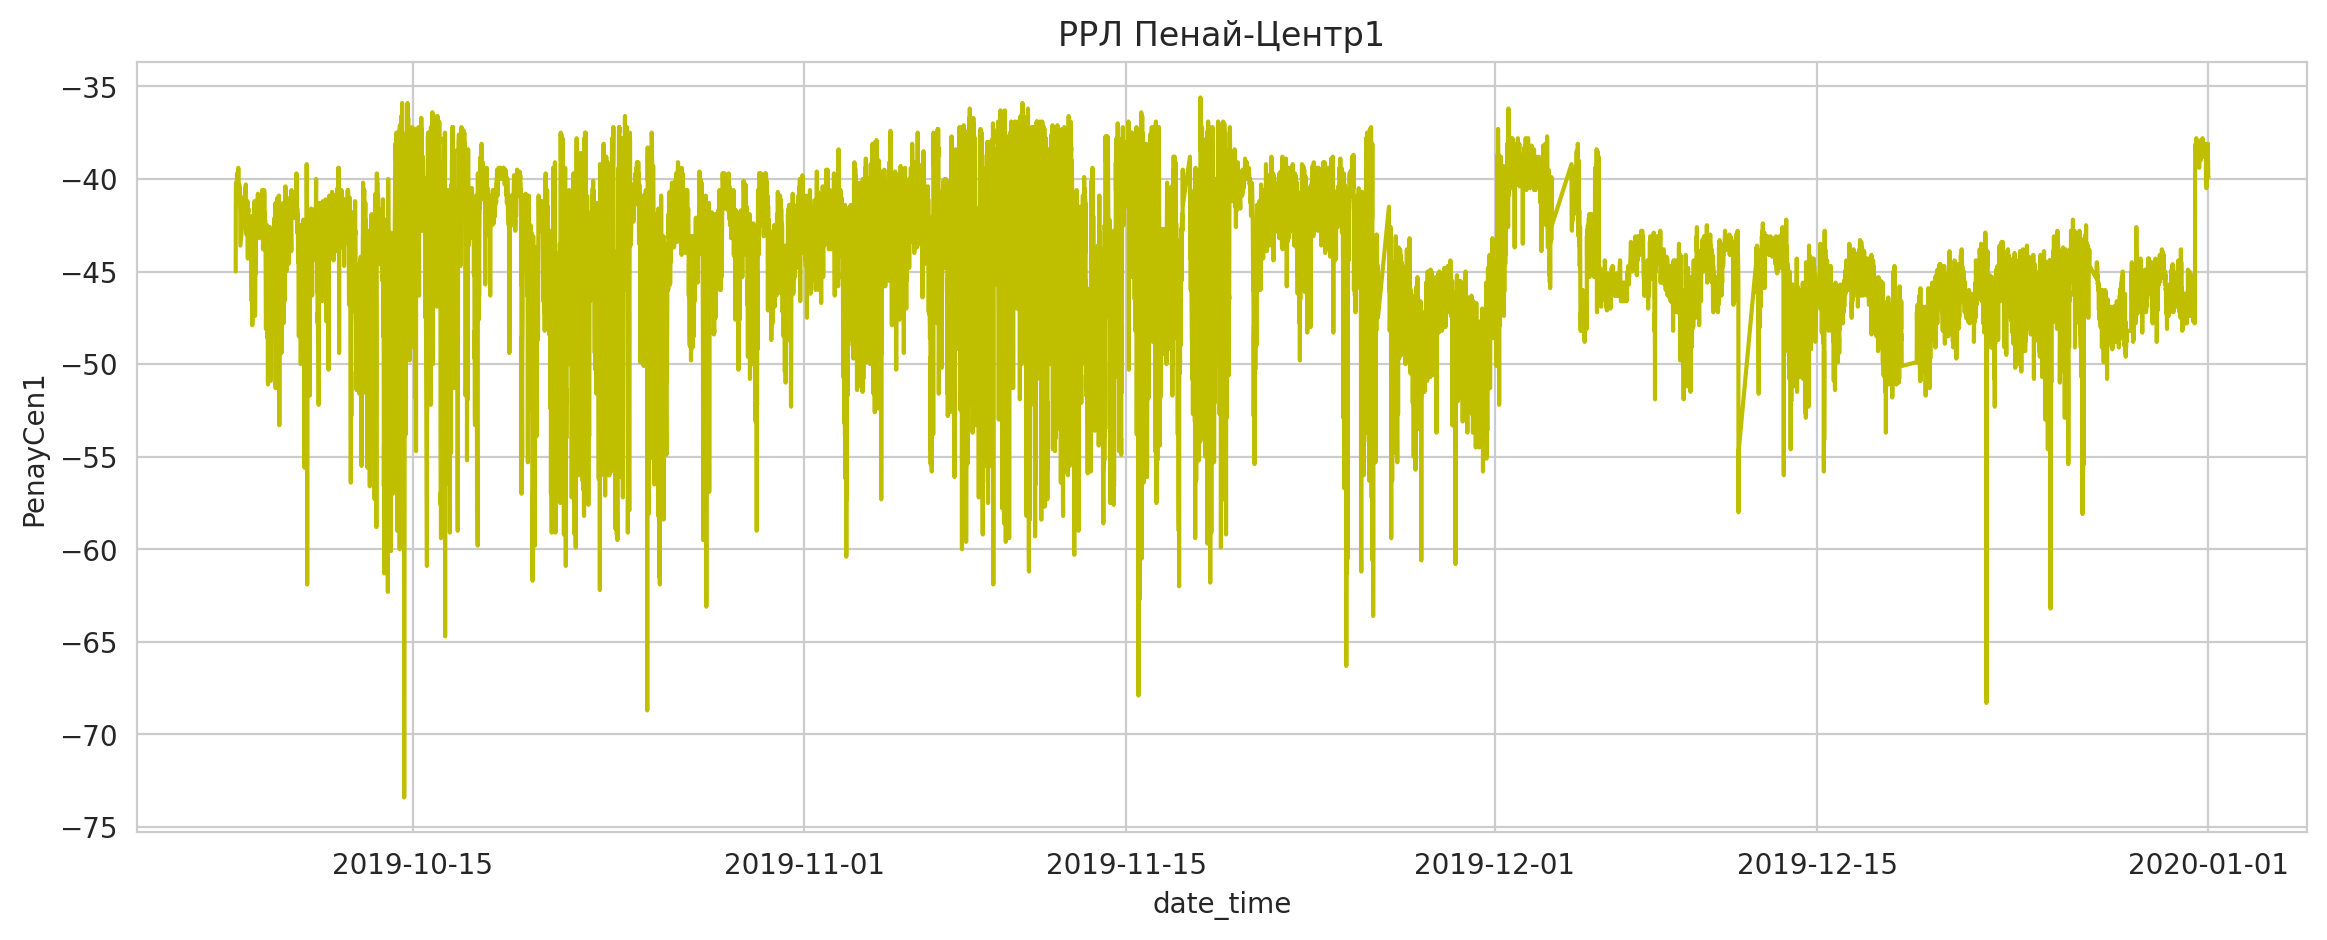

In [216]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen1", data = df2 , legend = 'auto', color = 'y')\
                                                             .set(title='РРЛ Пенай-Центр1');
plt.show()

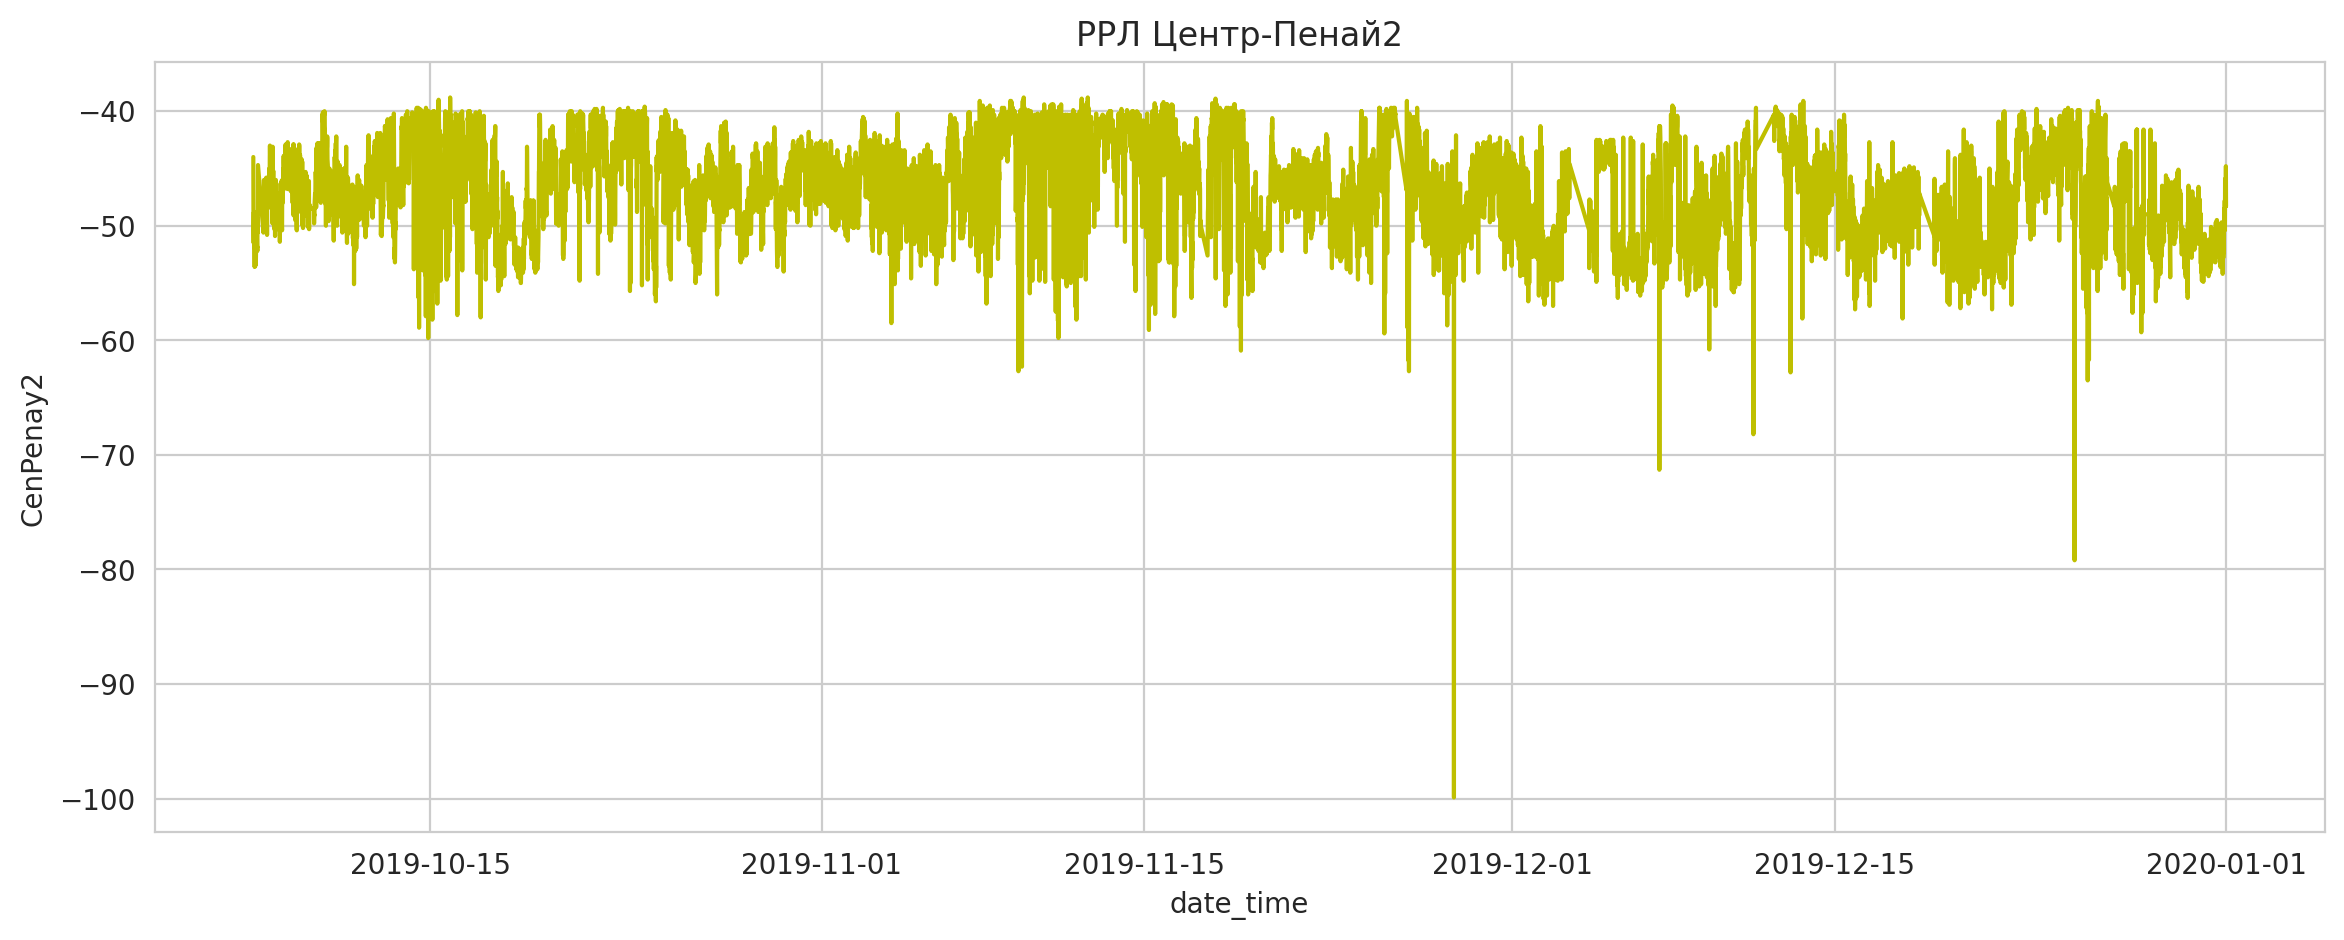

In [217]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay2", data = df2 , legend = 'auto', color = 'y')\
                                                                .set(title='РРЛ Центр-Пенай2');
plt.show()

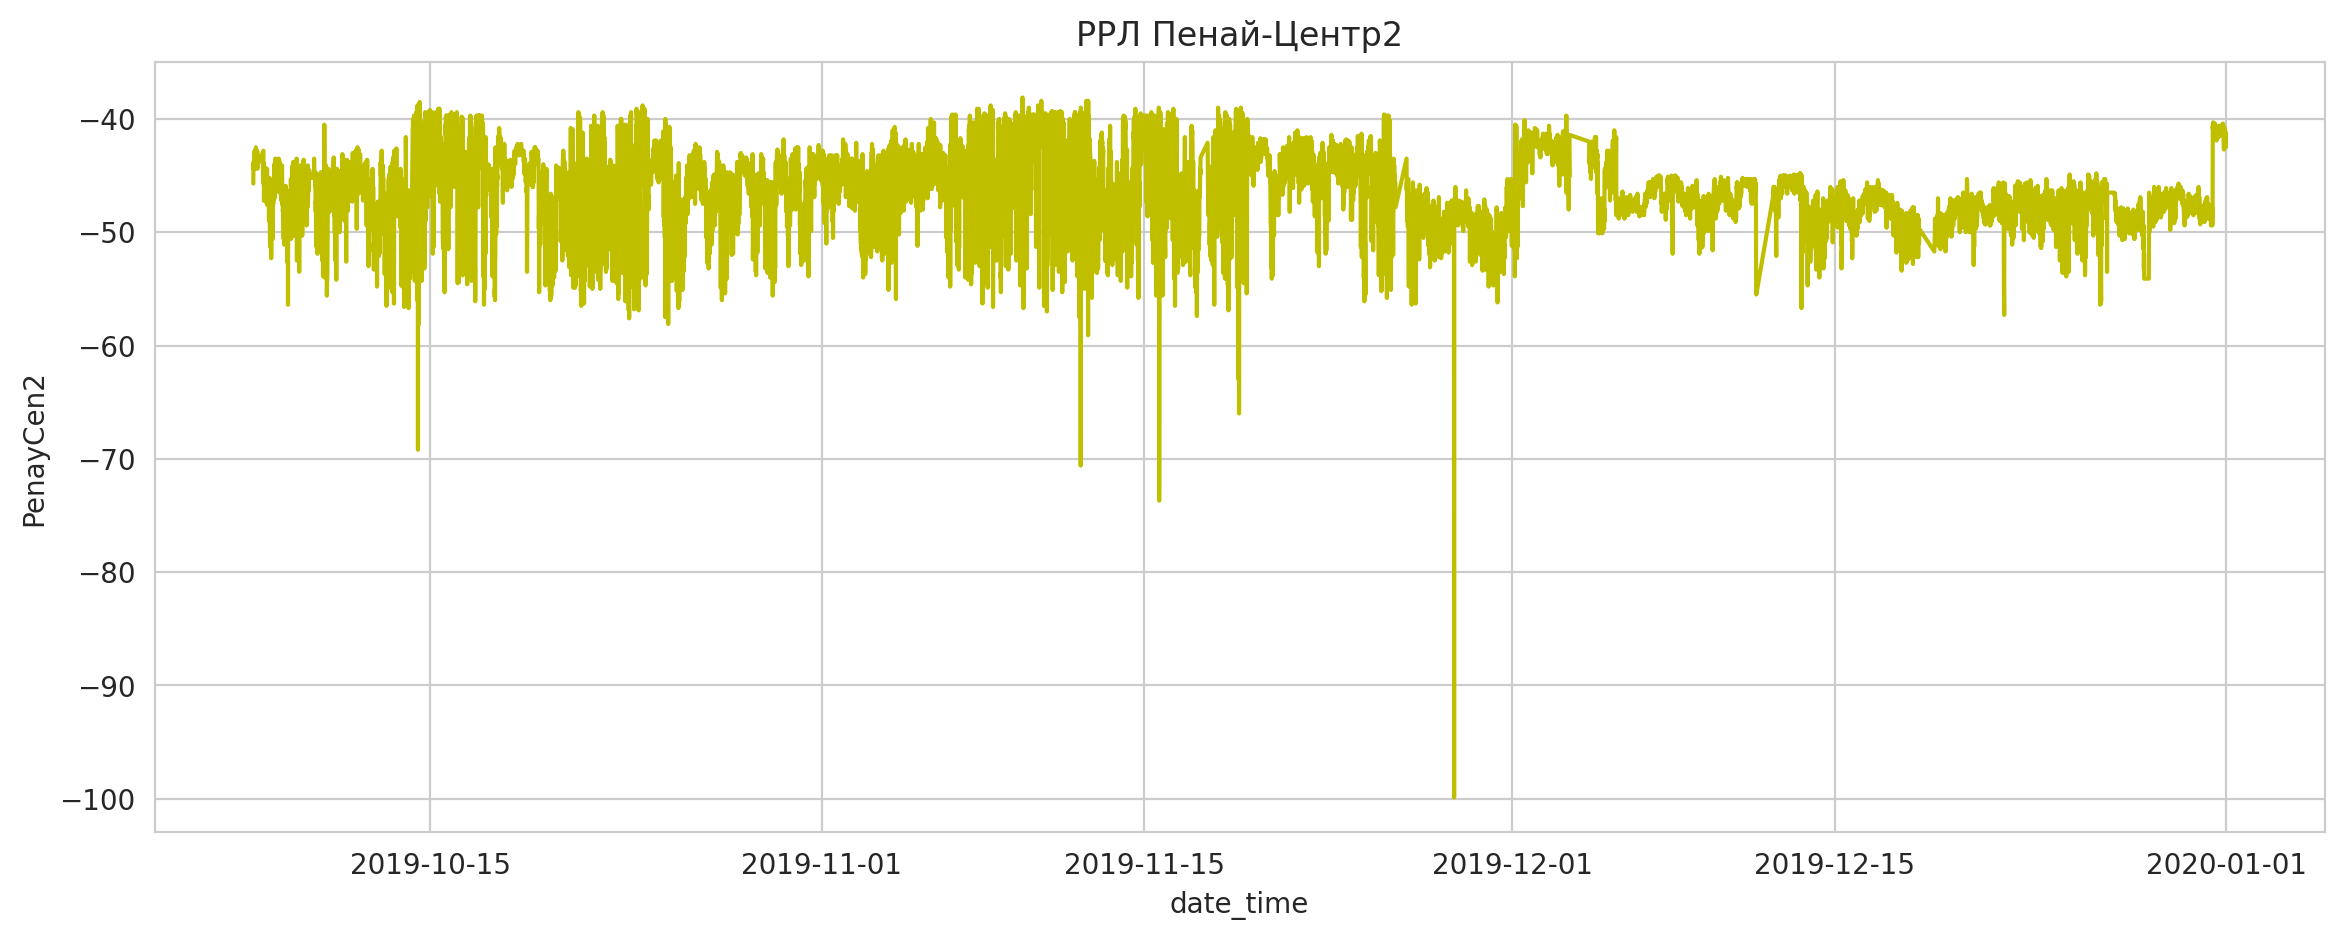

In [218]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen2", data = df2 , legend = 'auto', color = 'y')\
                                                             .set(title='РРЛ Пенай-Центр2');
plt.show()

## РРЛ Дооб 2019 год.

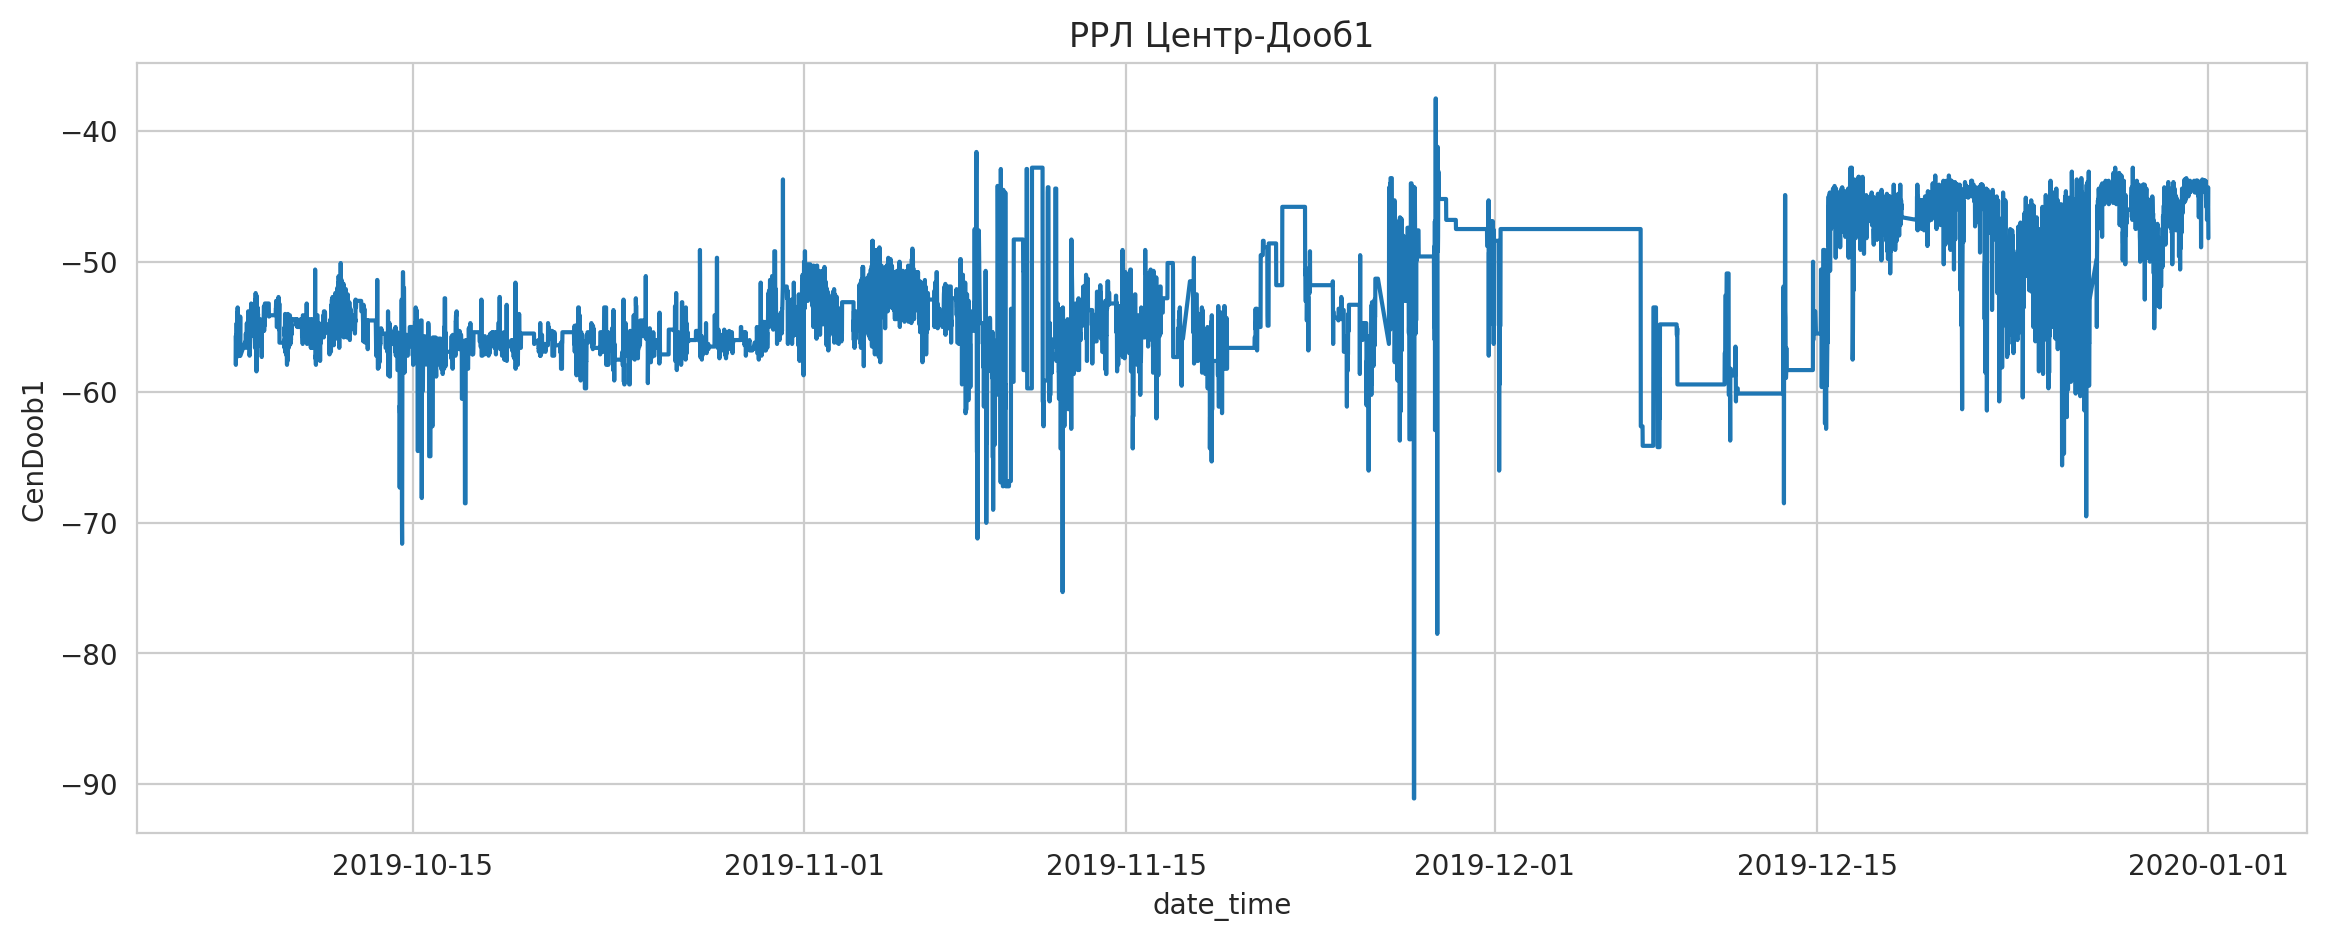

In [219]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob1", data = df2 , legend = 'auto')\
                                                   .set(title='РРЛ Центр-Дооб1');
plt.show()

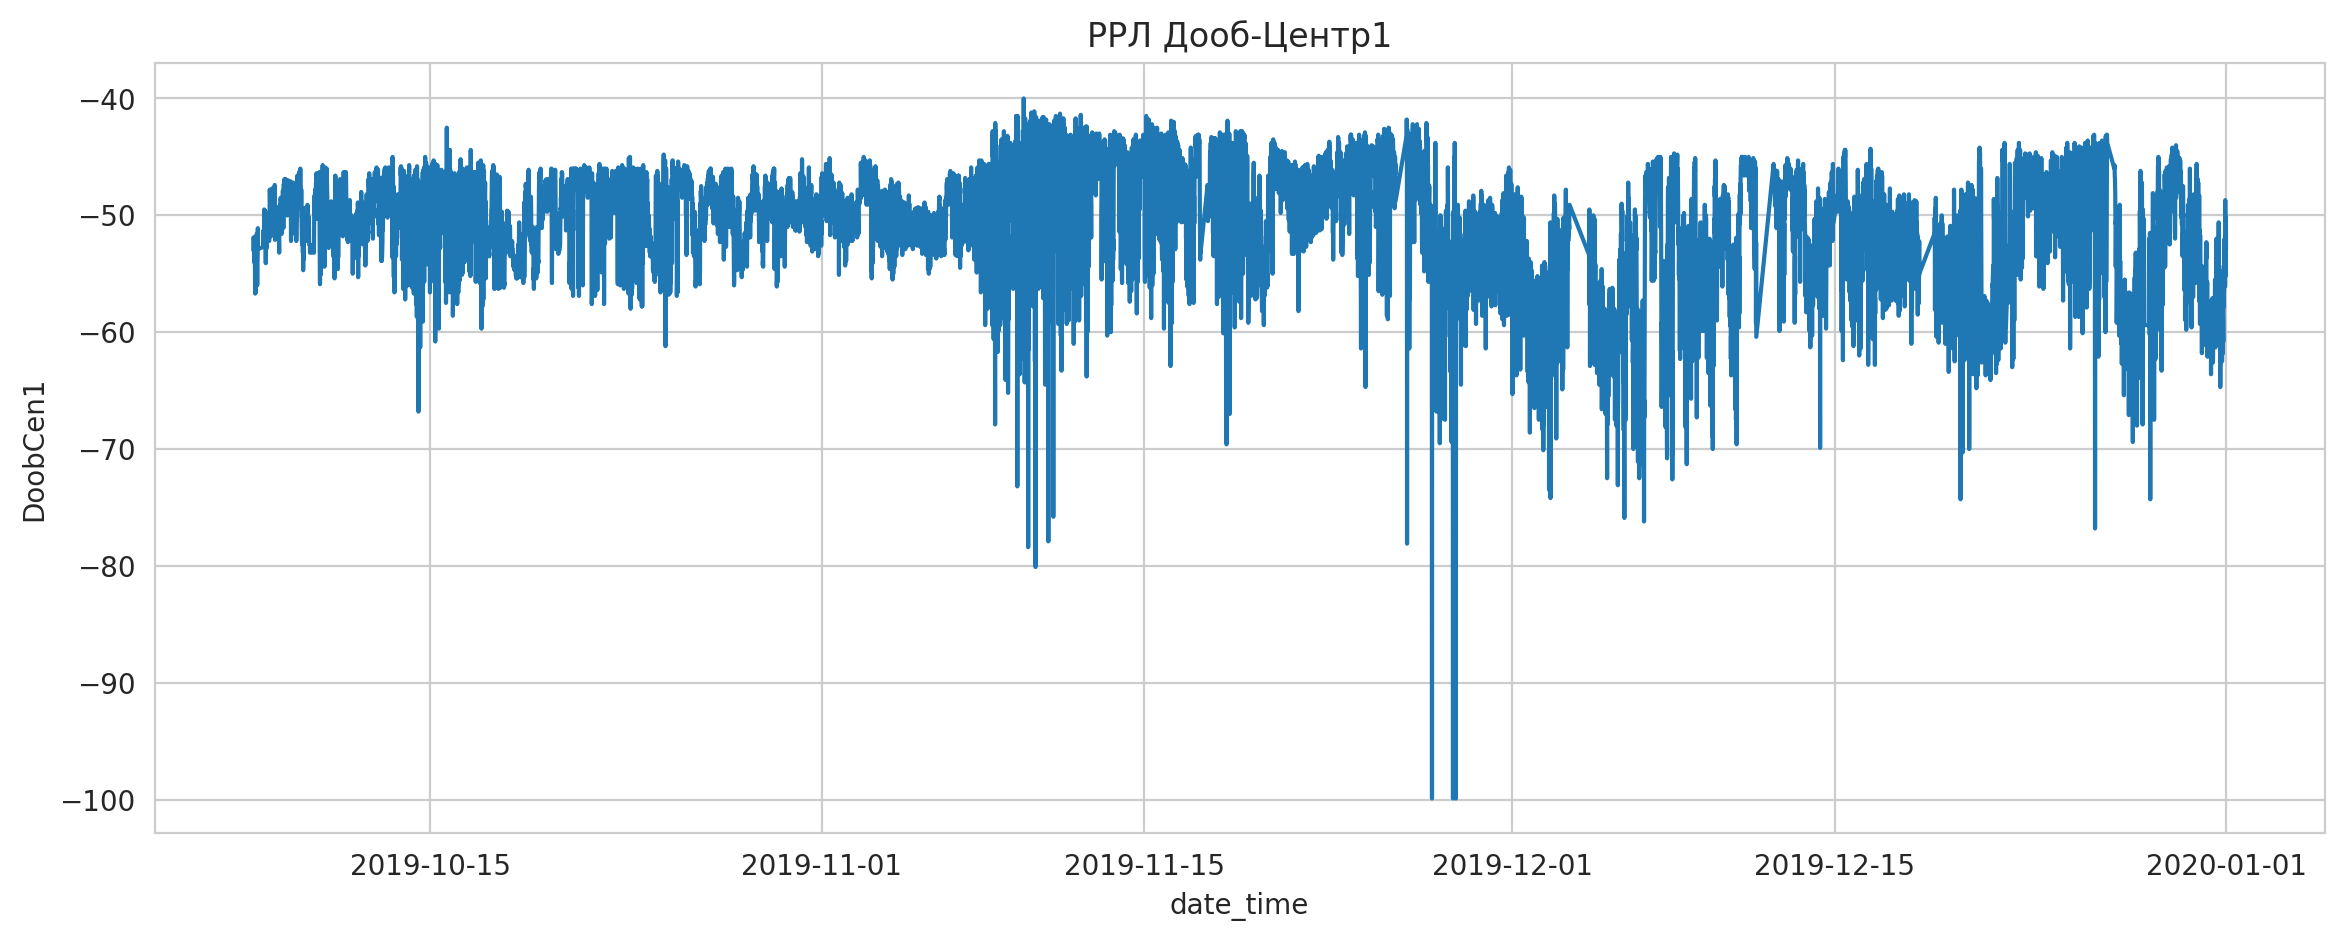

In [220]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen1", data = df2 , legend = 'auto')\
                                                   .set(title='РРЛ Дооб-Центр1');
plt.show()

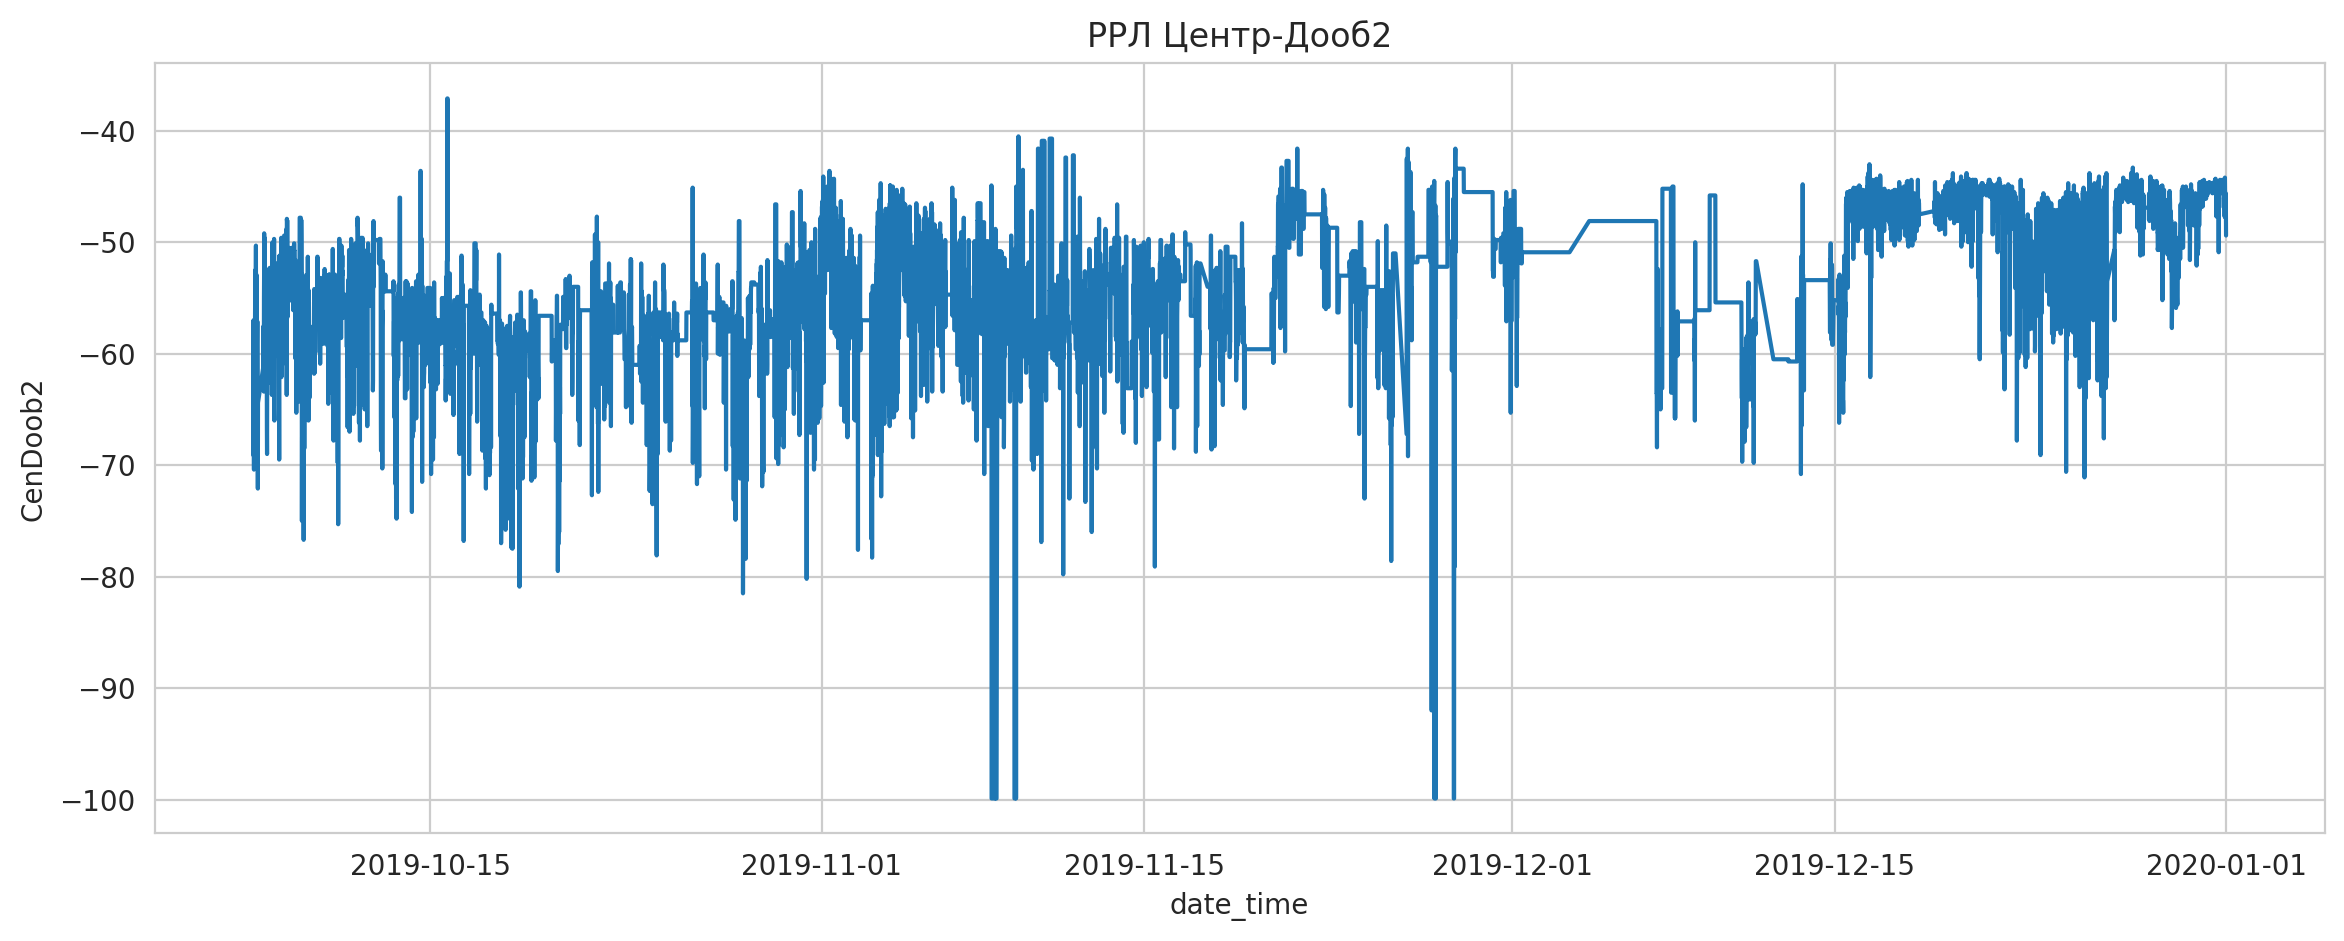

In [221]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob2", data = df2 , legend = 'auto')\
                                                              .set(title='РРЛ Центр-Дооб2');
plt.show()

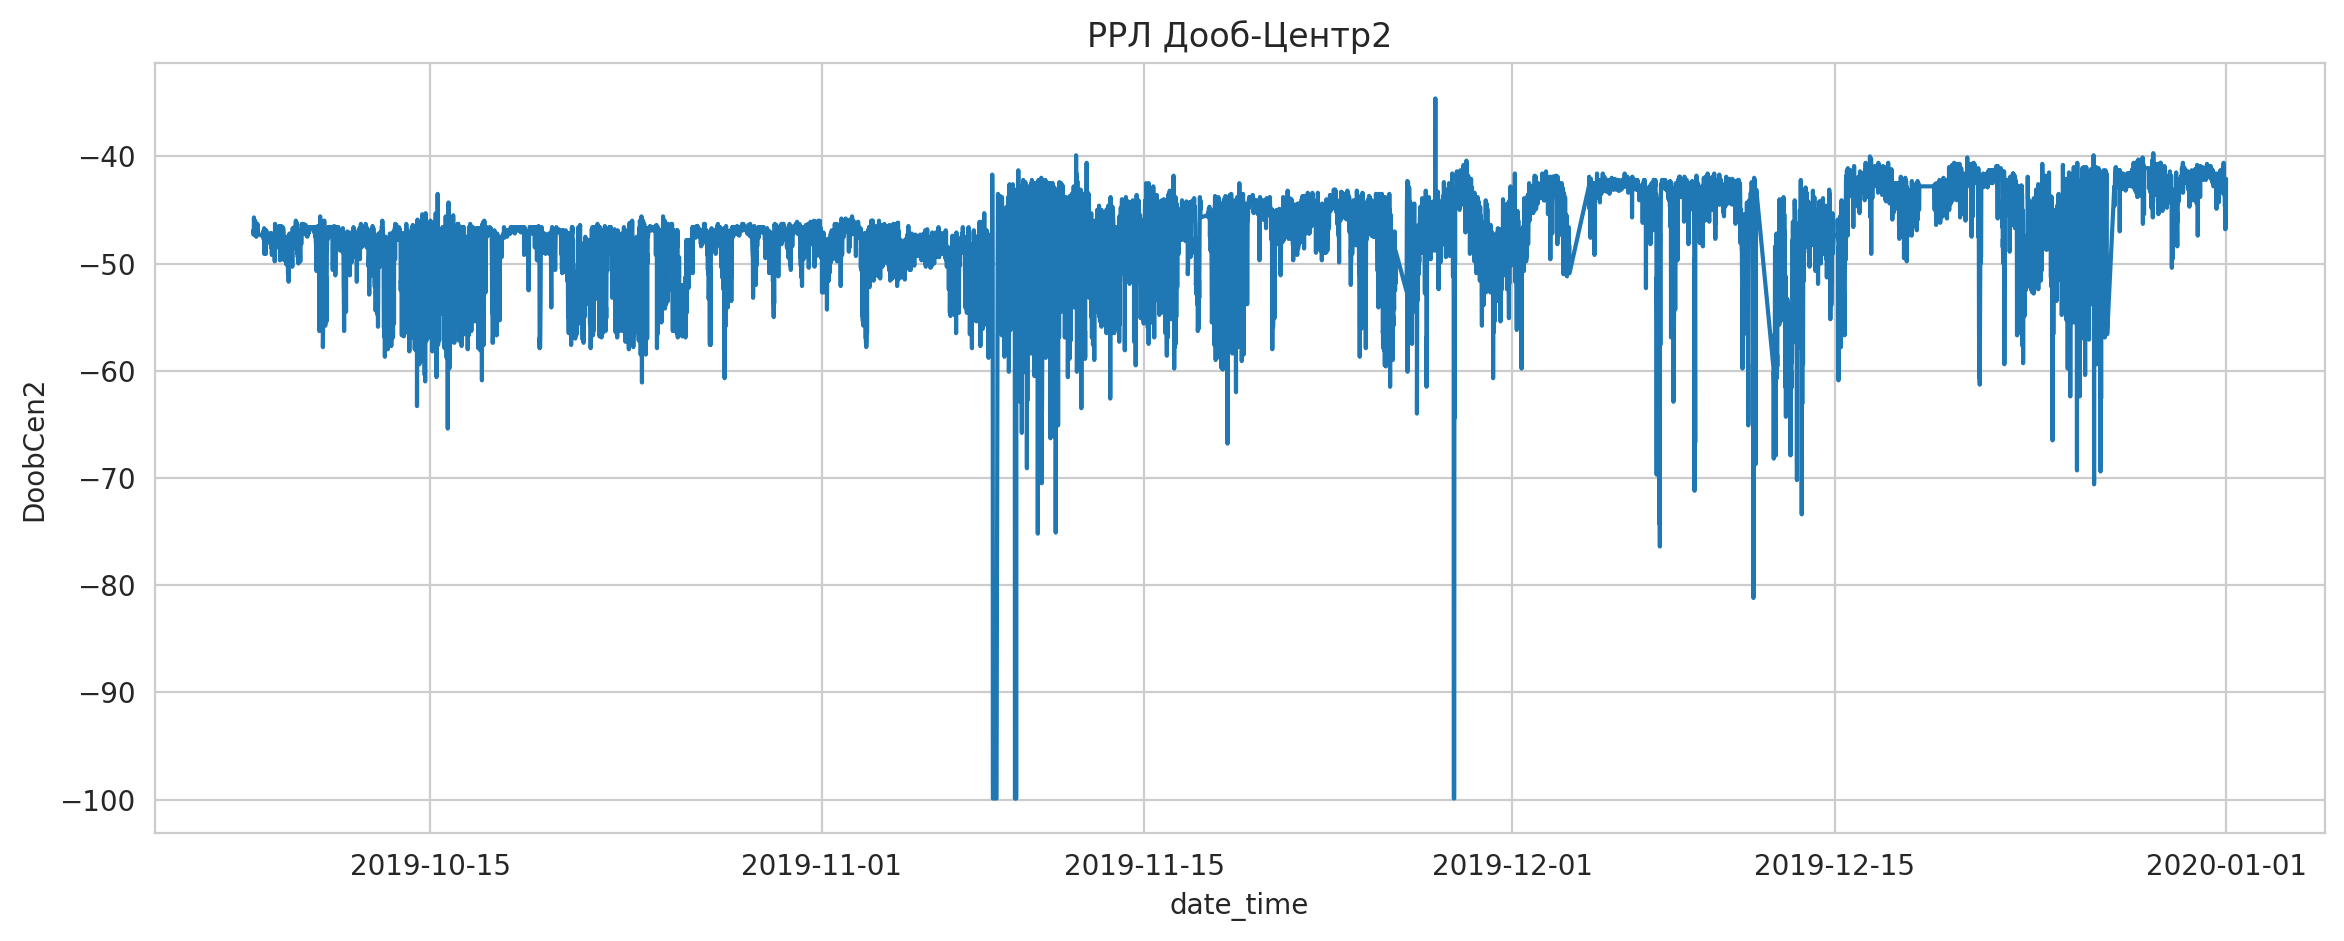

In [222]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen2", data = df2 , legend = 'auto')\
                                                              .set(title='РРЛ Дооб-Центр2');
plt.show()

### 2020 год.

In [223]:
df3 = df1[df1['year'] == 2020][['date_time', 'CenDoob1','CenDoob2',
                                                                 'DoobCen1', 'DoobCen2',
                                                                 'CenPenay1', 'CenPenay2',
                                                                 'PenayCen1', 'PenayCen2']]
df3

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  CenPenay1  \
13735 2020-01-01 00:05:00     -47.3     -48.1     -48.4     -43.1      -46.0   
13736 2020-01-01 00:15:00     -46.7     -46.7     -49.5     -45.3      -46.3   
13737 2020-01-01 00:25:00     -47.3     -47.5     -56.6     -43.8      -46.6   
13738 2020-01-01 00:35:00     -48.3     -50.4     -50.5     -43.6      -46.4   
13739 2020-01-01 00:45:00     -46.4     -46.7     -50.4     -46.4      -47.1   
...                   ...       ...       ...       ...       ...        ...   
62577 2020-12-31 23:17:00     -47.0     -42.5     -51.9     -46.9      -47.9   
62578 2020-12-31 23:27:00     -43.8     -44.5     -44.1     -56.3      -45.5   
62579 2020-12-31 23:37:00     -45.7     -51.1     -44.4     -49.0      -42.5   
62580 2020-12-31 23:47:00     -44.1     -44.5     -44.7     -55.8      -44.6   
62581 2020-12-31 23:57:00     -46.6     -42.2     -48.8     -47.5      -59.3   

       CenPenay2  PenayCen1  PenayCen2  
13735      -44.7      -38.8      -40.7  
13736      -45.5      -39.1      -42.0  
13737      -44.7      -39.3      -42.2  
13738      -45.9      -37.9      -41.3  
13739      -45.6      -39.1      -41.6  
...          ...        ...        ...  
62577      -38.9      -48.5      -48.8  
62578      -43.2      -51.1      -53.4  
62579      -44.7      -51.7      -53.4  
62580      -40.6      -58.3      -54.1  
62581      -38.4      -43.4      -44.7  

[48847 rows x 9 columns]

In [224]:
df3.to_csv('MiniLink_out_2020.csv') # за 2020 год

In [225]:
pd.set_option("display.precision", 1)
np.set_printoptions(precision=1)
df3.agg([np.mean, np.median, np.min, np.max])

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  \
mean   2020-07-08 15:42:36.815362304     -48.7     -47.6     -51.2     -46.1   
median 2020-07-12 00:40:00.000000000     -47.9     -46.3     -50.9     -45.3   
amin   2020-01-01 00:05:00.000000000     -76.8     -99.9     -99.9     -79.0   
amax   2020-12-31 23:57:00.000000000     -37.8     -38.5     -38.8     -36.0   

        CenPenay1  CenPenay2  PenayCen1  PenayCen2  
mean        -47.2      -46.3      -43.9      -45.7  
median      -46.0      -45.6      -43.2      -45.2  
amin        -92.0      -90.8      -72.2      -65.3  
amax        -40.3      -35.9      -35.9      -37.8

## РРЛ Пенай 2020 год.

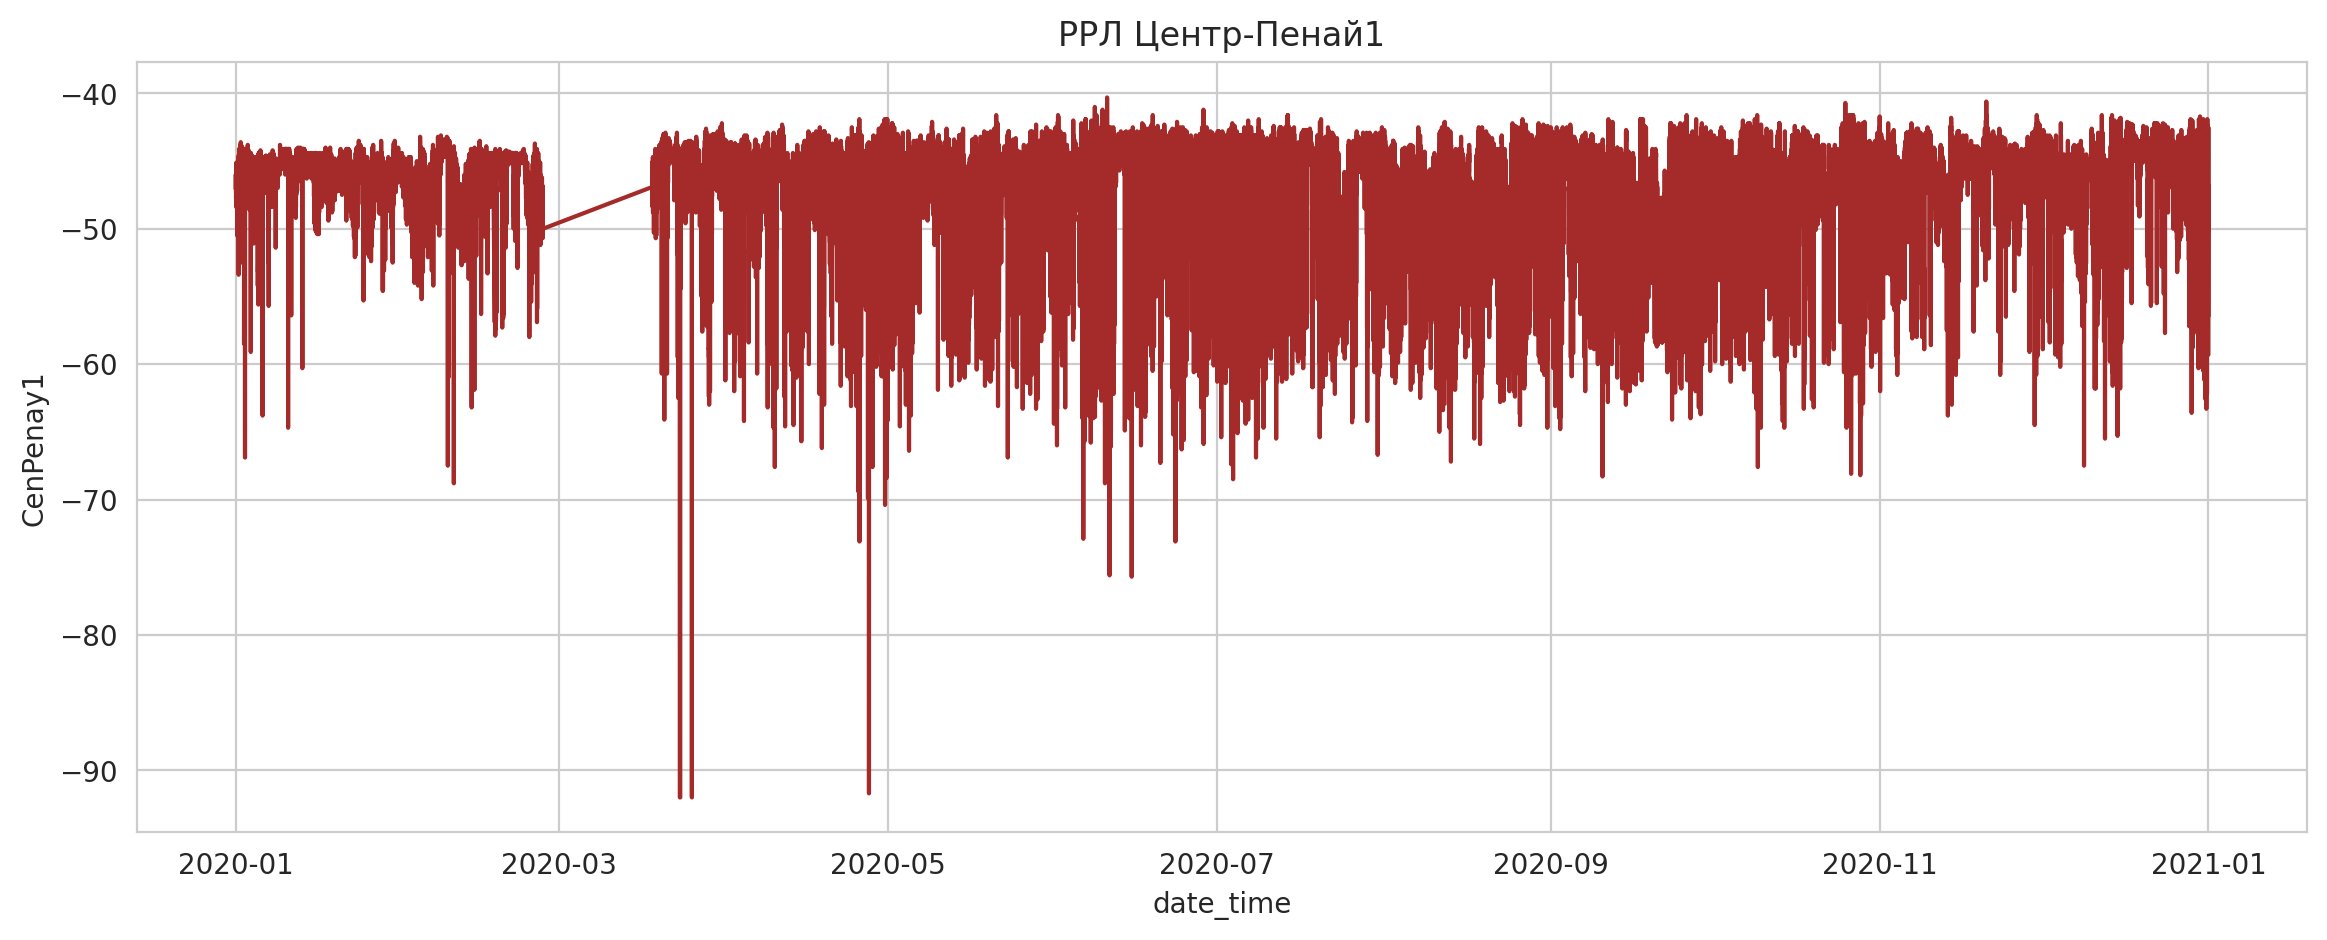

In [226]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay1", data = df3 , legend = 'auto', color = 'brown')\
                                                                  .set(title='РРЛ Центр-Пенай1');
plt.show()

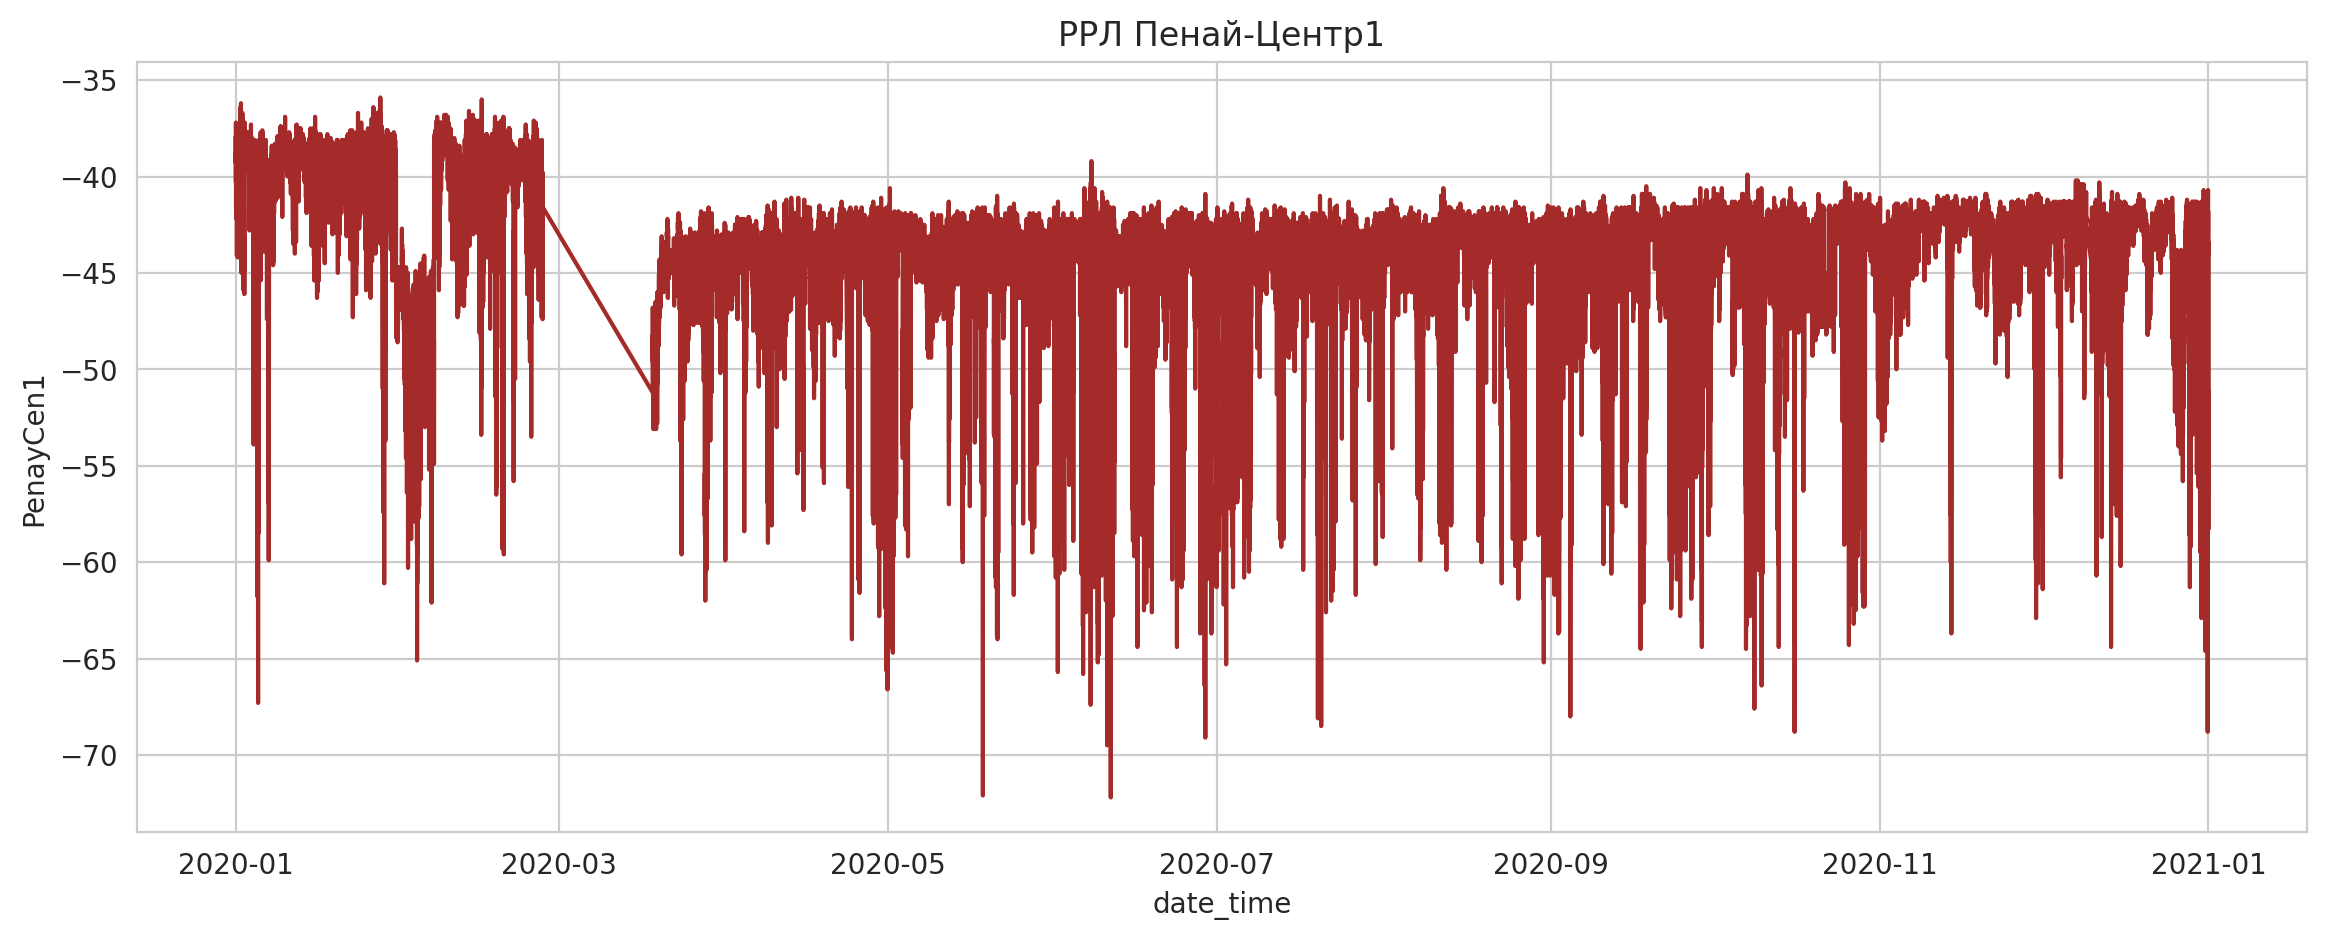

In [227]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen1", data = df3 , legend = 'auto', color = 'brown')\
                                                             .set(title='РРЛ Пенай-Центр1');
plt.show()

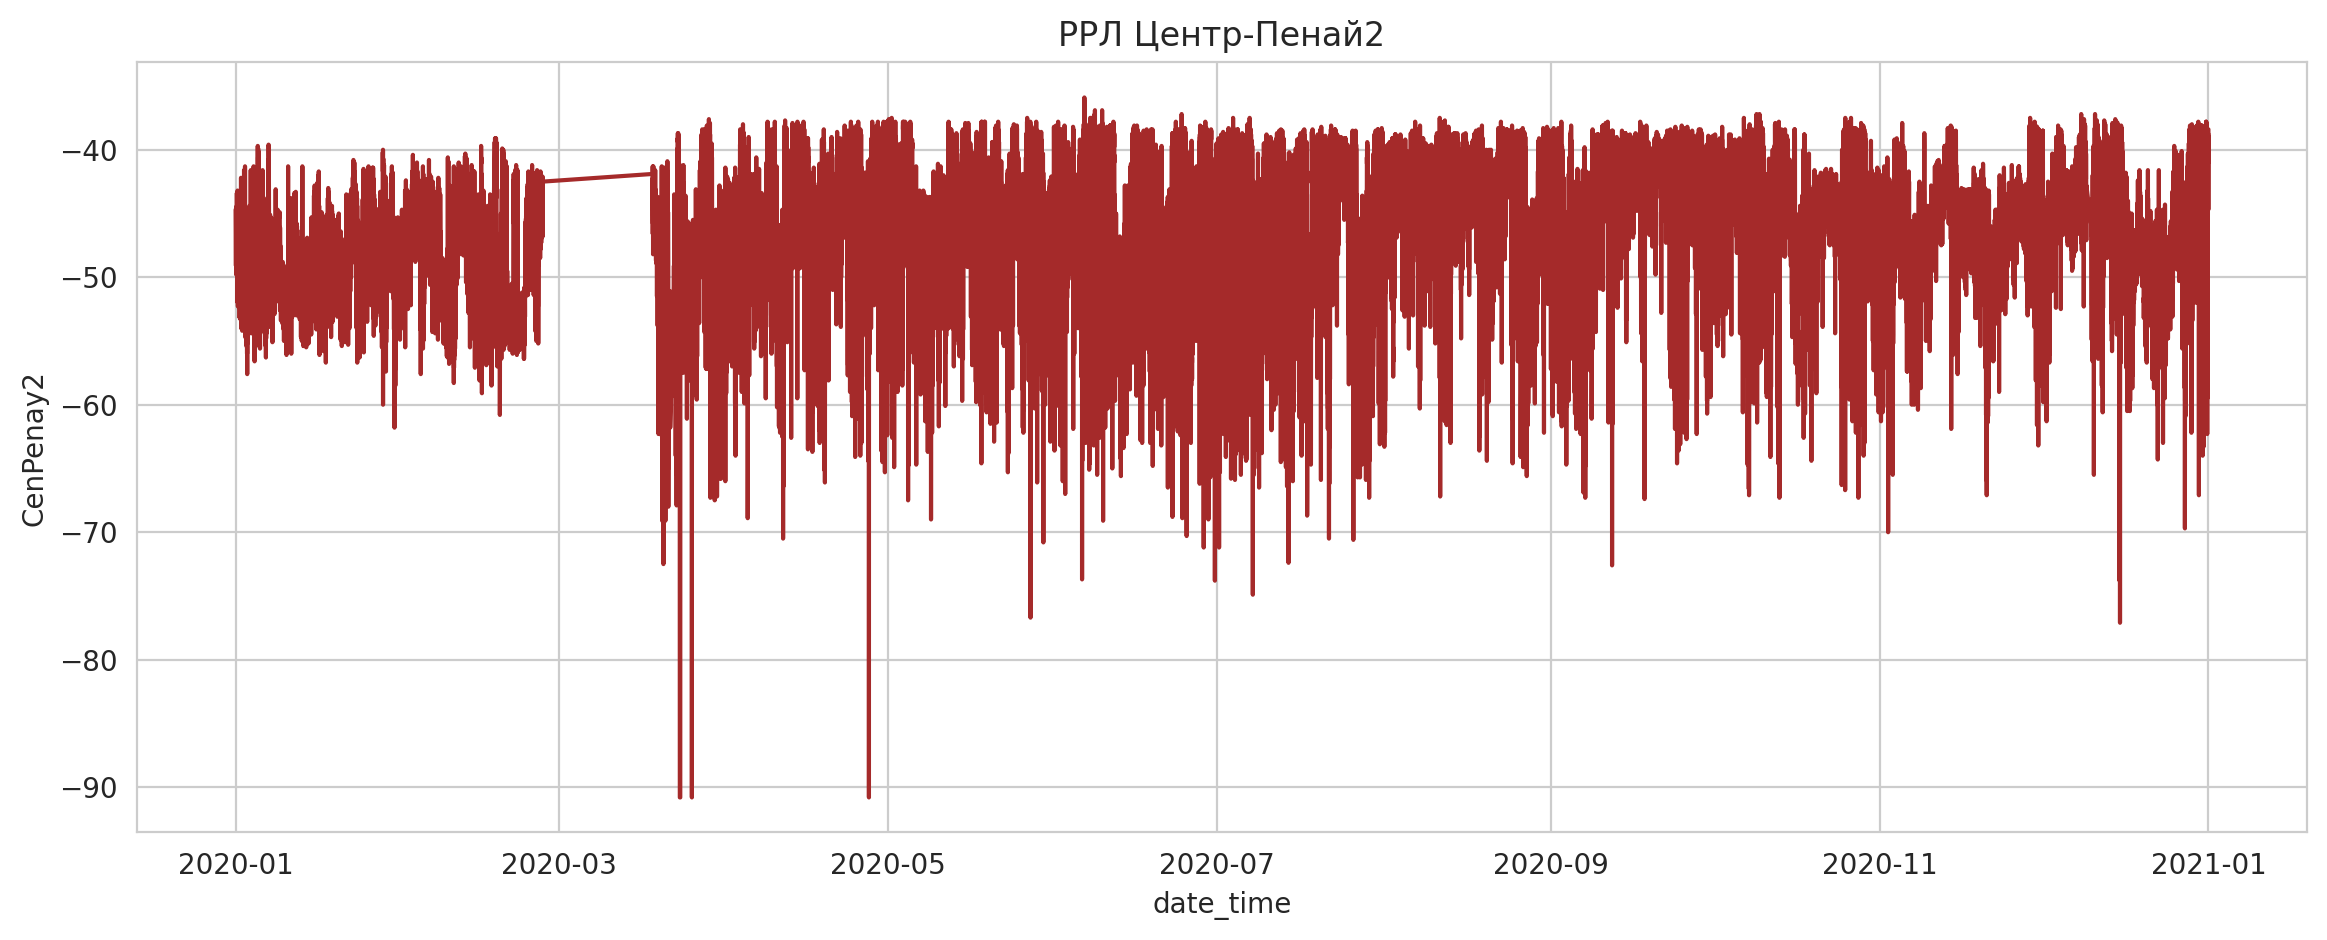

In [228]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay2", data = df3 , legend = 'auto', color = 'brown')\
                                                                .set(title='РРЛ Центр-Пенай2');
plt.show()

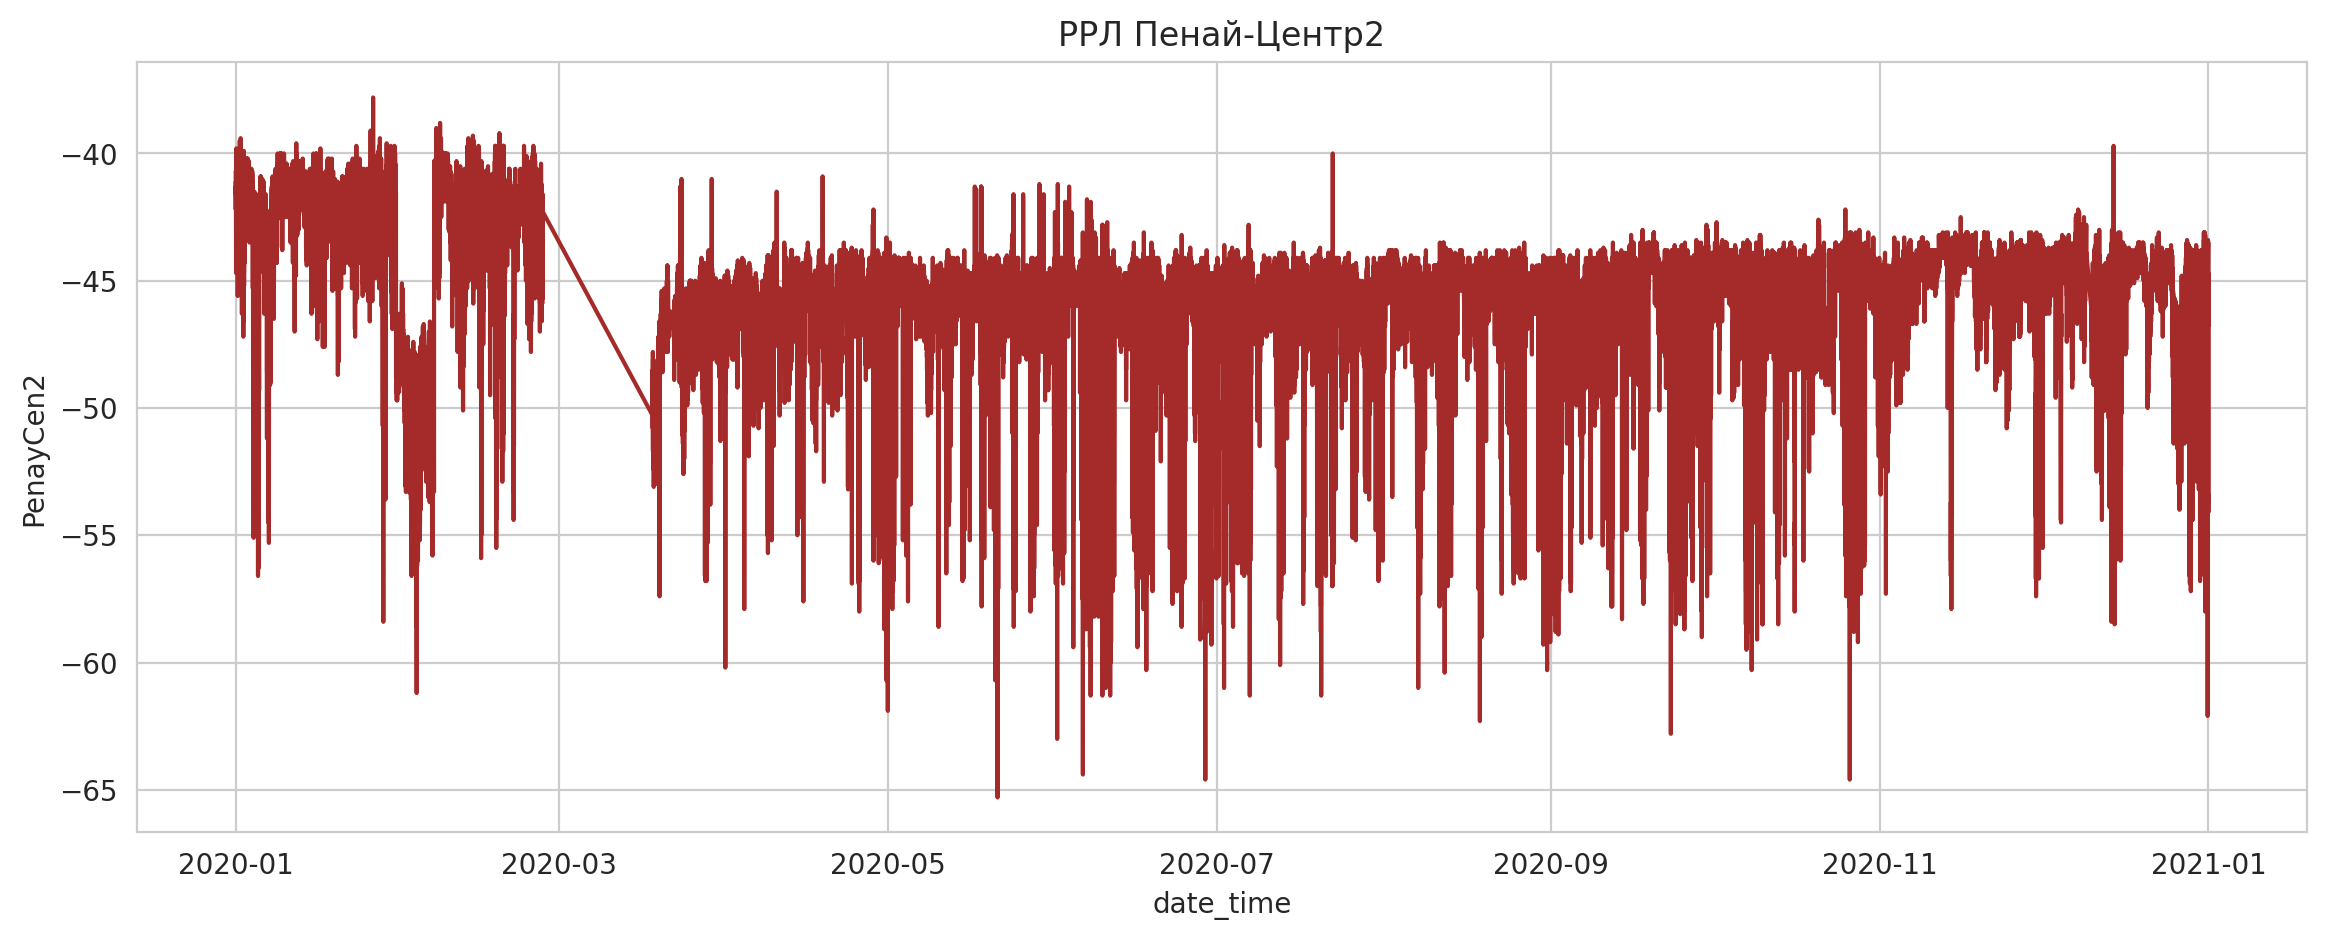

In [229]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen2", data = df3 , legend = 'auto', color = 'brown')\
                                                             .set(title='РРЛ Пенай-Центр2');
plt.show()

## РРЛ Дооб 2020 год.

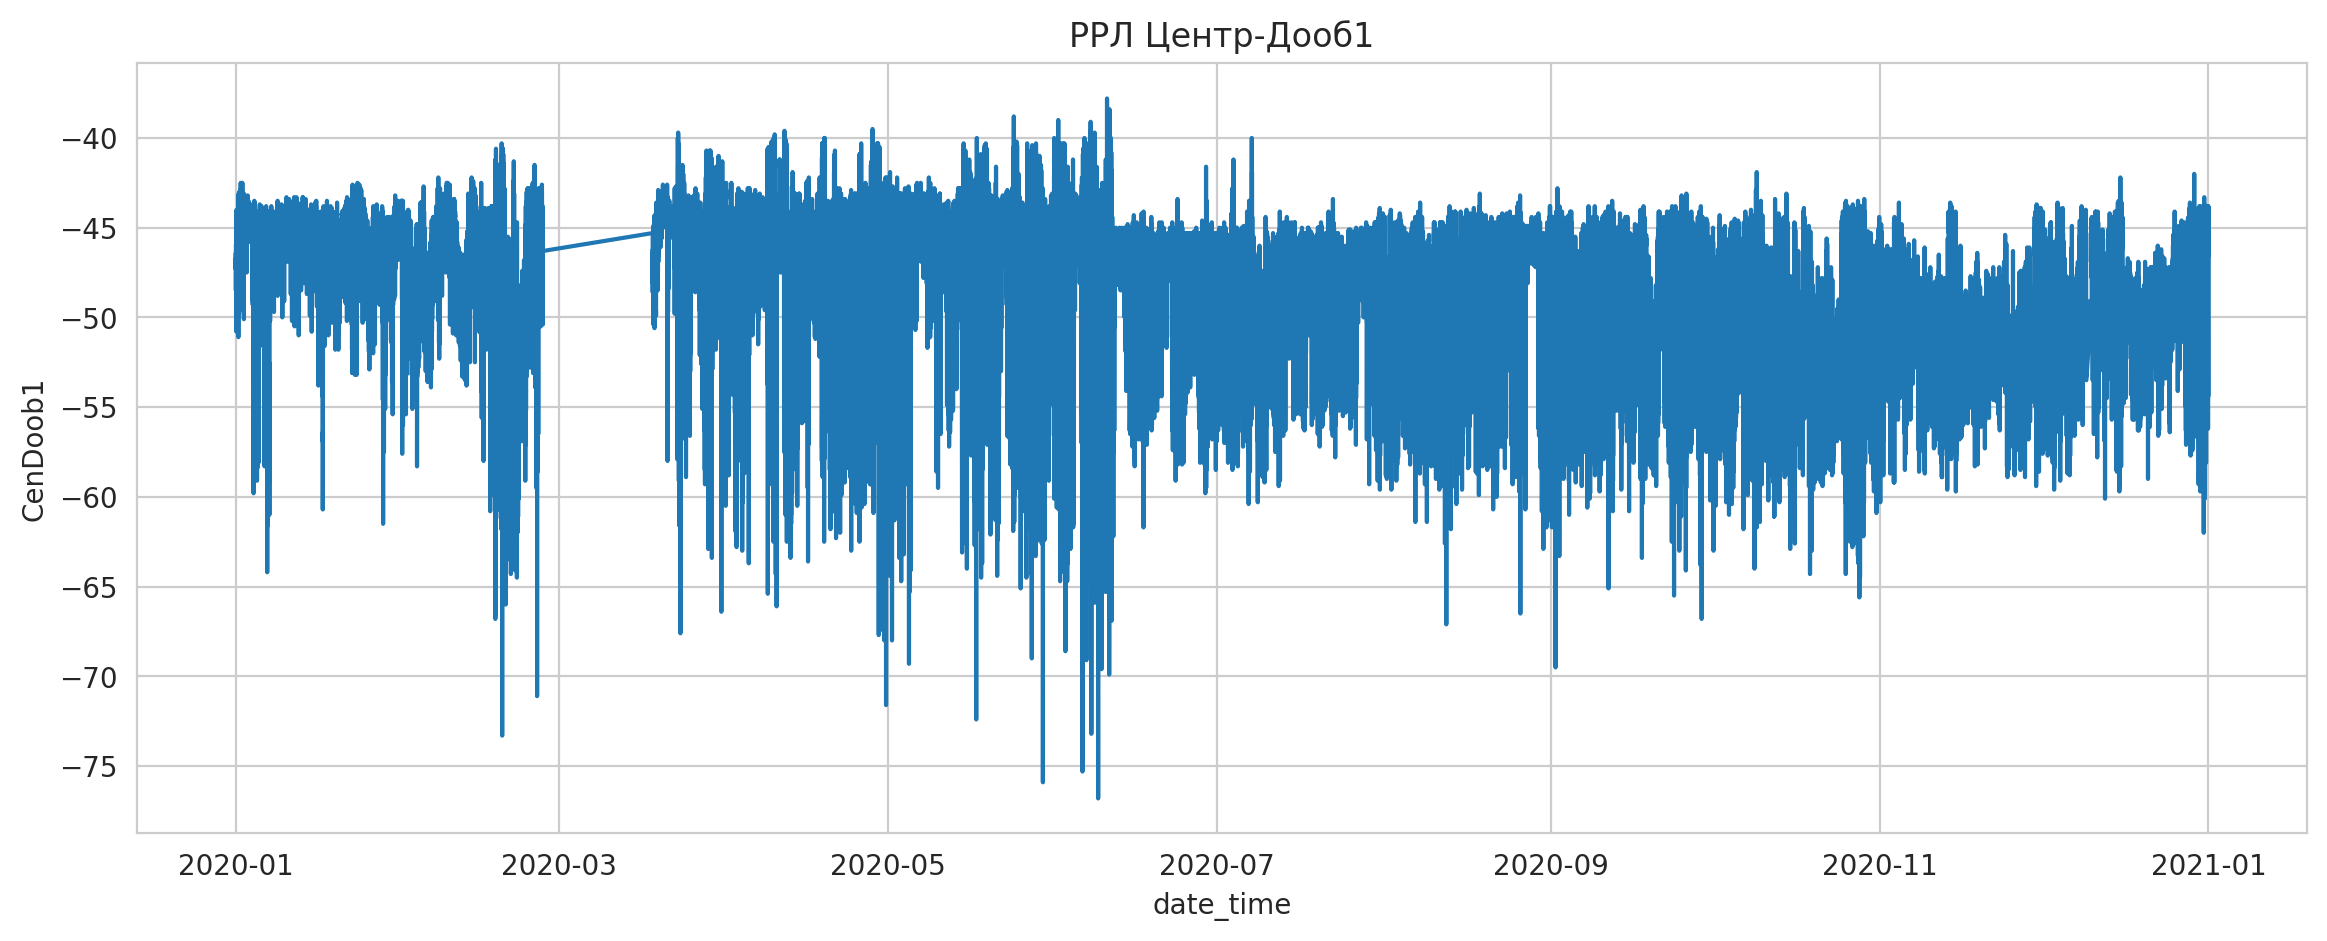

In [230]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob1", data = df3 , legend = 'auto')\
                                                   .set(title='РРЛ Центр-Дооб1');
plt.show()

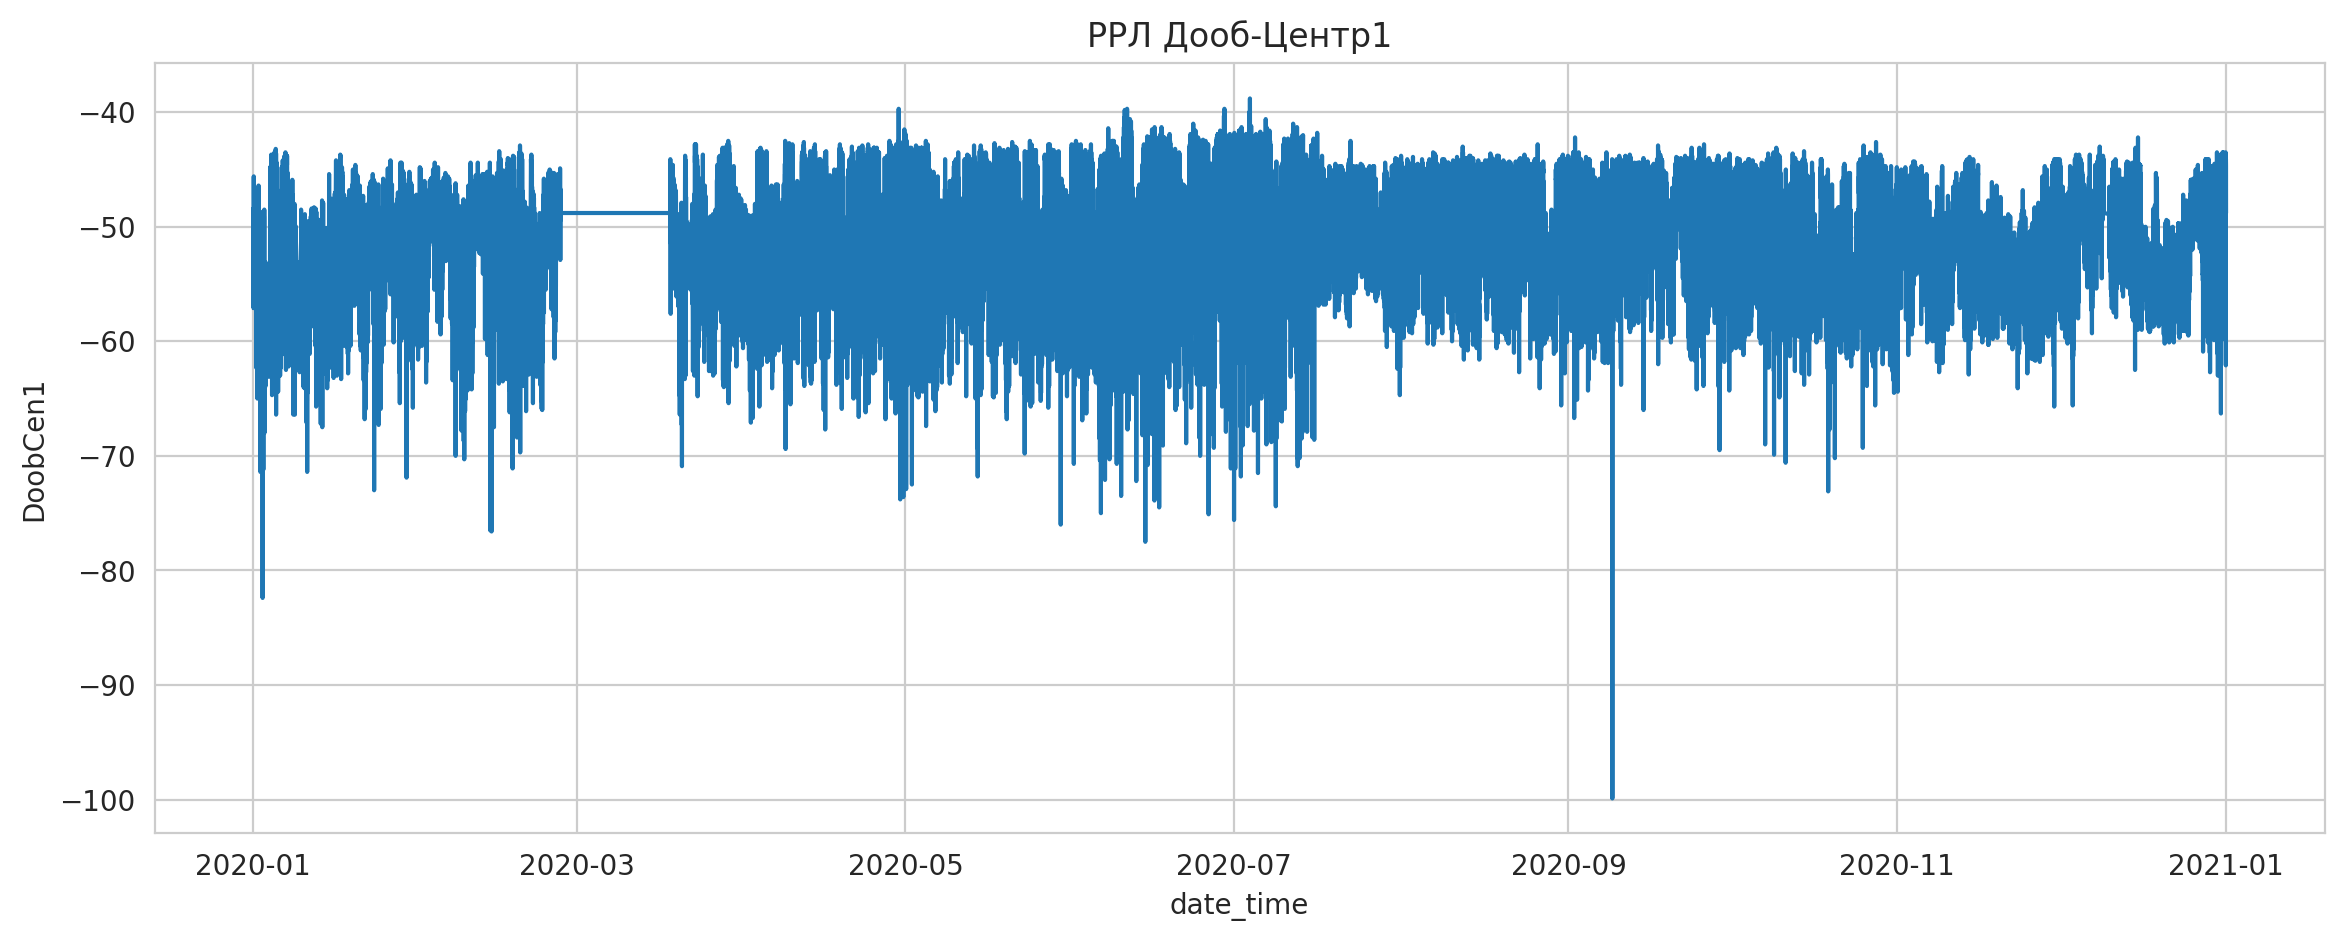

In [231]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen1", data = df3 , legend = 'auto')\
                                                   .set(title='РРЛ Дооб-Центр1');
plt.show()

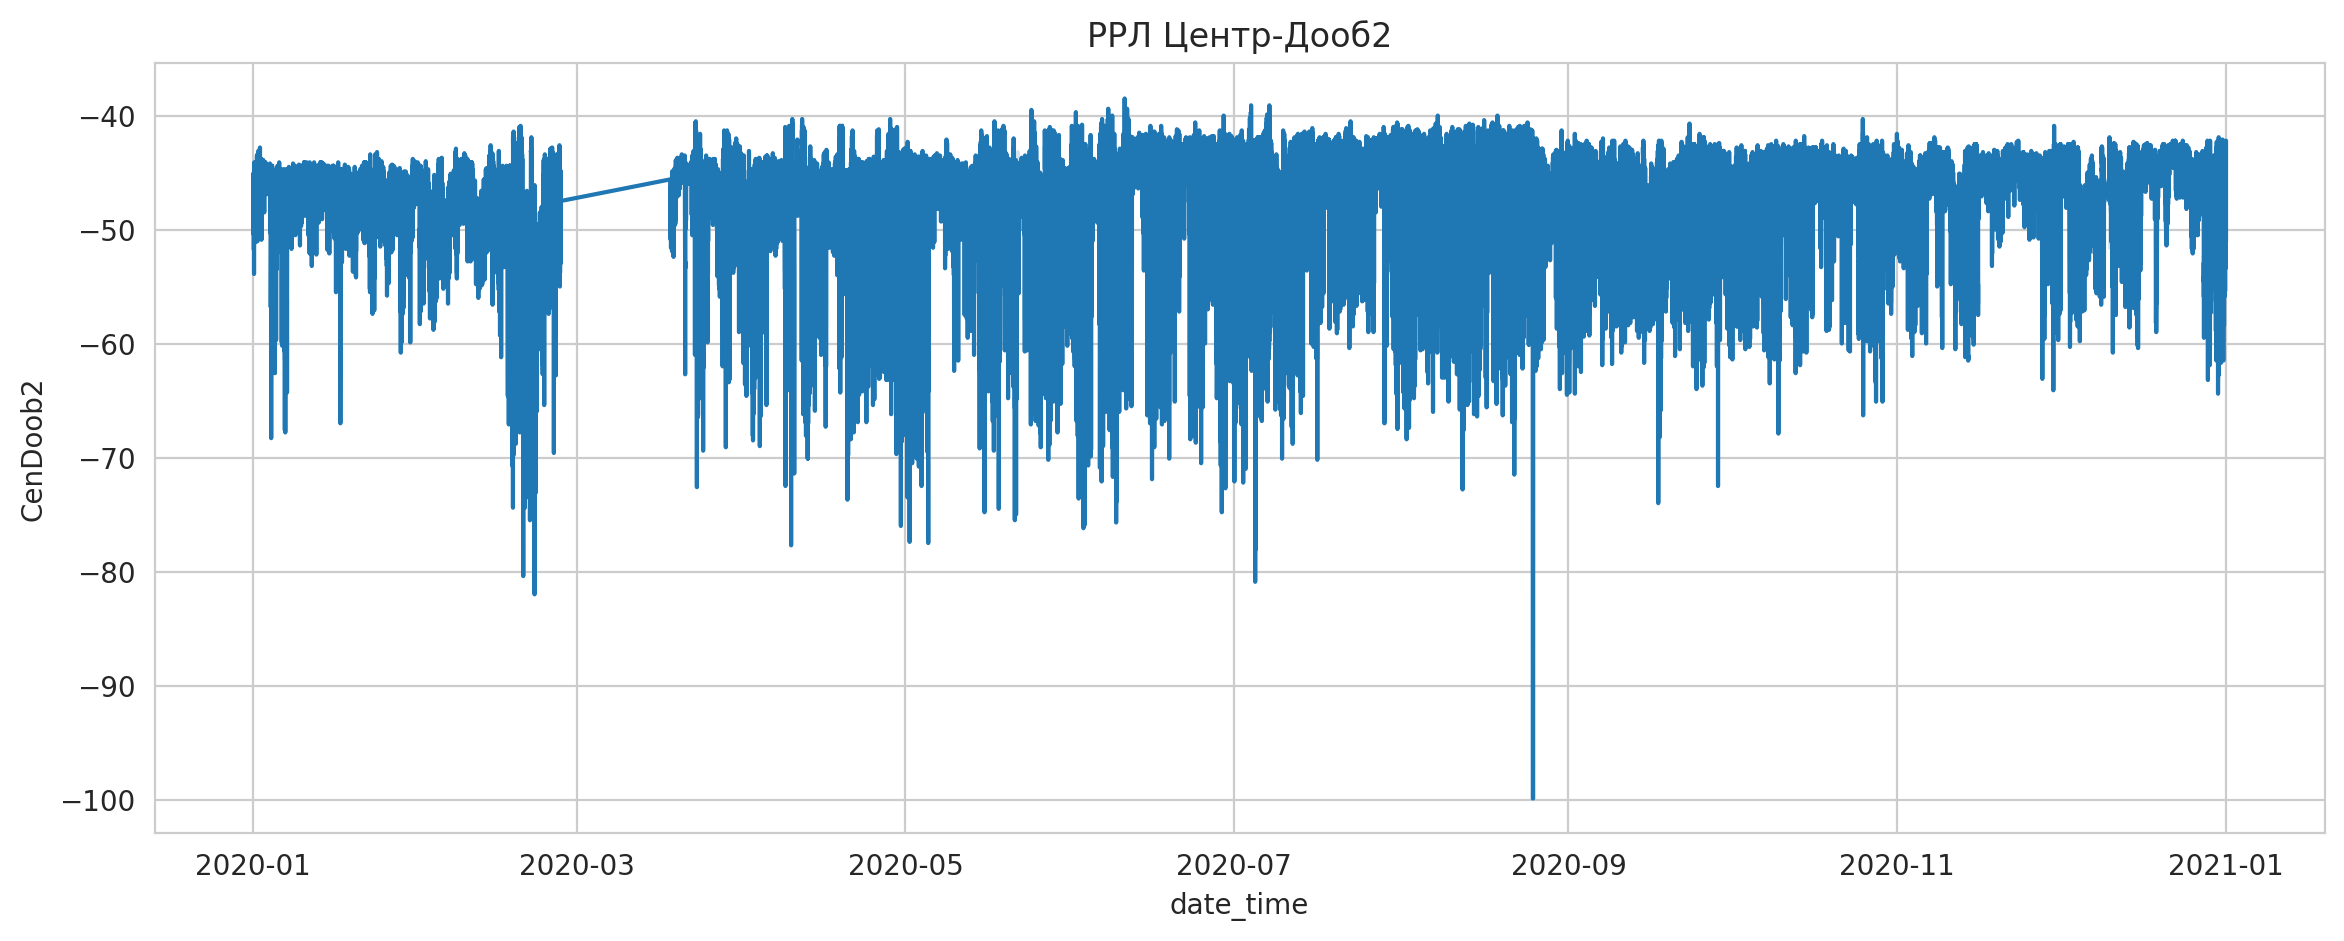

In [232]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob2", data = df3 , legend = 'auto')\
                                                              .set(title='РРЛ Центр-Дооб2');
plt.show()

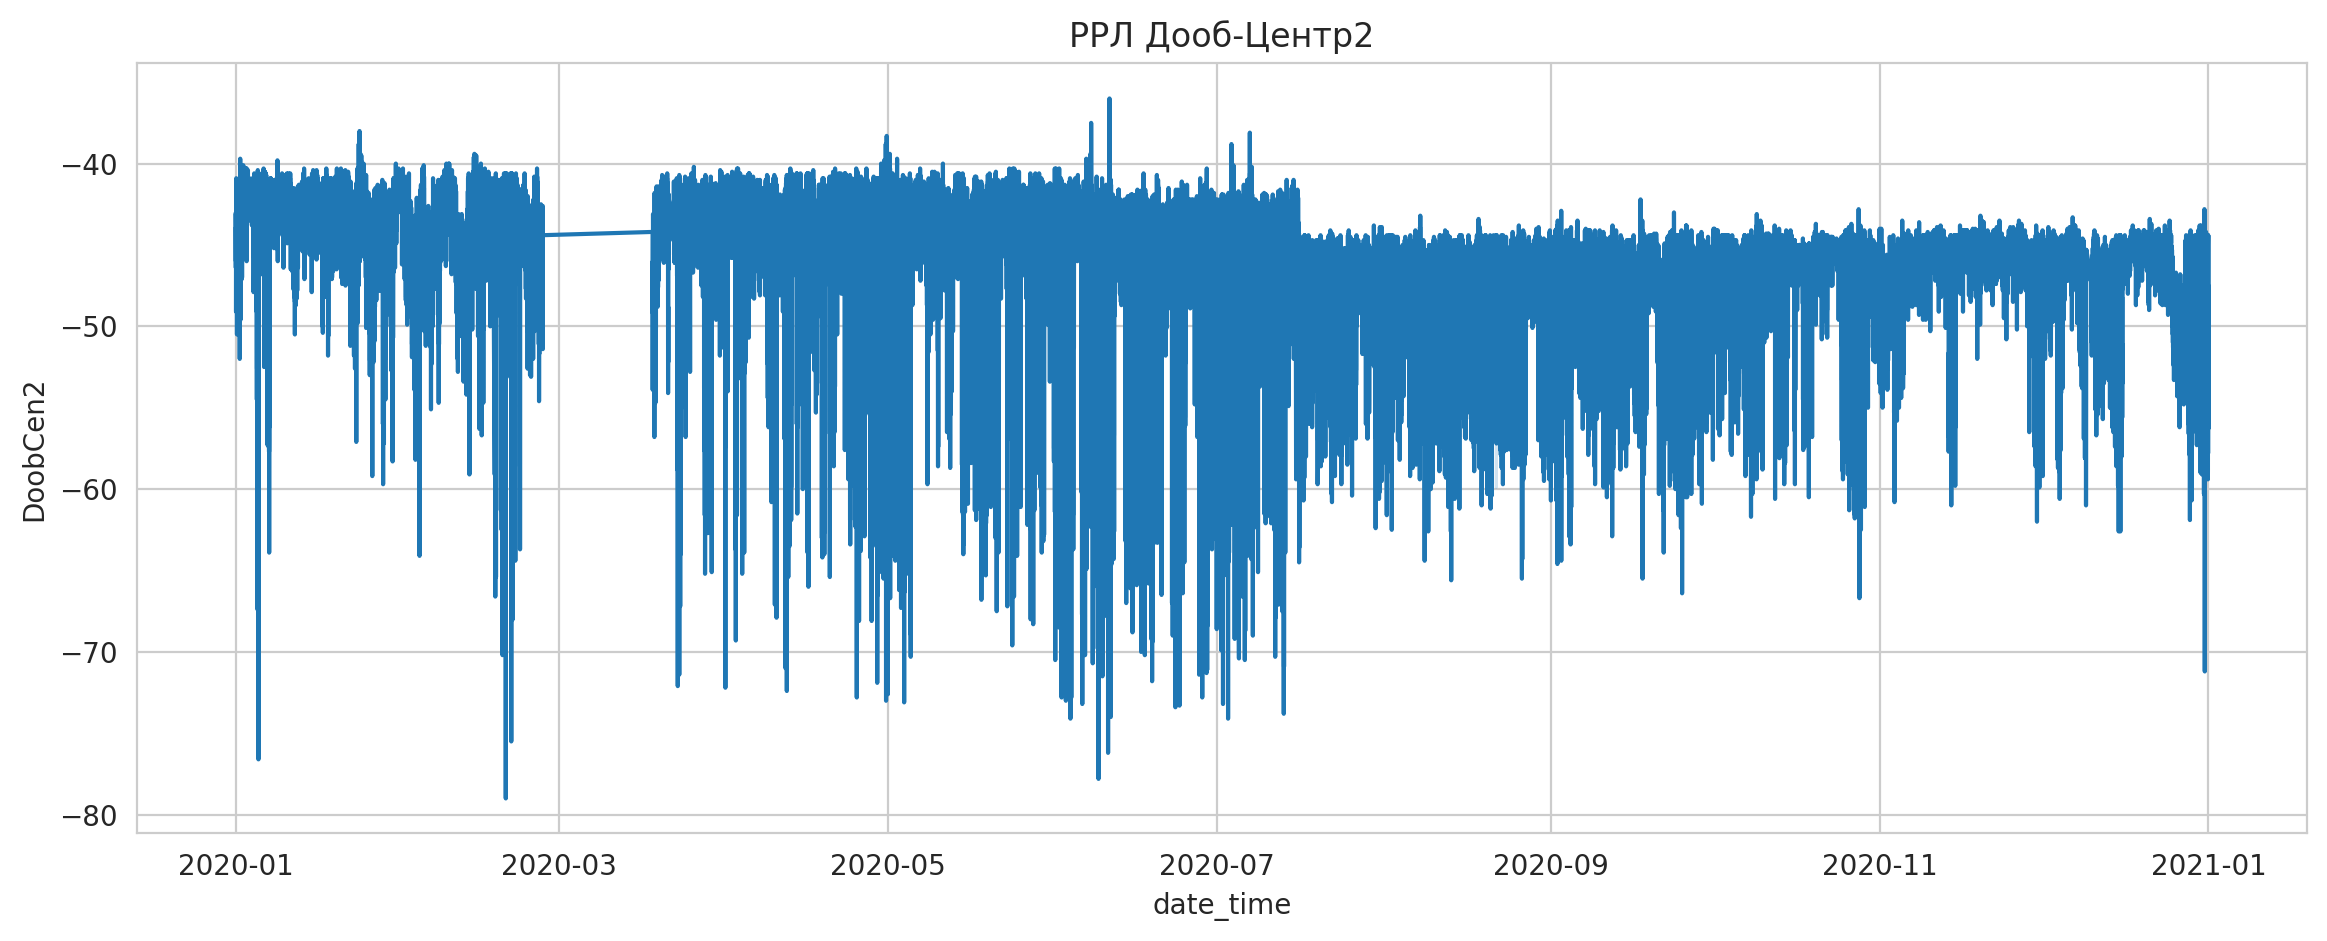

In [233]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen2", data = df3 , legend = 'auto')\
                                                              .set(title='РРЛ Дооб-Центр2');
plt.show()

### 2021 год.

In [234]:
df4 = df1[df1['year'] == 2021][['date_time', 'CenDoob1','CenDoob2',
                                                                 'DoobCen1', 'DoobCen2',
                                                                 'CenPenay1', 'CenPenay2',
                                                                 'PenayCen1', 'PenayCen2']]
df4

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  CenPenay1  \
62582  2021-01-01 00:07:00     -44.5     -42.9     -46.9     -51.0      -45.7   
62583  2021-01-01 00:17:00     -45.0     -45.9     -44.4     -56.6      -43.1   
62584  2021-01-01 00:27:00     -44.5     -43.4     -45.0     -56.3      -44.1   
62585  2021-01-01 00:37:00     -45.2     -46.9     -44.8     -52.7      -48.7   
62586  2021-01-01 00:47:00     -45.7     -49.9     -44.3     -52.3      -47.0   
...                    ...       ...       ...       ...       ...        ...   
112810 2021-12-31 23:15:00     -49.1     -43.8     -45.6     -50.3      -43.5   
112811 2021-12-31 23:25:00     -51.3     -44.2     -46.4     -48.7      -43.1   
112812 2021-12-31 23:35:00     -52.6     -44.7     -48.1     -47.2      -43.4   
112813 2021-12-31 23:45:00     -56.3     -44.4     -49.2     -46.7      -43.8   
112814 2021-12-31 23:55:00     -50.2     -43.9     -45.6     -50.8      -43.5   

        CenPenay2  PenayCen1  PenayCen2  
62582       -39.7      -50.4      -50.7  
62583       -41.8      -62.6      -54.9  
62584       -41.9      -55.2      -55.2  
62585       -38.9      -50.1      -49.7  
62586       -39.5      -50.4      -48.8  
...           ...        ...        ...  
112810      -52.5      -43.6      -46.3  
112811      -58.9      -43.5      -46.8  
112812      -54.8      -43.3      -44.7  
112813      -55.2      -44.0      -45.5  
112814      -57.8      -44.5      -46.3  

[50233 rows x 9 columns]

In [235]:
df4.to_csv('MiniLink_out_2021.csv') # за 2021 год

In [236]:
pd.set_option("display.precision", 1)
np.set_printoptions(precision=1)
df4.agg([np.mean, np.median, np.min, np.max])

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  \
mean   2021-07-02 12:22:09.573387776     -48.9     -46.4     -49.5     -48.4   
median 2021-07-03 16:35:00.000000000     -48.1     -45.2     -48.9     -47.8   
amin   2021-01-01 00:07:00.000000000     -74.4     -74.7     -74.1     -70.9   
amax   2021-12-31 23:55:00.000000000     -41.6     -39.1     -39.4     -40.0   

        CenPenay1  CenPenay2  PenayCen1  PenayCen2  
mean        -45.7      -48.3      -45.1      -46.7  
median      -44.7      -47.7      -44.6      -46.3  
amin        -91.7      -90.5      -77.3      -69.6  
amax        -40.6      -36.7      -40.1      -38.8

## РРЛ Пенай 2021 год.

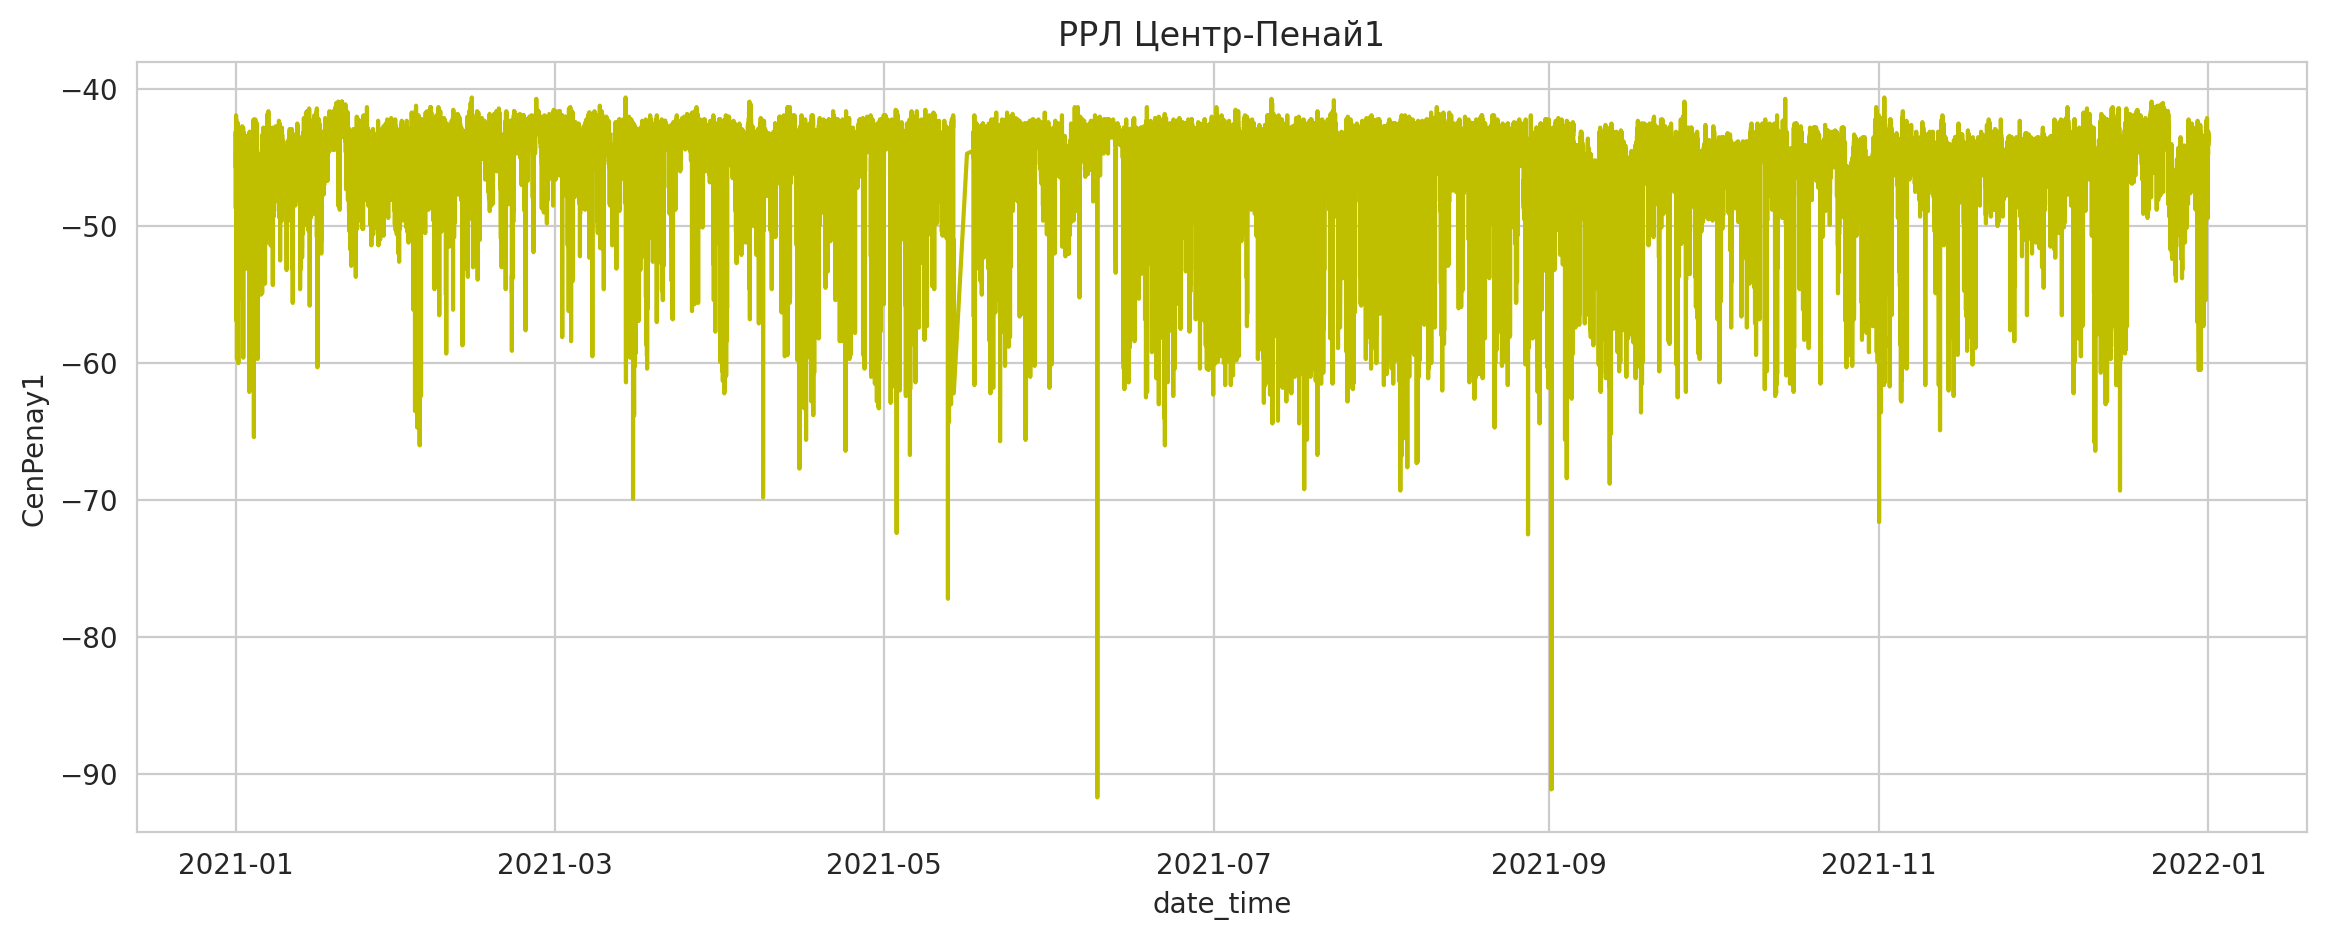

In [237]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay1", data = df4 , legend = 'auto', color = 'y')\
                                                                  .set(title='РРЛ Центр-Пенай1');
plt.show()

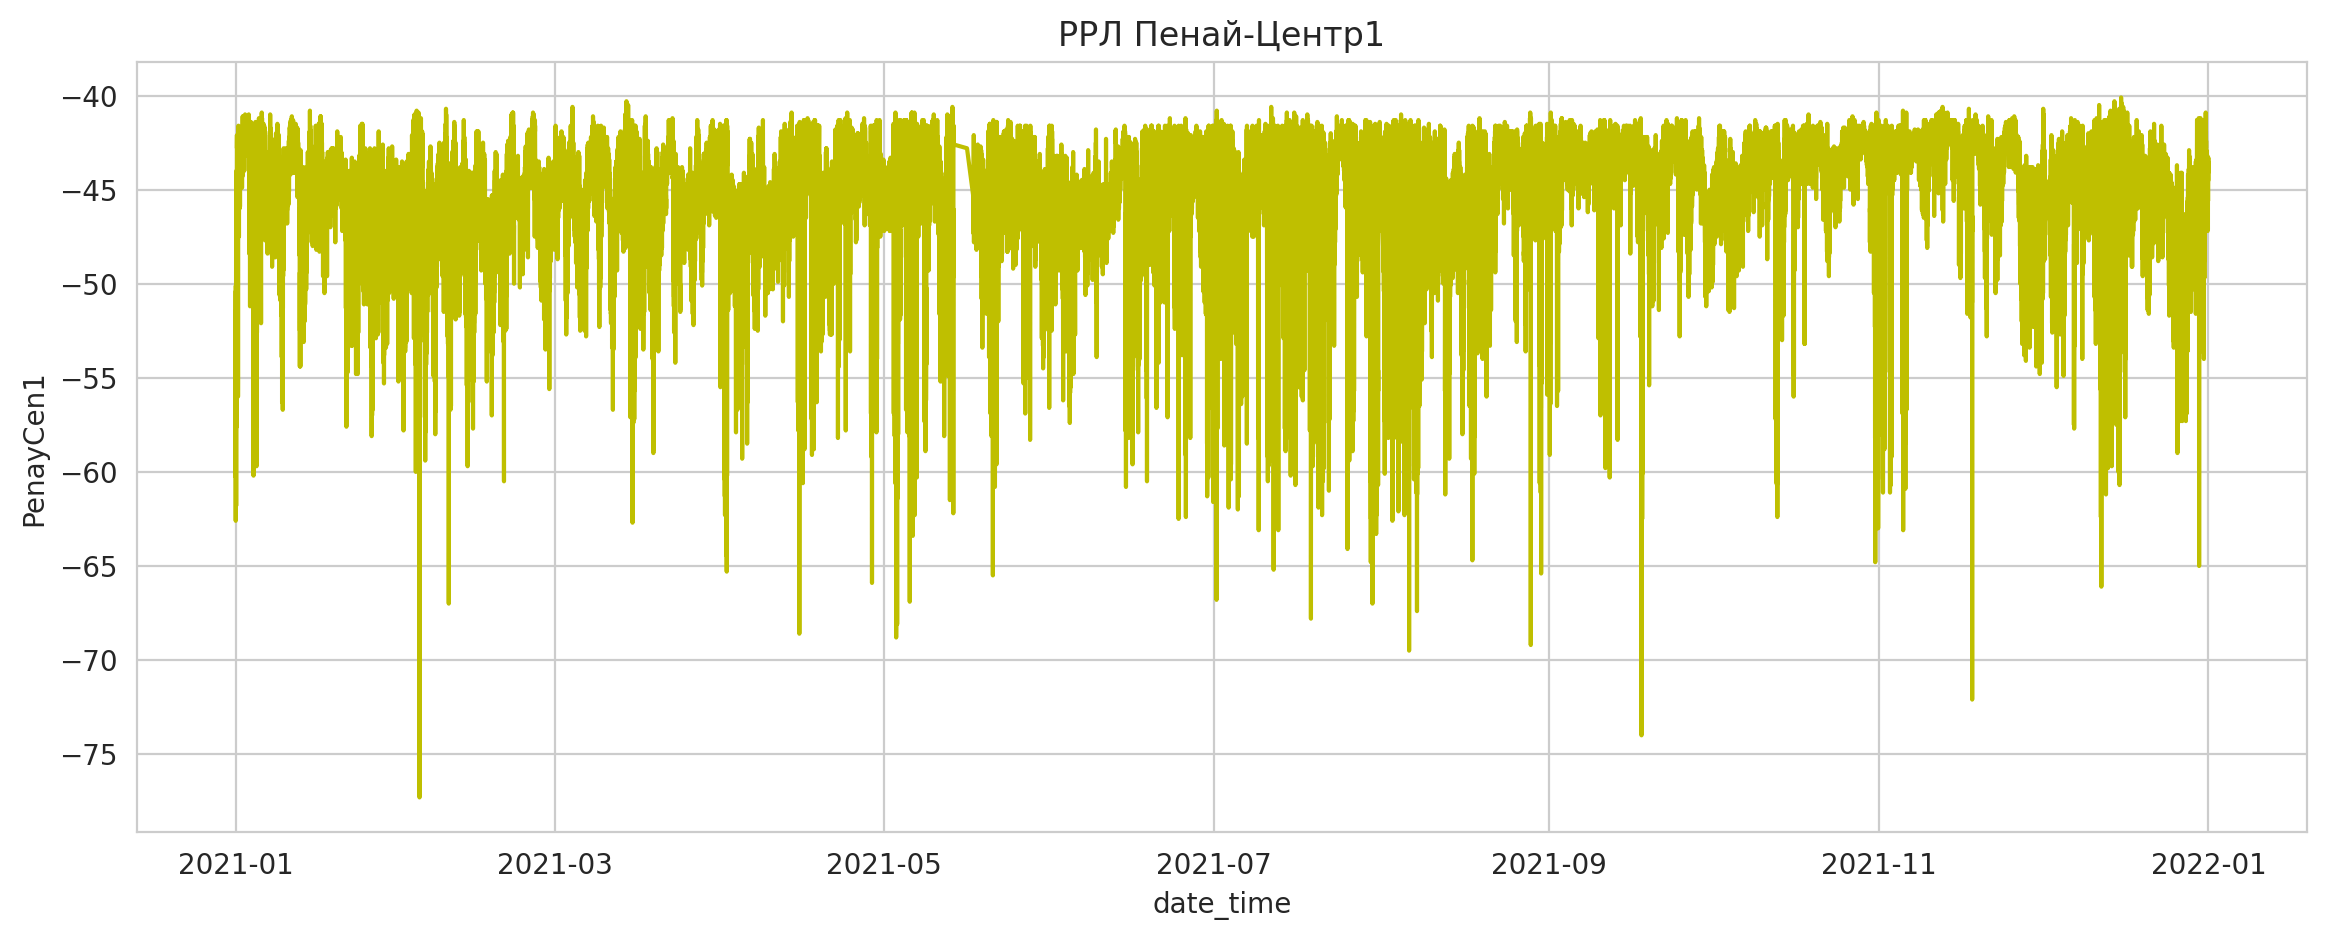

In [238]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen1", data = df4 , legend = 'auto', color = 'y')\
                                                             .set(title='РРЛ Пенай-Центр1');
plt.show()

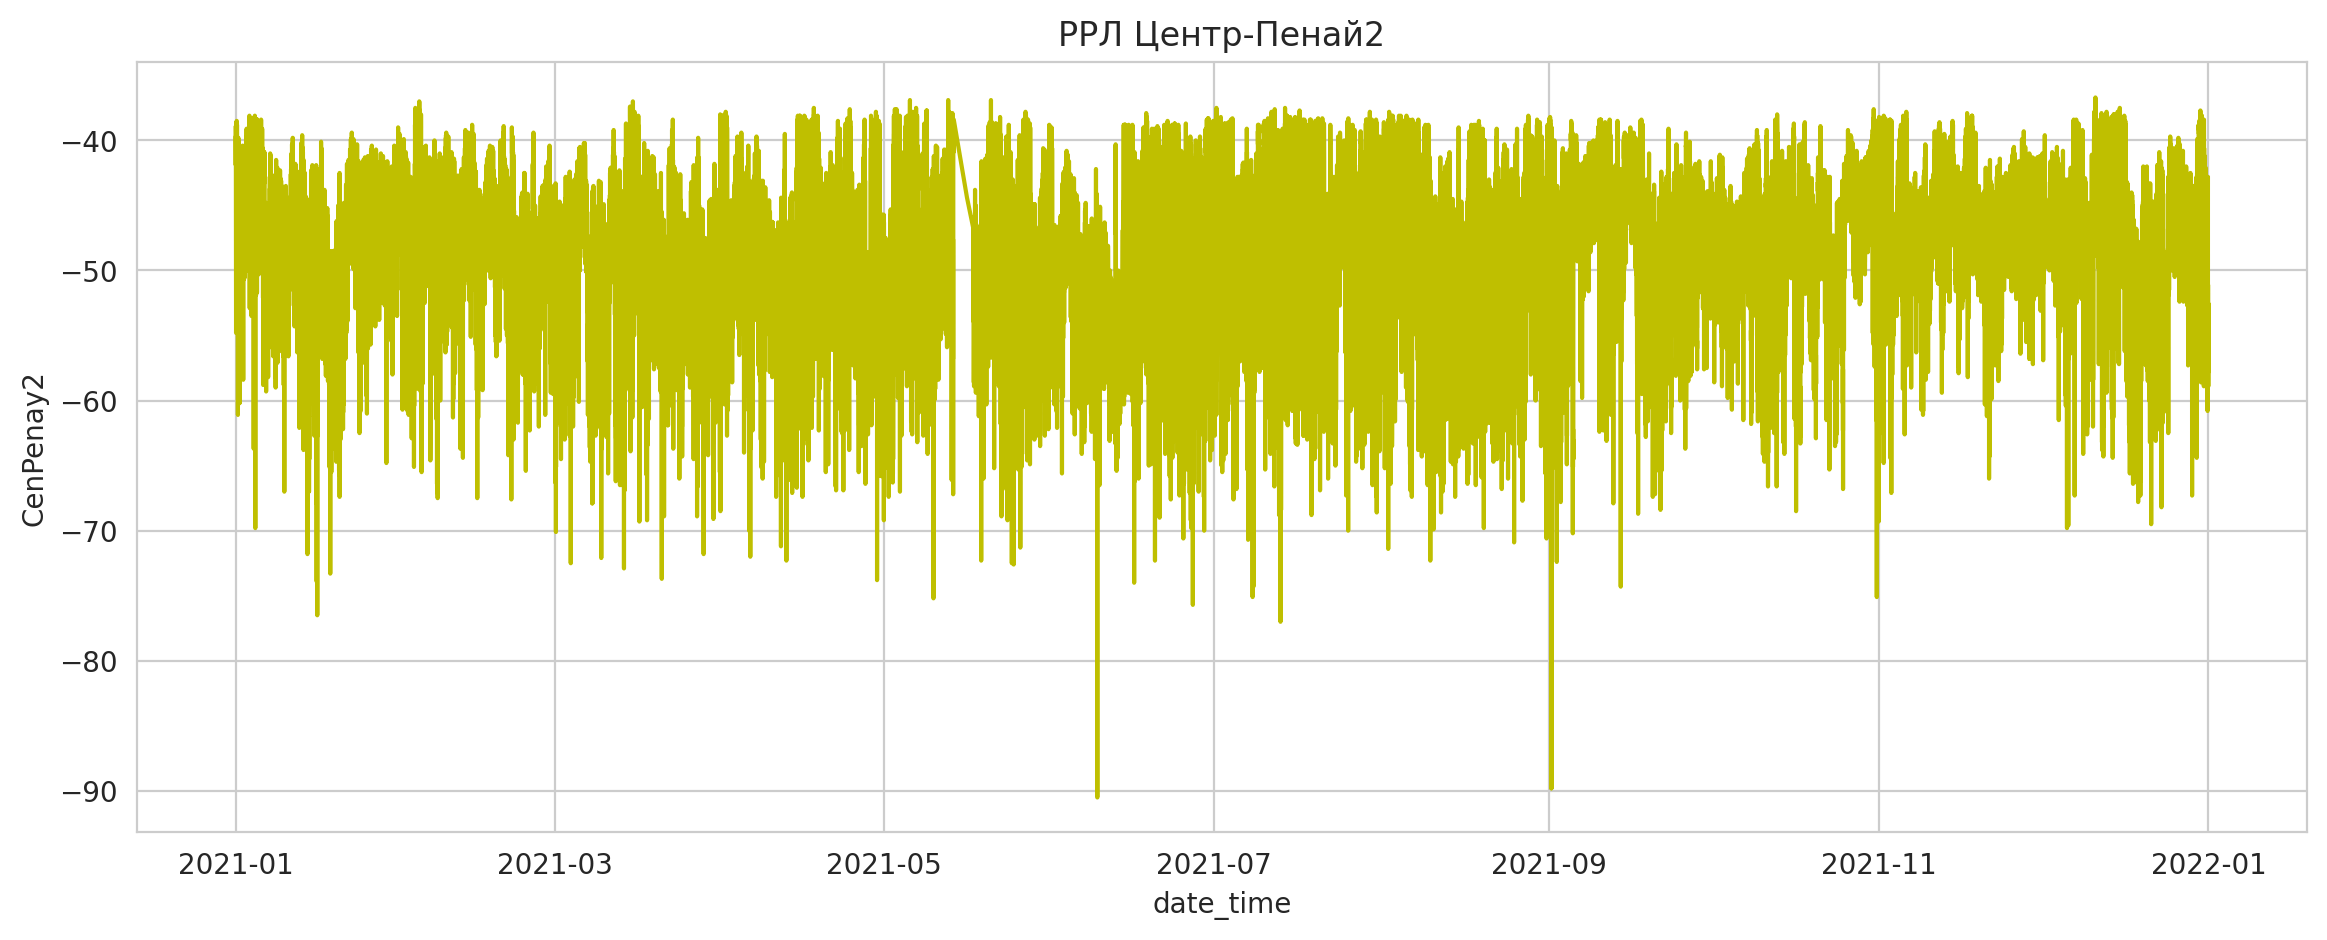

In [239]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay2", data = df4 , legend = 'auto', color = 'y')\
                                                                .set(title='РРЛ Центр-Пенай2');
plt.show()

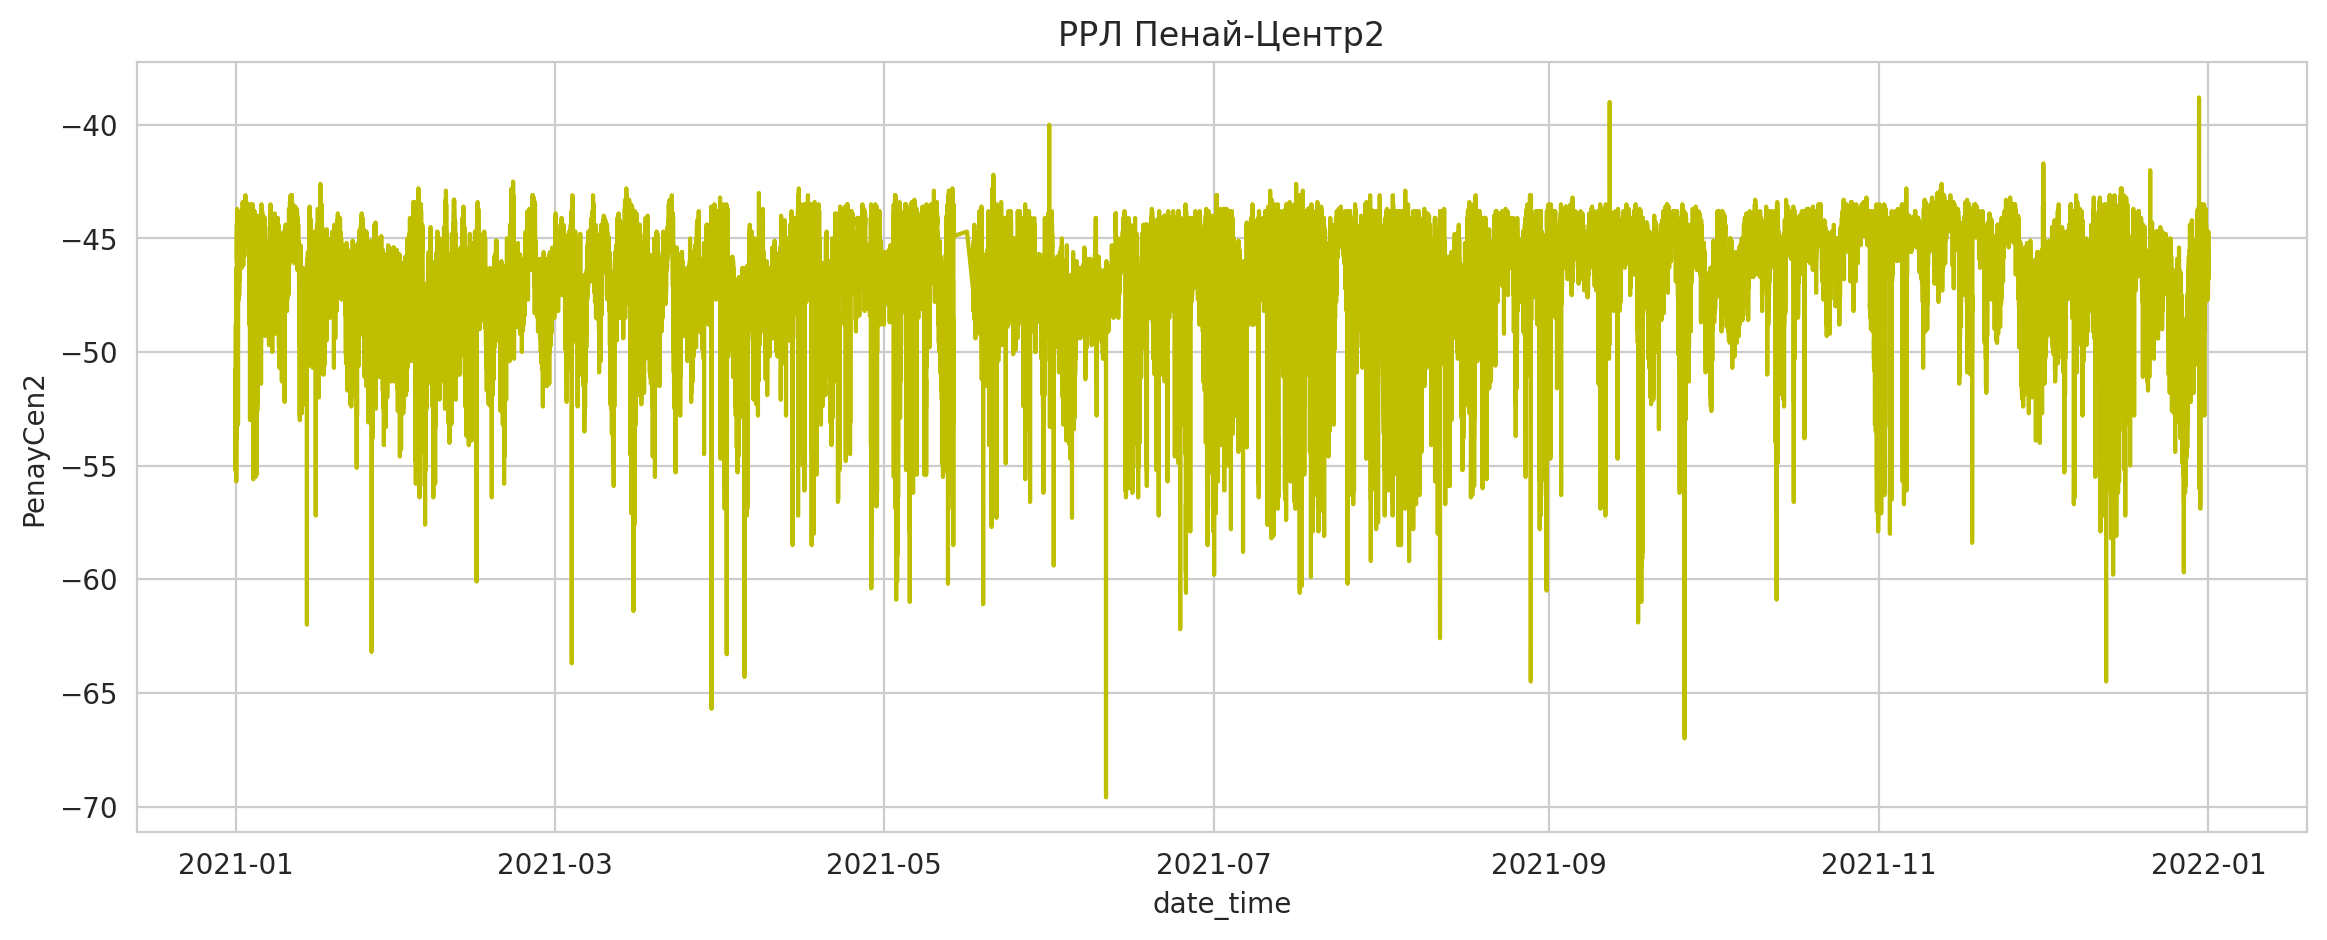

In [240]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen2", data = df4 , legend = 'auto', color = 'y')\
                                                             .set(title='РРЛ Пенай-Центр2');
plt.show()

## РРЛ Дооб 2021 год.

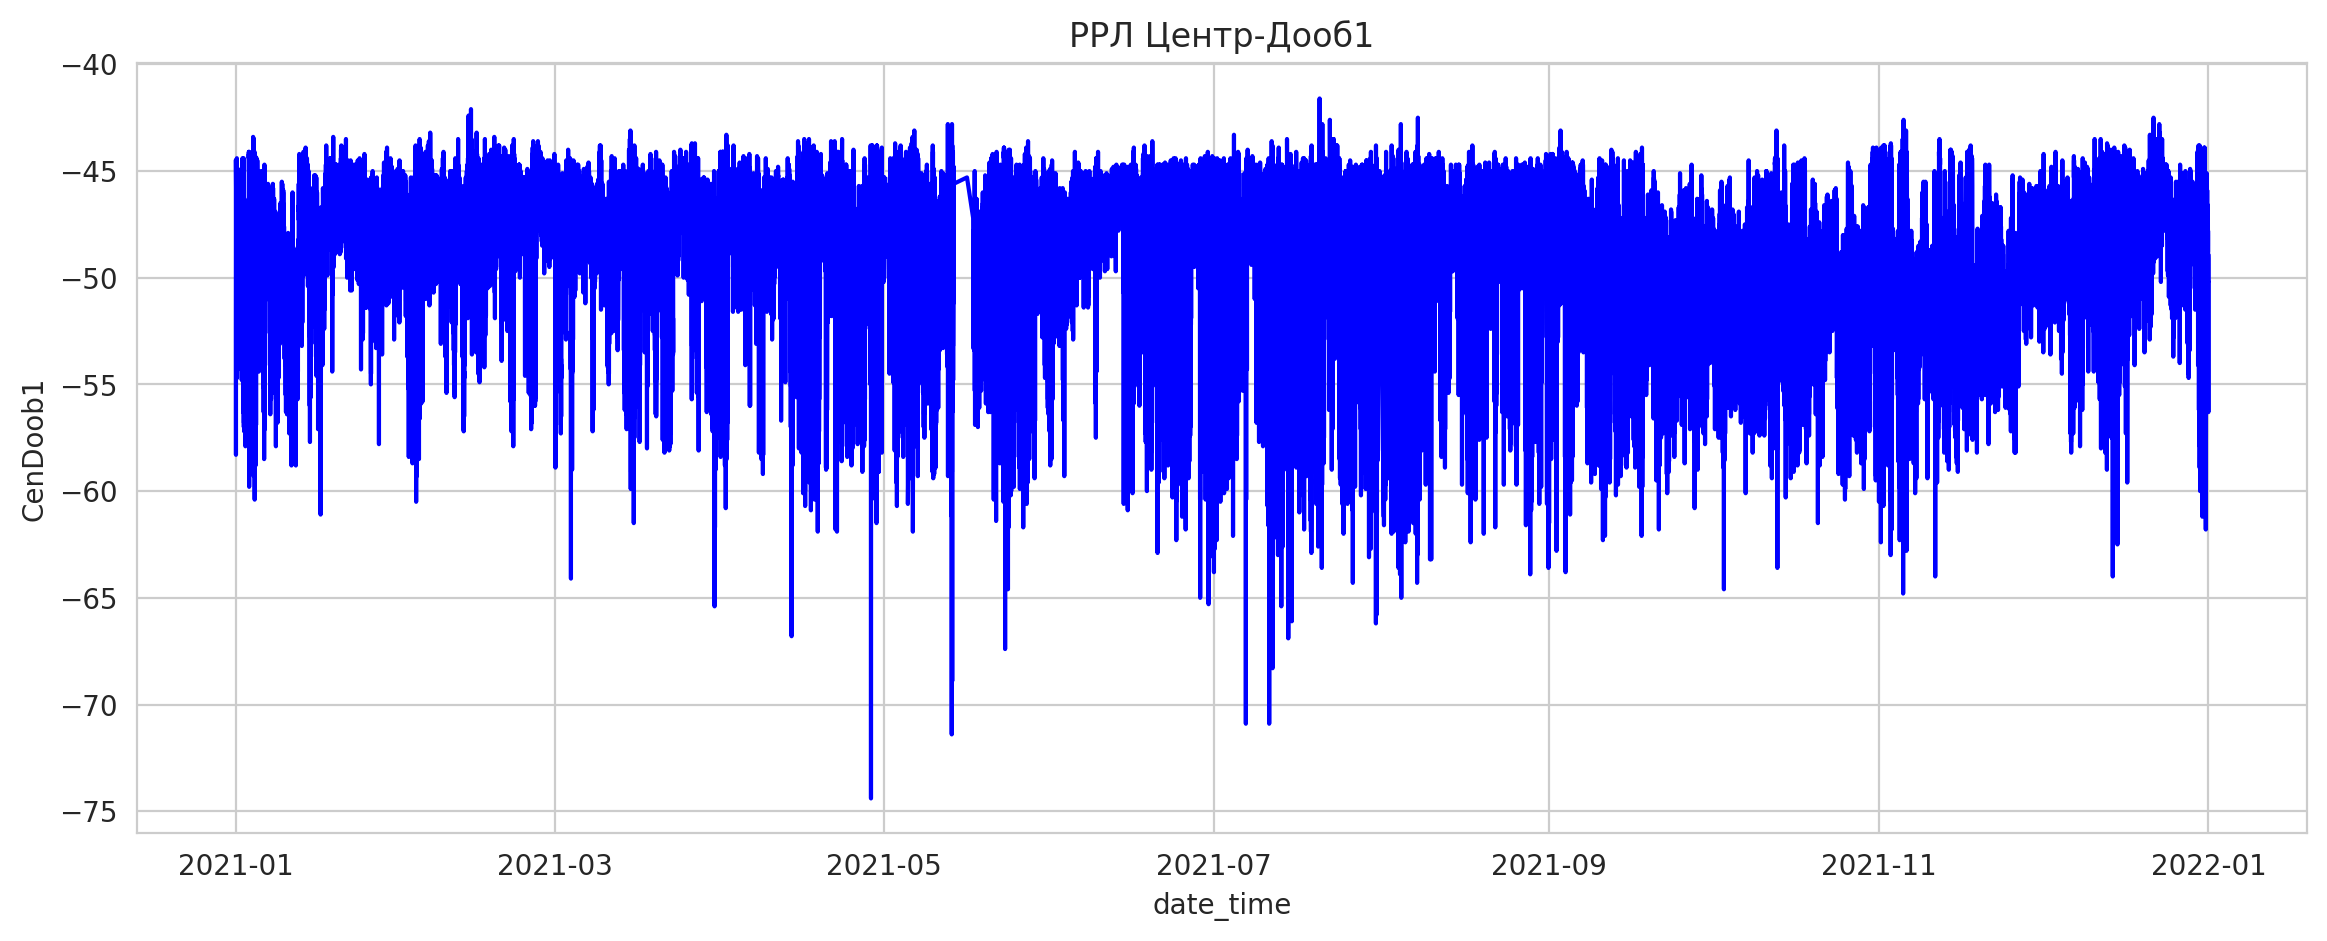

In [241]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob1", data = df4 , legend = 'auto', color = 'b')\
                                                   .set(title='РРЛ Центр-Дооб1');
plt.show()

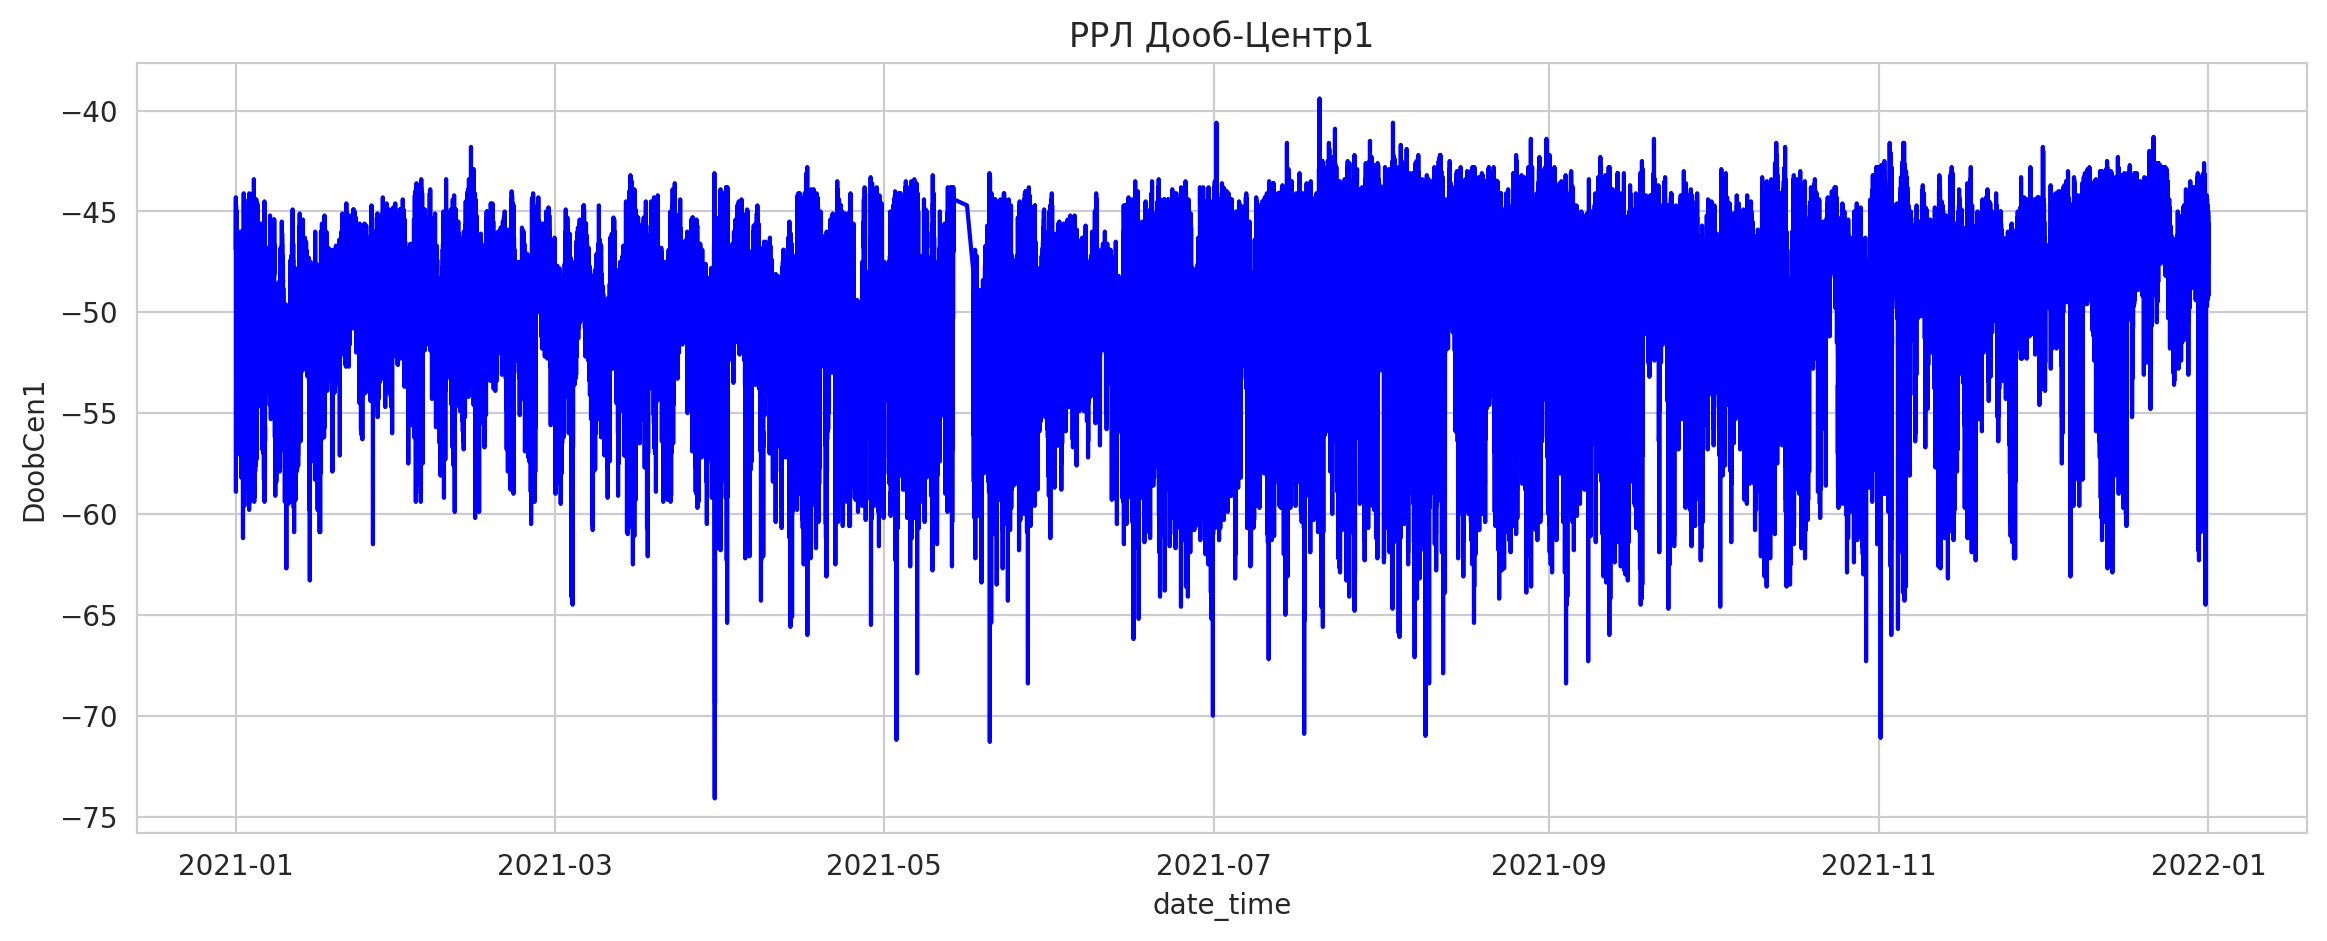

In [242]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen1", data = df4 , legend = 'auto', color = 'b')\
                                                   .set(title='РРЛ Дооб-Центр1');
plt.show()

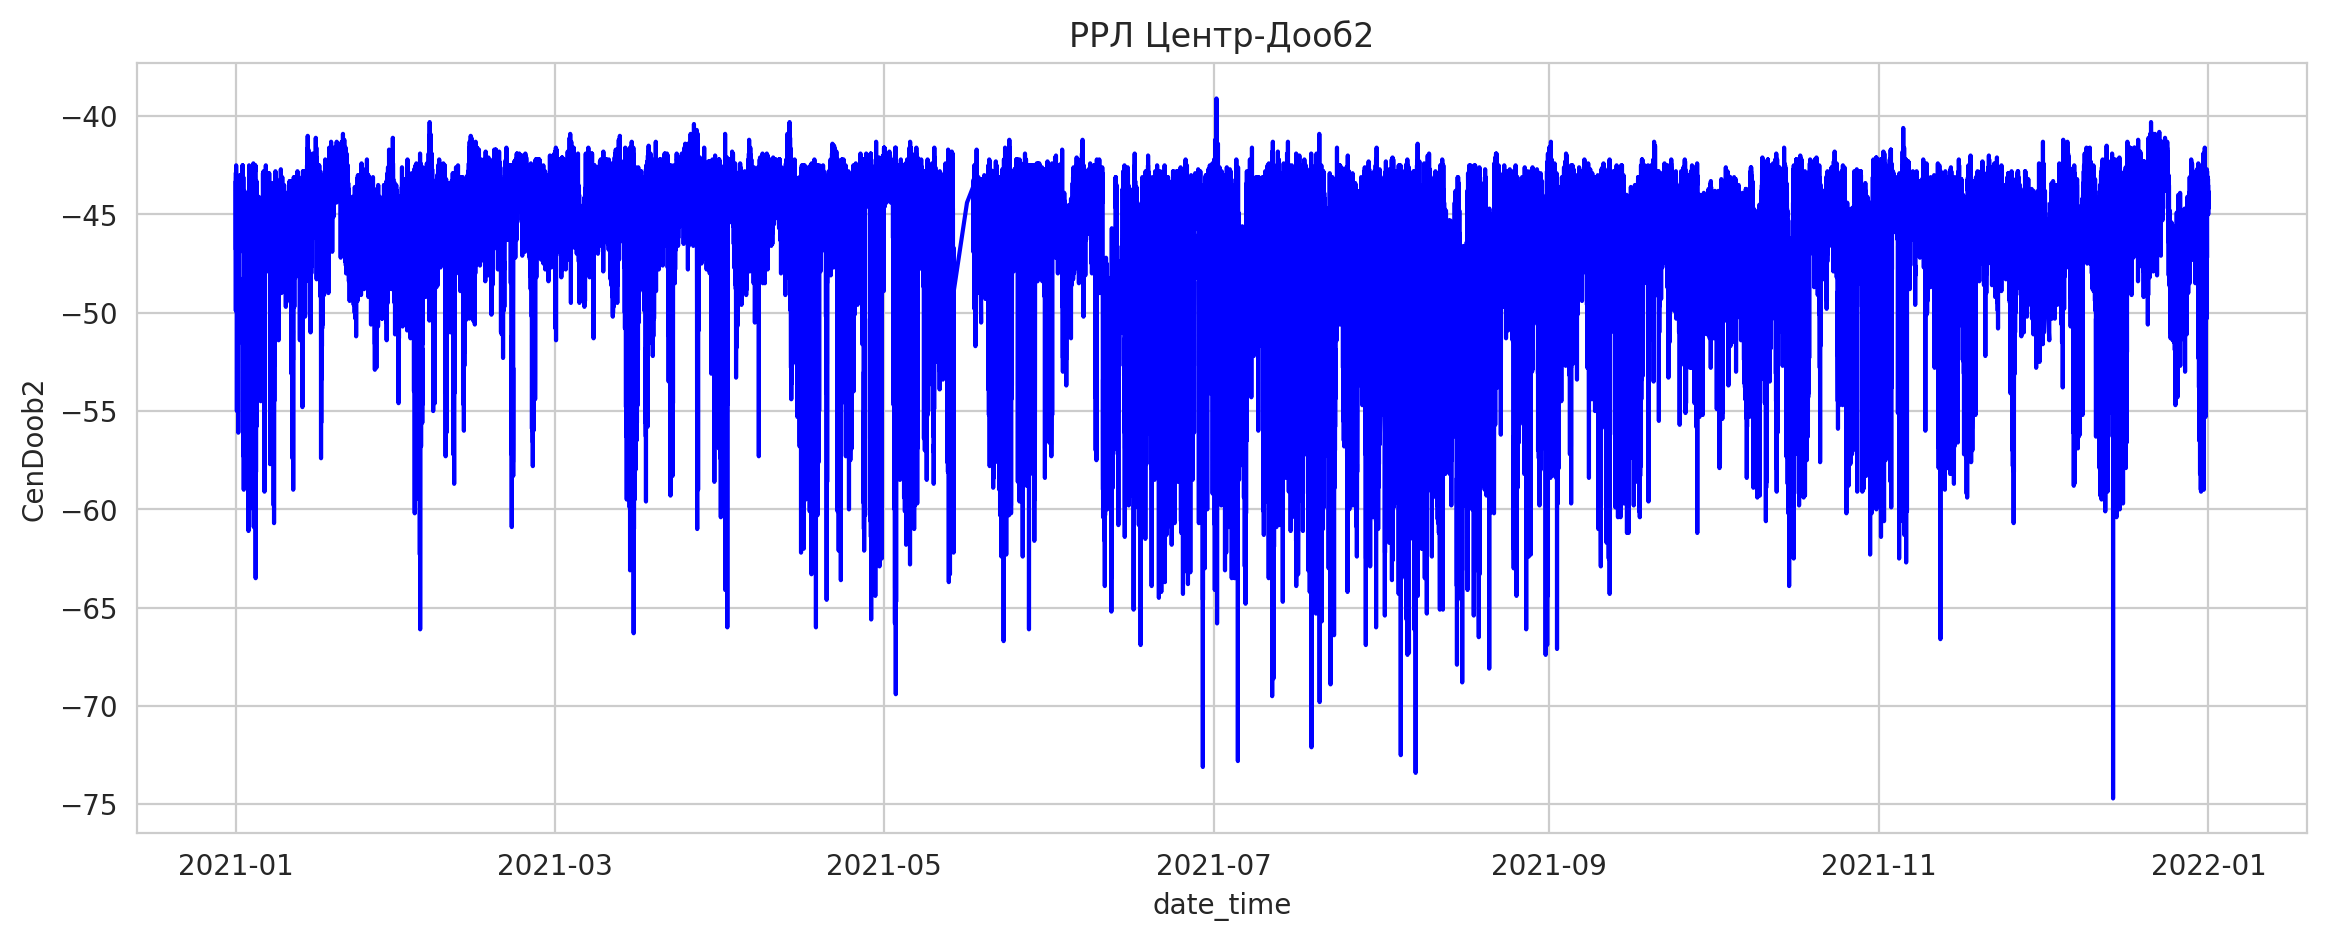

In [243]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob2", data = df4 , legend = 'auto', color = 'b')\
                                                              .set(title='РРЛ Центр-Дооб2');
plt.show()

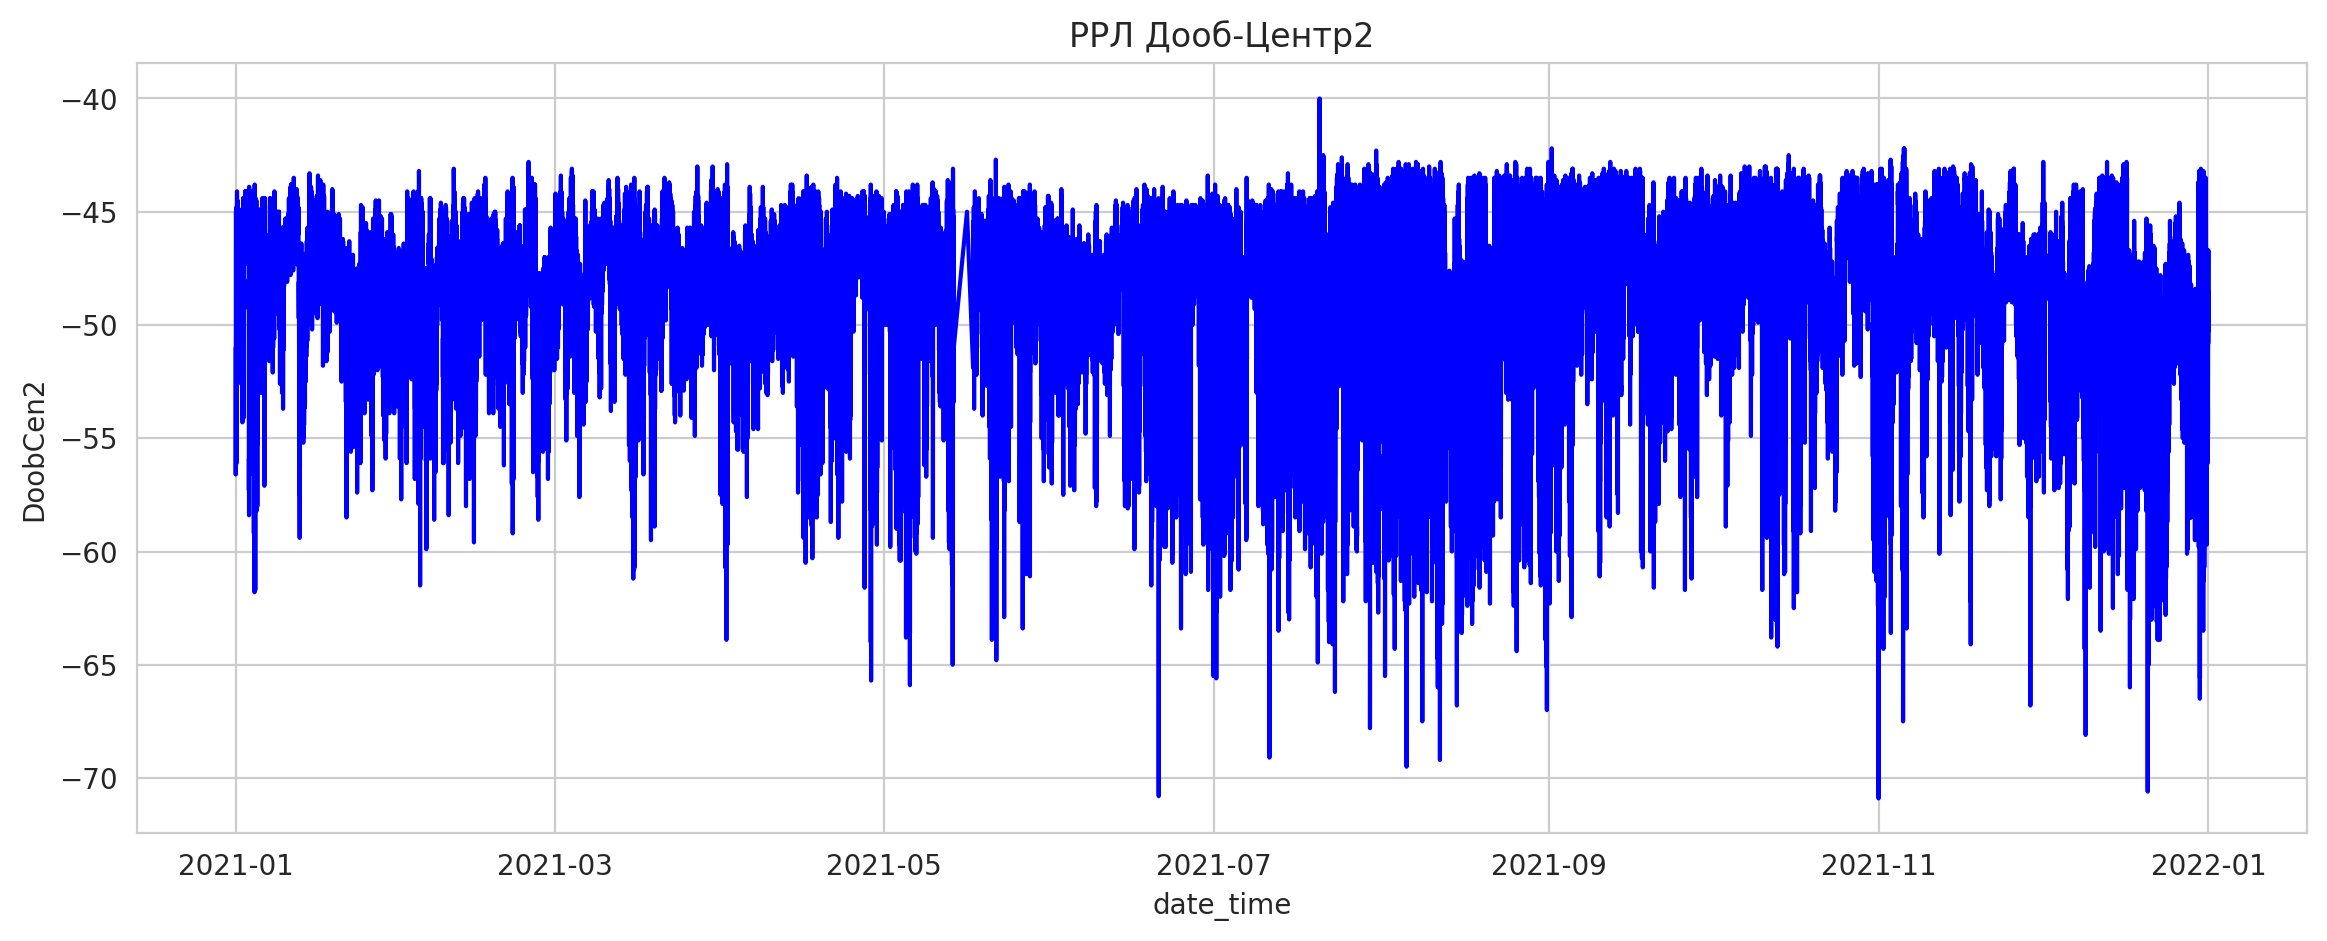

In [244]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen2", data = df4 , legend = 'auto', color = 'b')\
                                                              .set(title='РРЛ Дооб-Центр2');
plt.show()

### 2022 год.

In [245]:
df5 = df1[df1['year'] == 2022][['date_time', 'CenDoob1','CenDoob2',
                                                                 'DoobCen1', 'DoobCen2',
                                                                 'CenPenay1', 'CenPenay2',
                                                                 'PenayCen1', 'PenayCen2']]
df5

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  CenPenay1  \
112815 2022-01-01 00:05:00     -49.5     -43.3     -46.6     -49.2      -44.7   
112816 2022-01-01 00:15:00     -47.9     -43.1     -45.7     -52.1      -43.9   
112817 2022-01-01 00:25:00     -48.0     -43.4     -45.2     -52.0      -43.1   
112818 2022-01-01 00:35:00     -51.0     -43.8     -46.6     -50.3      -43.4   
112819 2022-01-01 00:45:00     -47.8     -43.5     -45.3     -51.0      -43.0   
...                    ...       ...       ...       ...       ...        ...   
157033 2022-11-14 01:35:00     -48.8     -43.5     -53.1     -46.0      -45.0   
157034 2022-11-14 01:45:00     -50.3     -45.3     -55.2     -45.8      -44.7   
157035 2022-11-14 01:55:00     -51.5     -44.7     -55.5     -45.7      -45.0   
157036 2022-11-14 02:05:00     -50.9     -46.0     -55.2     -45.8      -44.7   
157037 2022-11-14 02:15:00     -51.0     -44.0     -55.8     -45.3      -44.1   

        CenPenay2  PenayCen1  PenayCen2  
112815      -50.8      -43.4      -46.4  
112816      -57.3      -44.1      -45.6  
112817      -58.6      -44.0      -46.0  
112818      -55.3      -44.1      -46.2  
112819      -60.4      -44.1      -46.6  
...           ...        ...        ...  
157033      -46.0      -43.5      -44.7  
157034      -46.9      -43.0      -44.7  
157035      -46.7      -42.6      -44.9  
157036      -45.9      -42.8      -45.0  
157037      -45.6      -42.5      -45.0  

[44223 rows x 9 columns]

In [246]:
df5.to_csv('MiniLink_out_2022.csv') # за 2022 год

In [247]:
pd.set_option("display.precision", 1)
np.set_printoptions(precision=1)
df5.agg([np.mean, np.median, np.min, np.max])

date_time  CenDoob1  CenDoob2  DoobCen1  DoobCen2  \
mean   2022-06-08 11:15:50.559663616     -49.1     -48.2     -49.1     -49.1   
median 2022-06-08 01:55:00.000000000     -48.1     -47.2     -48.0     -47.9   
amin   2022-01-01 00:05:00.000000000     -80.0     -89.8     -72.3     -73.4   
amax   2022-11-14 02:15:00.000000000     -41.3     -40.0     -41.6     -41.2   

        CenPenay1  CenPenay2  PenayCen1  PenayCen2  
mean        -46.6      -47.1      -45.1      -46.7  
median      -45.3      -46.2      -44.3      -46.1  
amin        -91.7      -90.5      -91.4      -90.1  
amax        -40.7      -36.6      -39.7      -41.6

## РРЛ Пенай 2022 год.

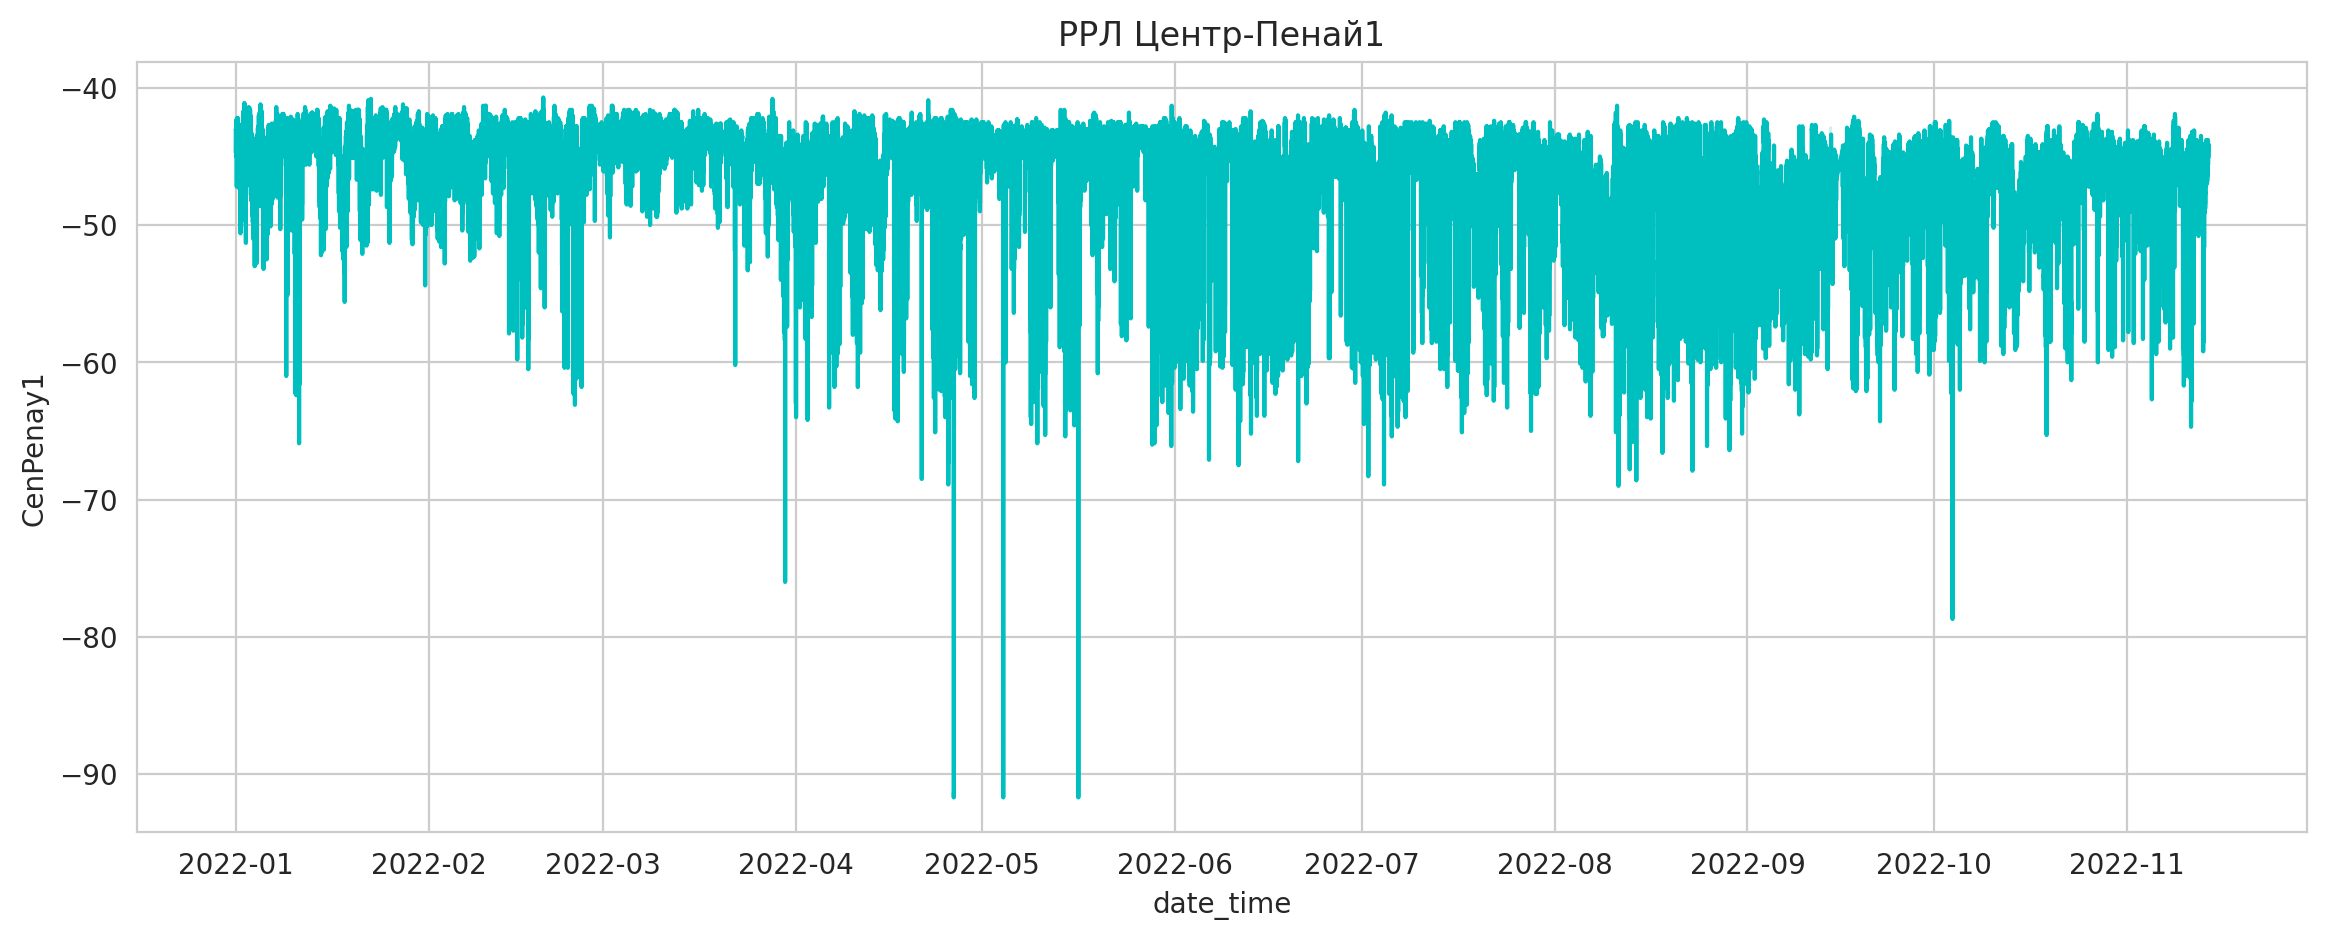

In [248]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay1", data = df5 , legend = 'auto', color = 'c')\
                                                                  .set(title='РРЛ Центр-Пенай1');
plt.show()

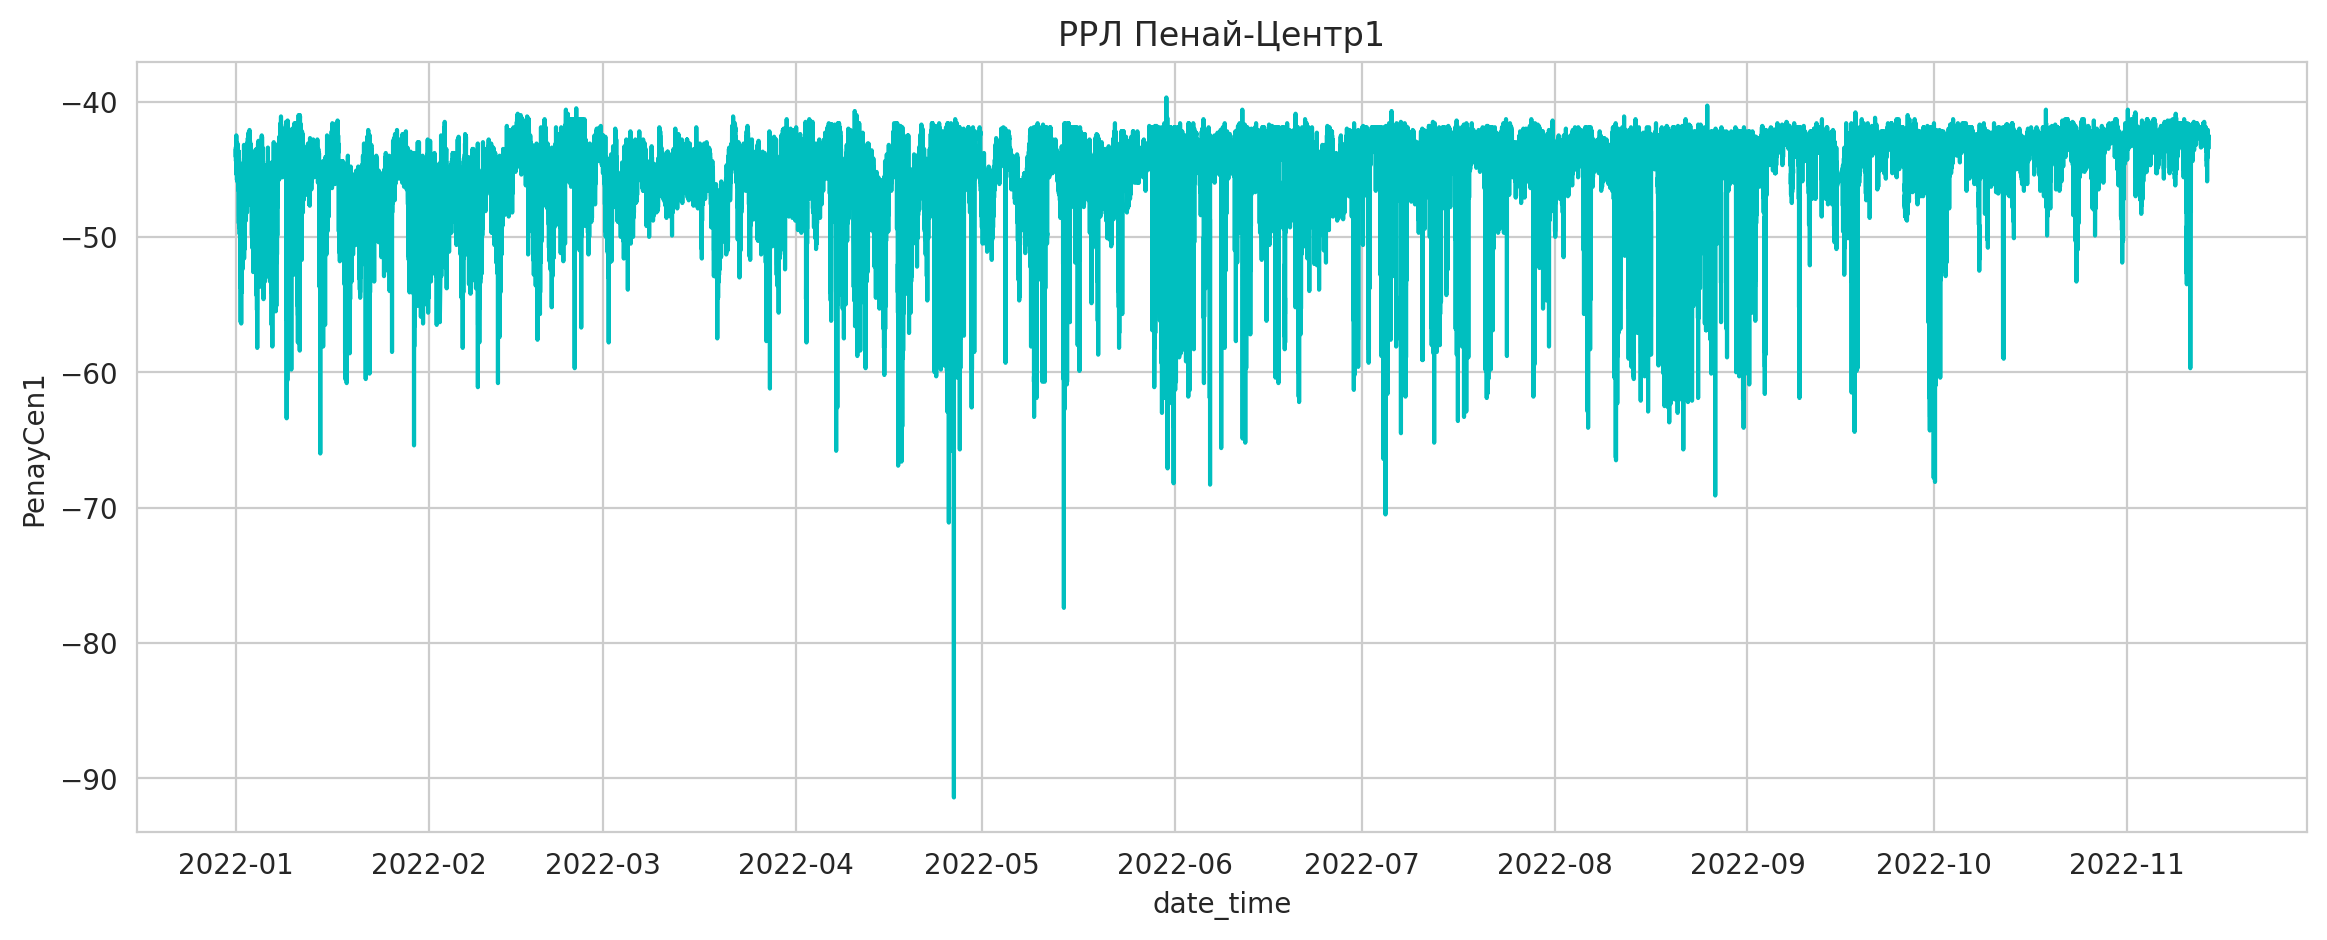

In [249]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen1", data = df5 , legend = 'auto', color = 'c')\
                                                             .set(title='РРЛ Пенай-Центр1');
plt.show()

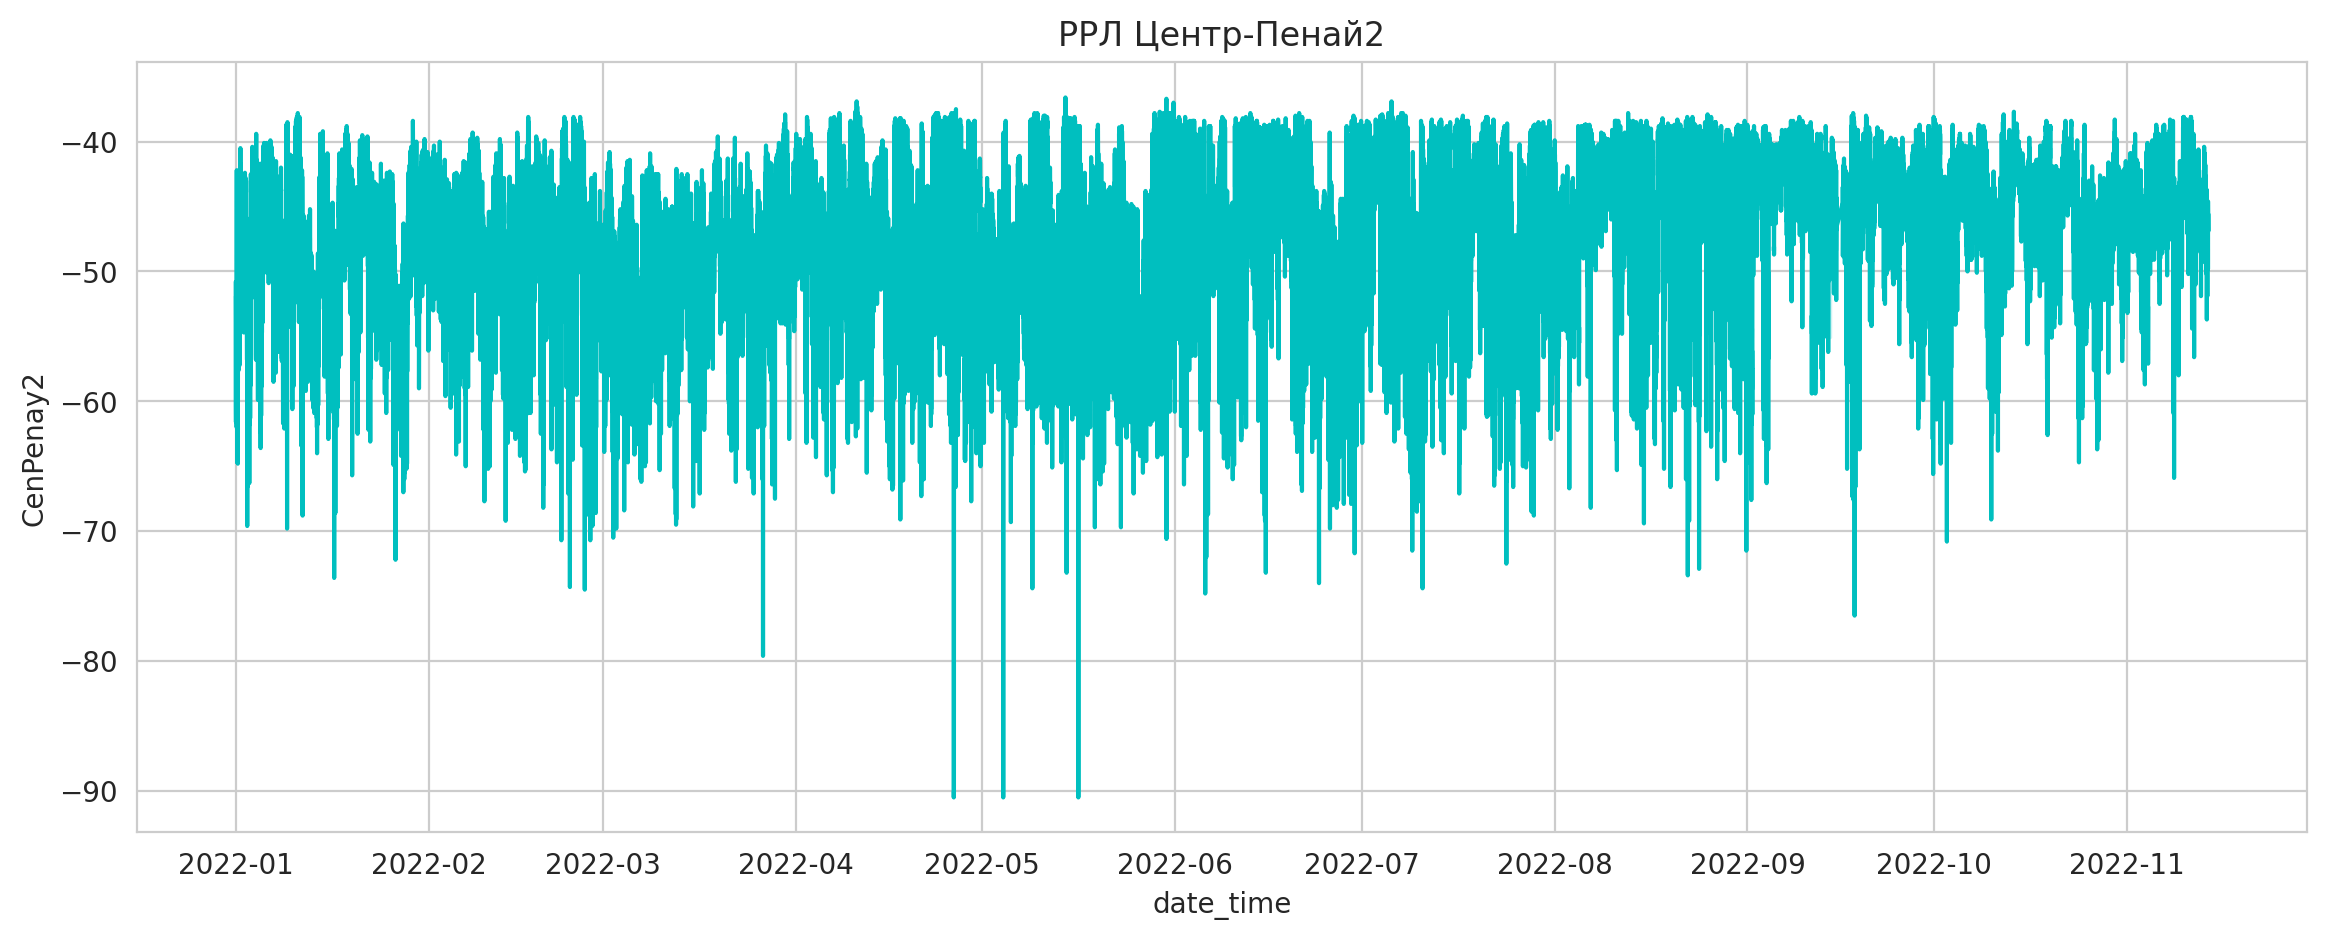

In [250]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenPenay2", data = df5 , legend = 'auto', color = 'c')\
                                                                .set(title='РРЛ Центр-Пенай2');
plt.show()

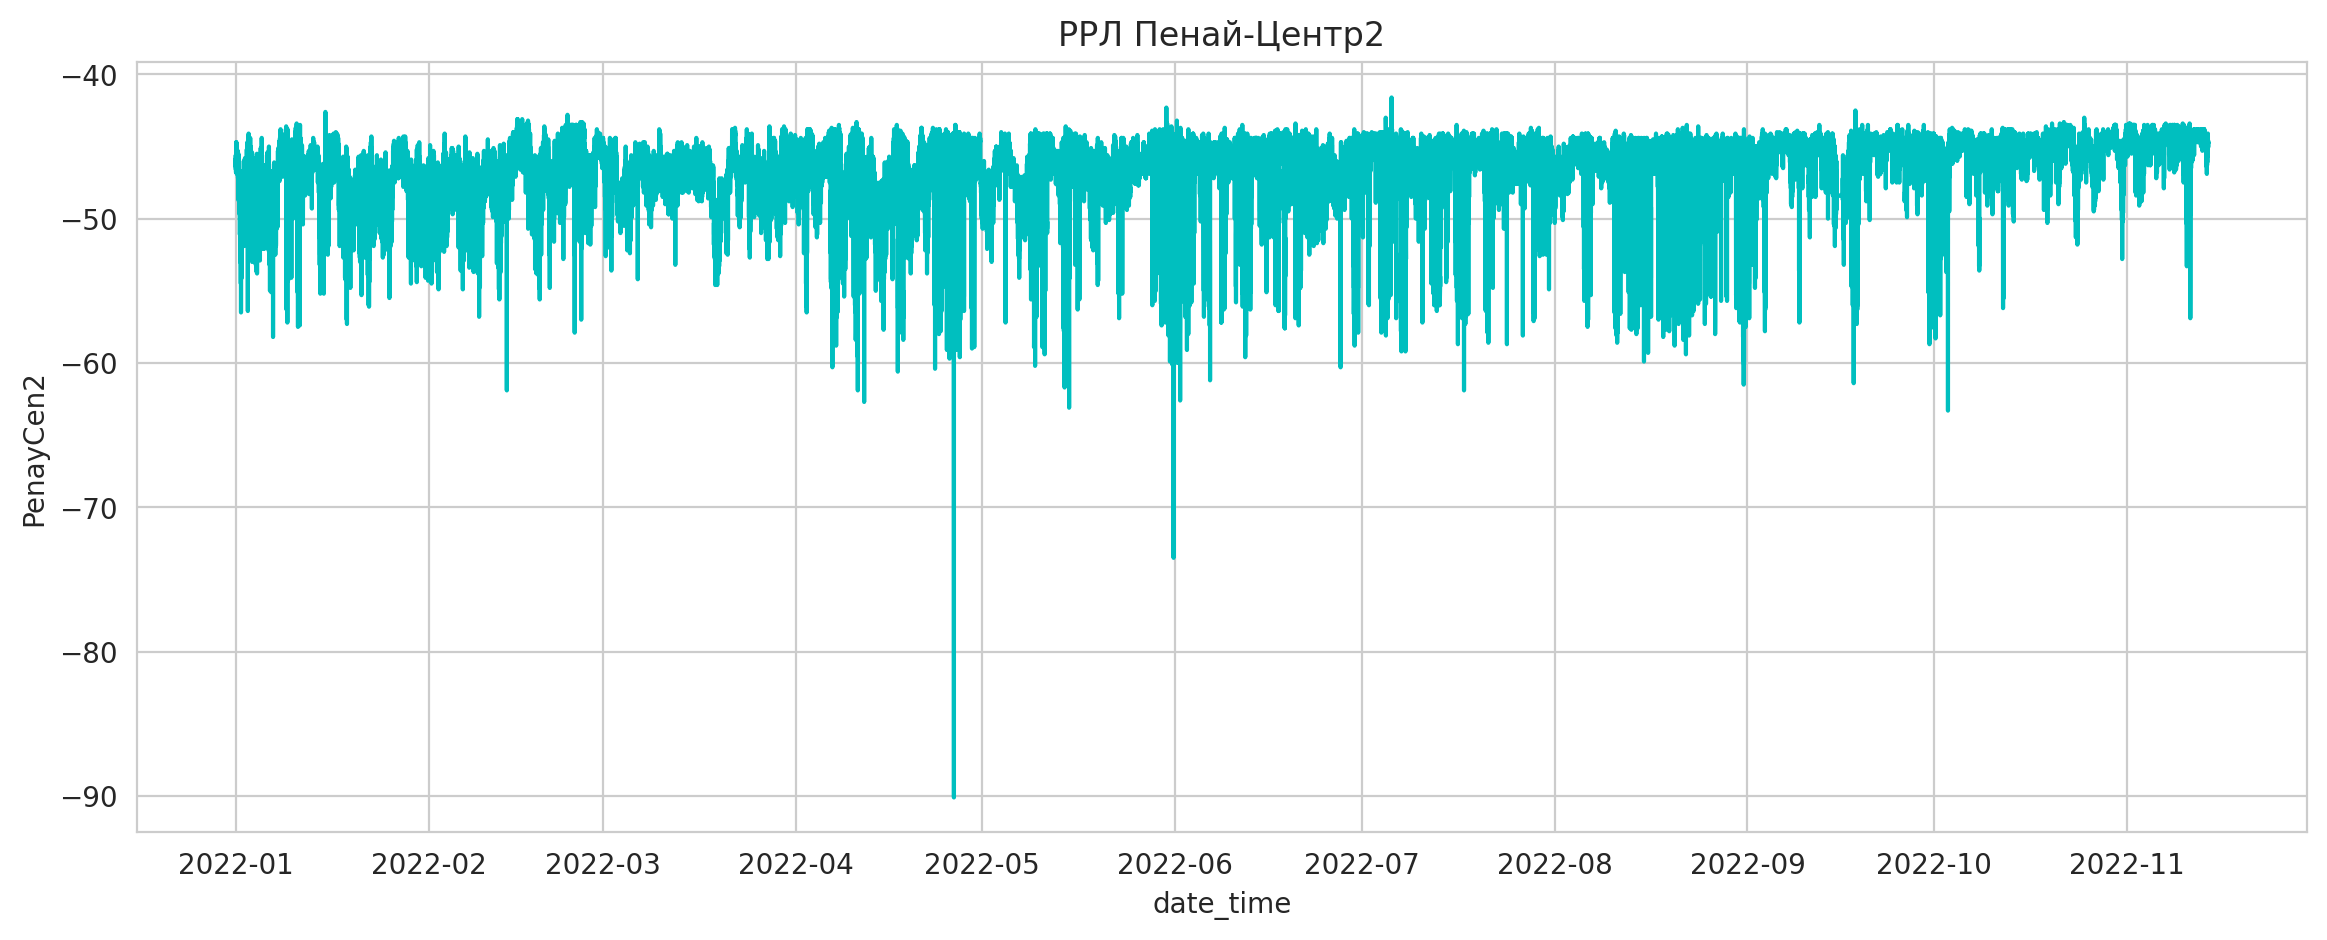

In [251]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "PenayCen2", data = df5 , legend = 'auto', color = 'c')\
                                                             .set(title='РРЛ Пенай-Центр2');
plt.show()

## РРЛ Дооб 2022 год.

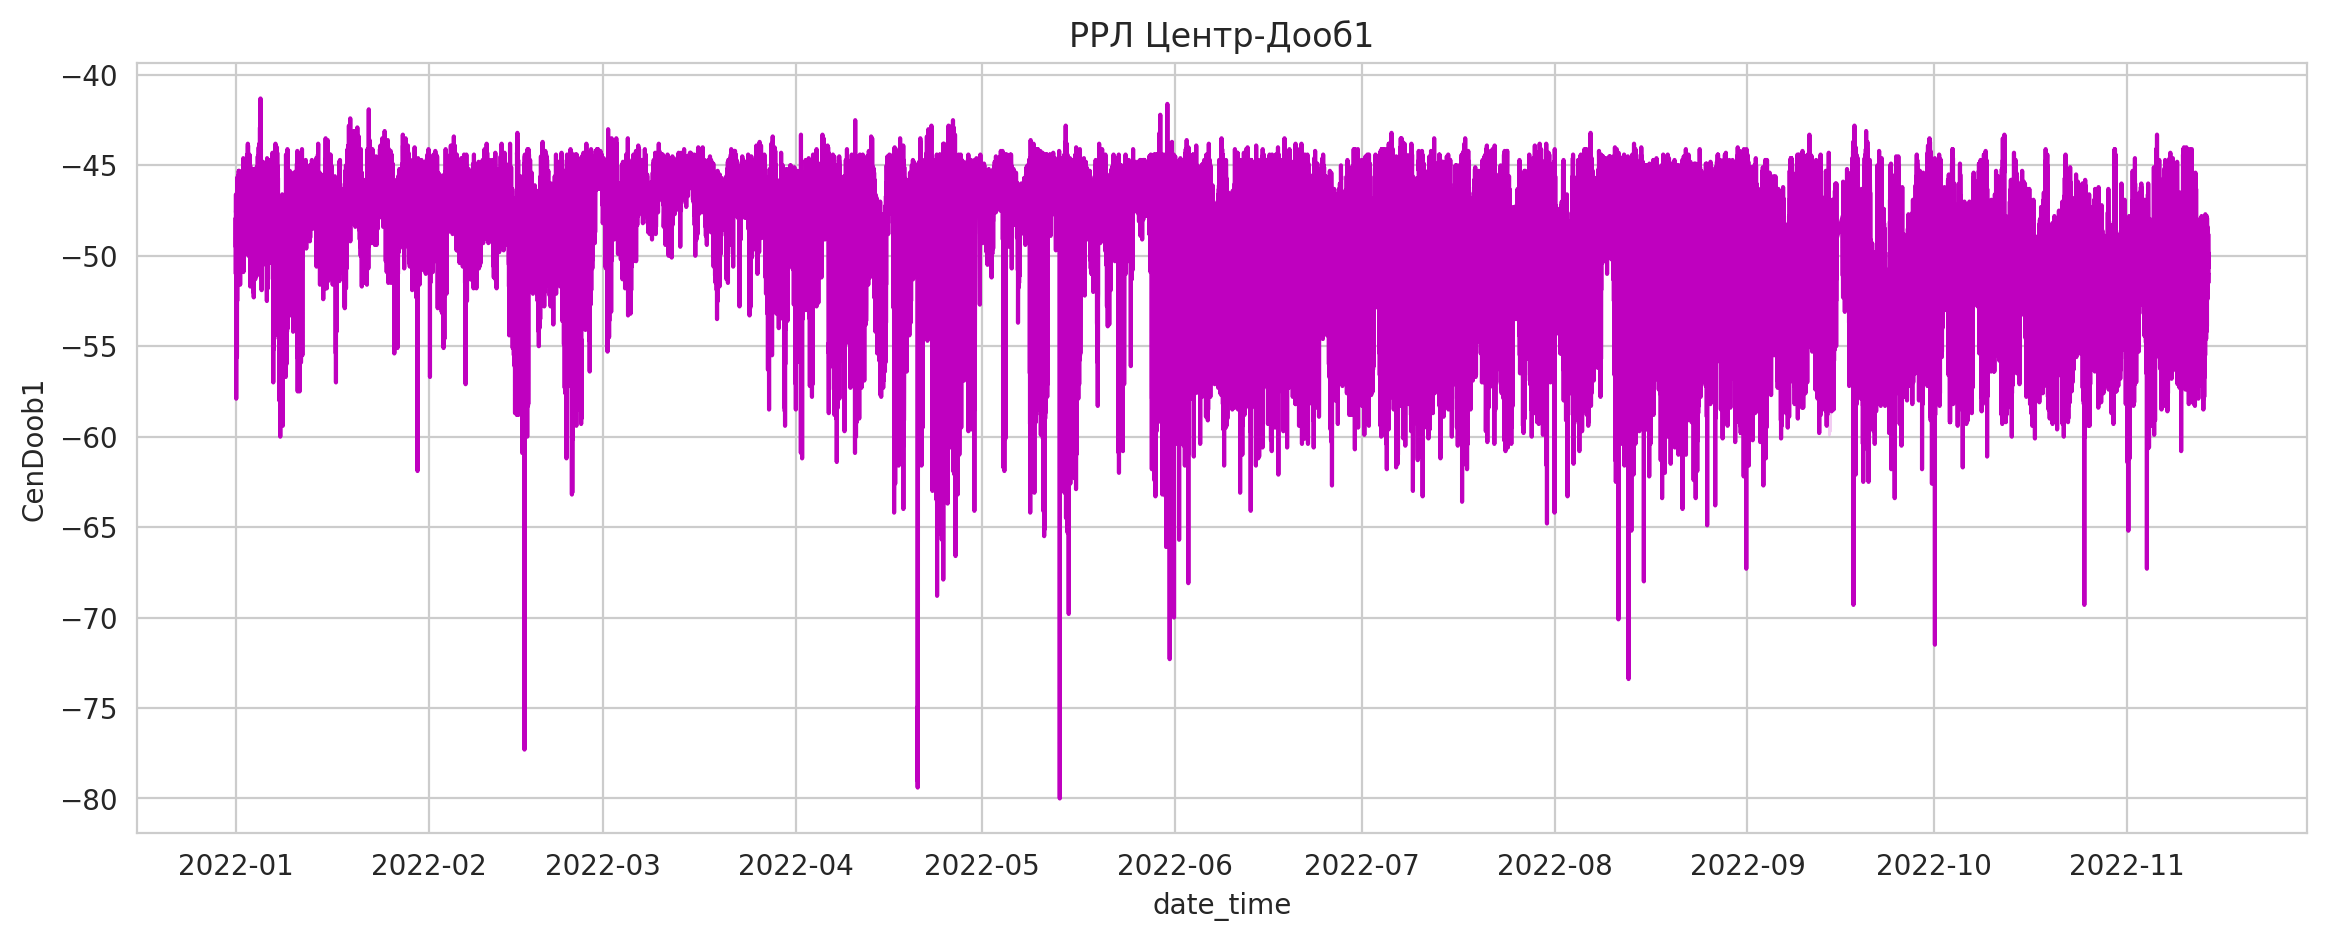

In [252]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob1", data = df5 , legend = 'auto', color = 'm')\
                                                   .set(title='РРЛ Центр-Дооб1');

plt.show()

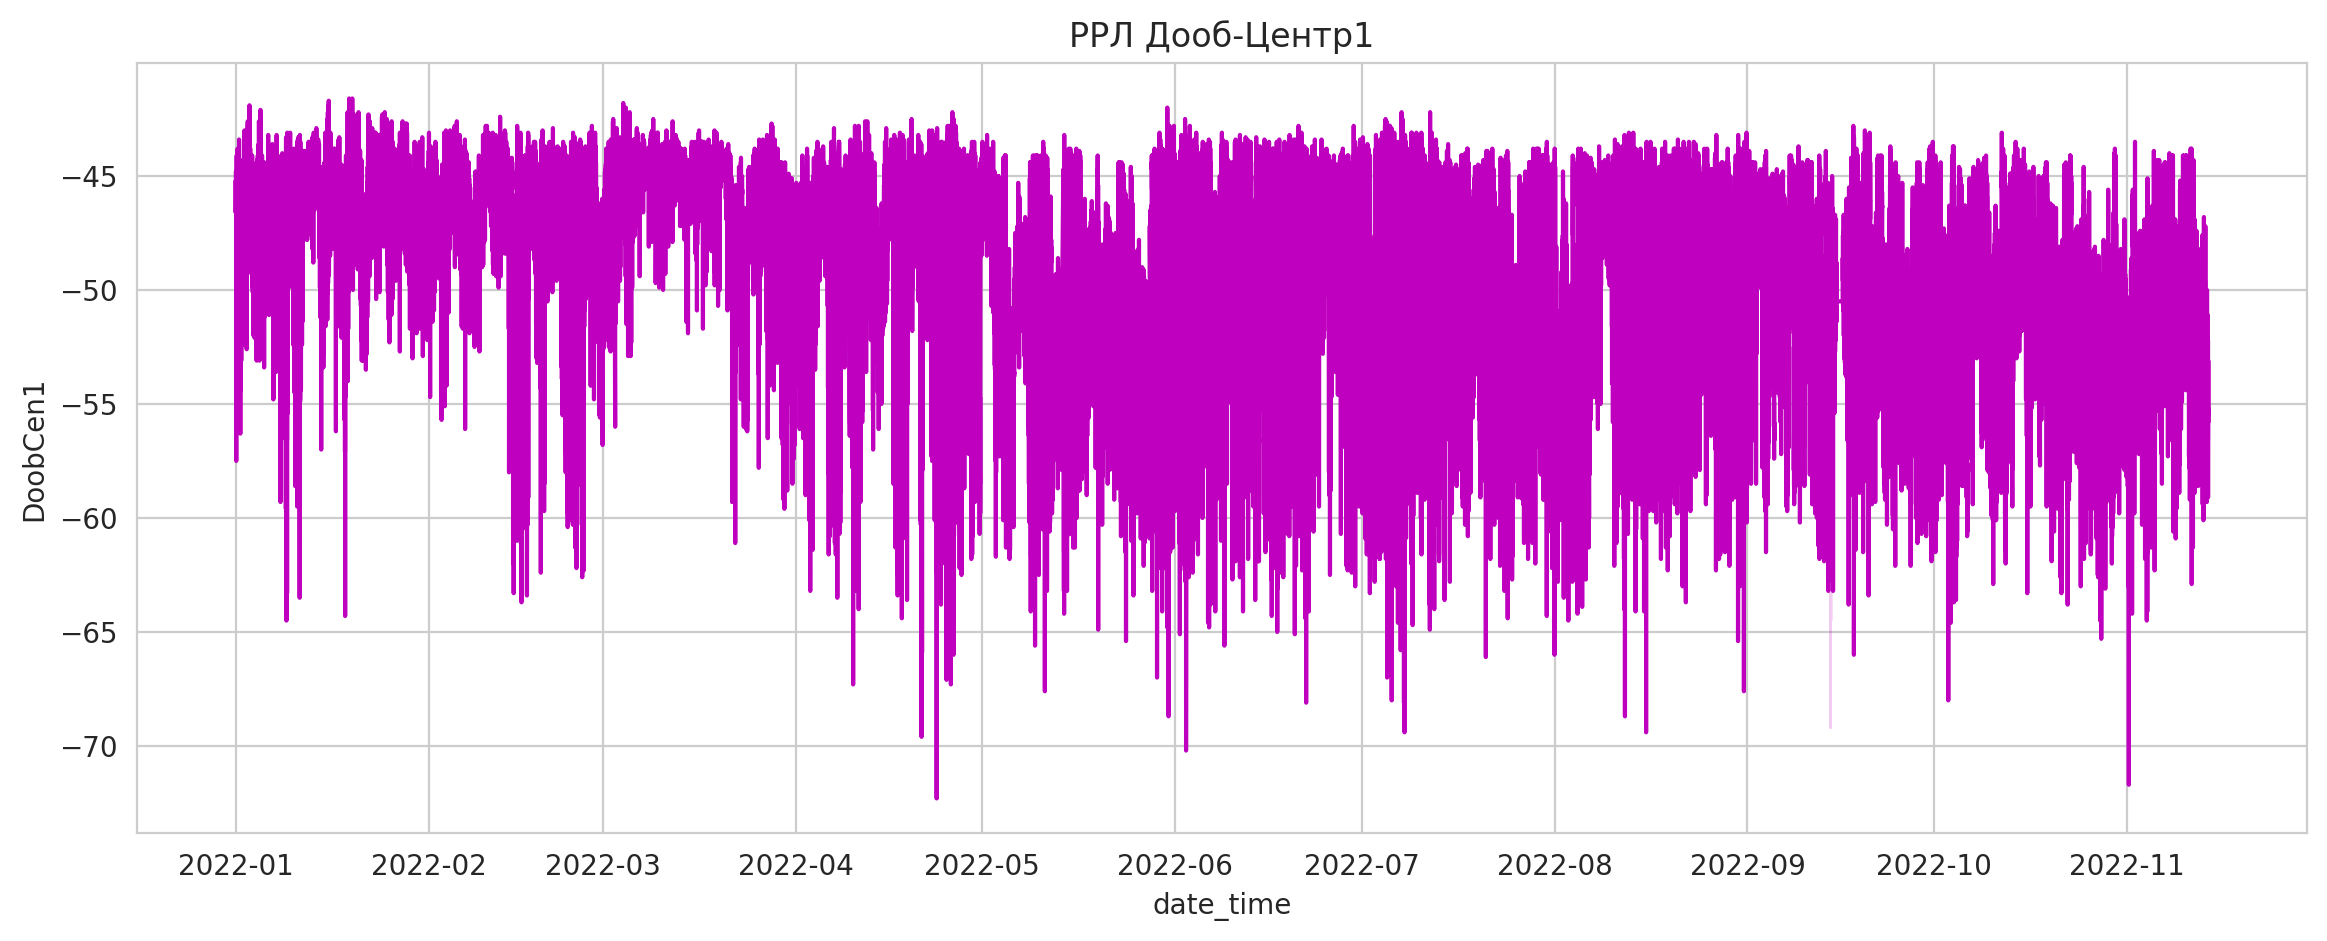

In [253]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen1", data = df5 , legend = 'auto', color = 'm')\
                                                   .set(title='РРЛ Дооб-Центр1');
plt.show()

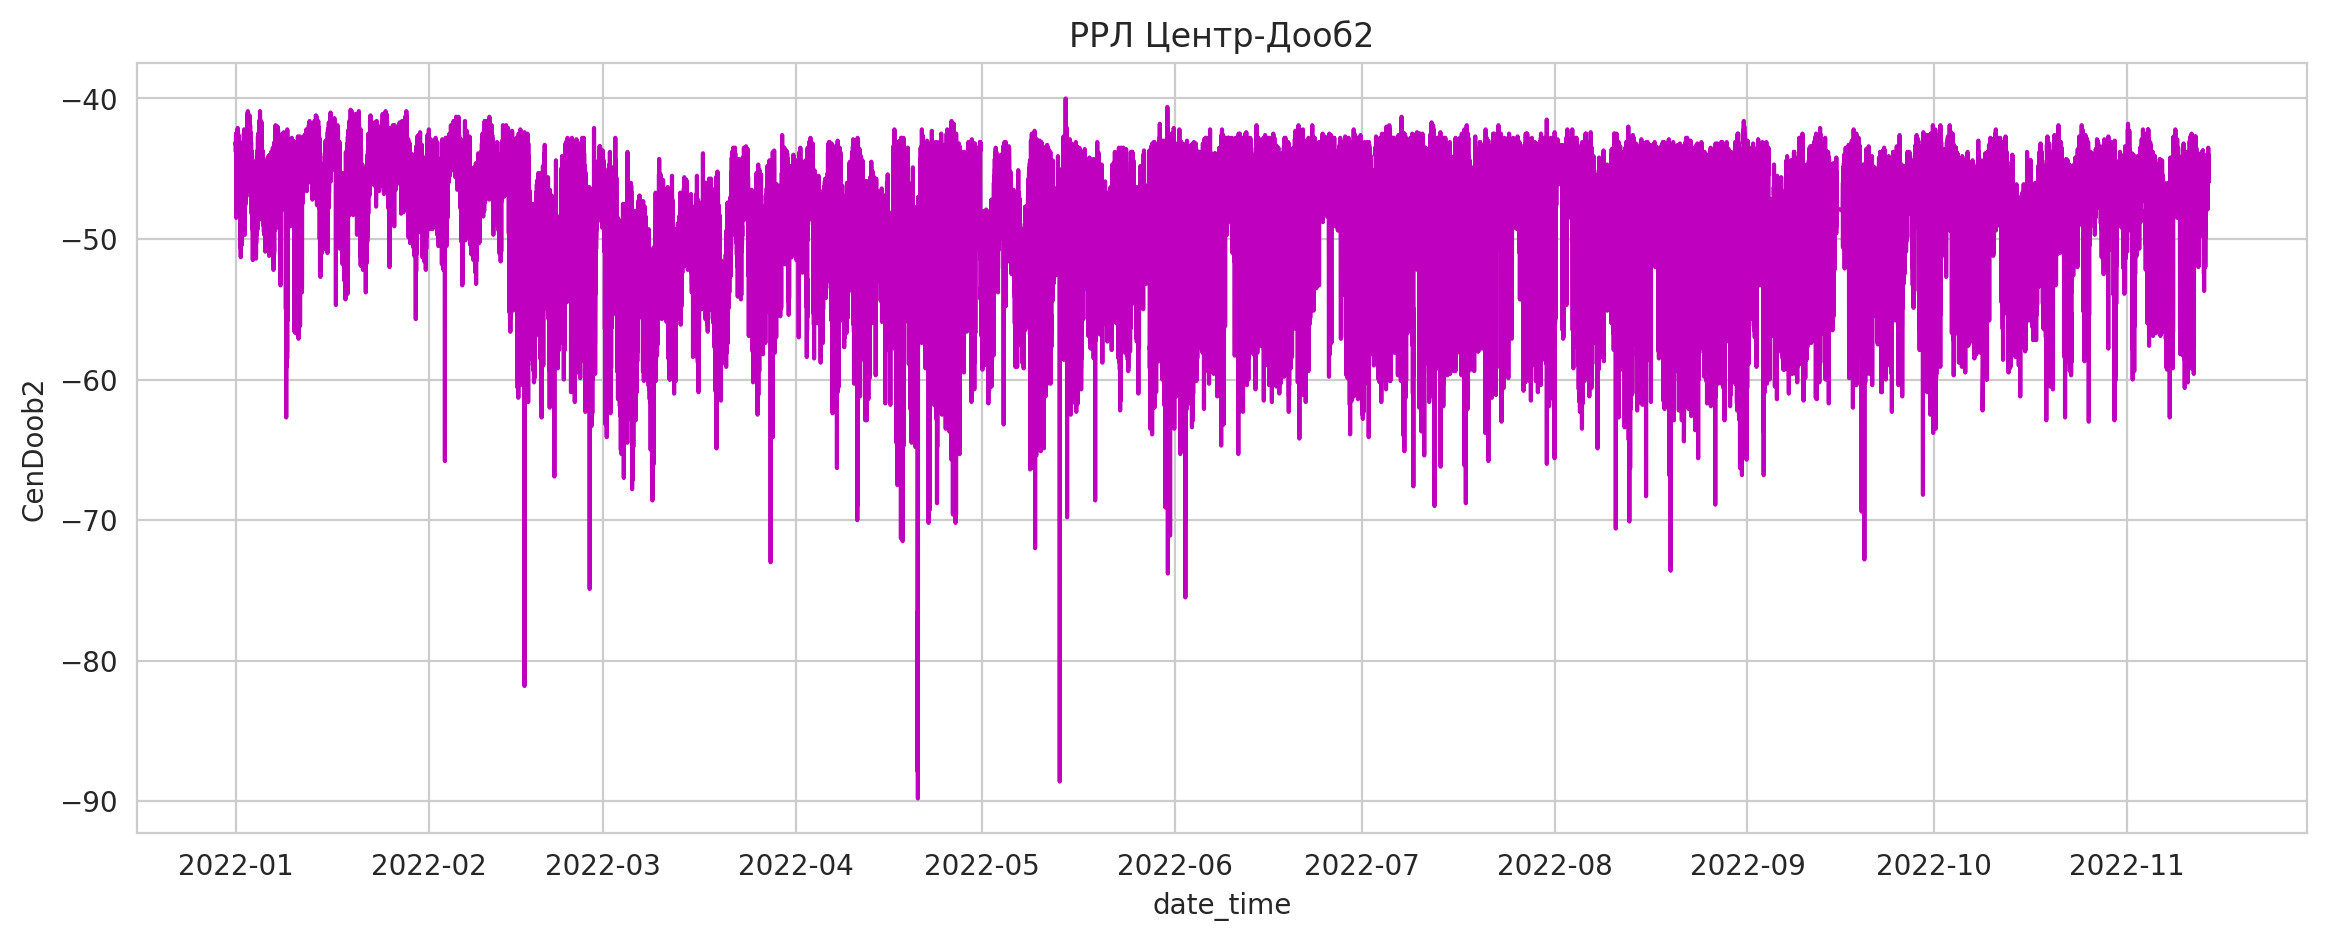

In [254]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "CenDoob2", data = df5 , legend = 'auto', color = 'm')\
                                                              .set(title='РРЛ Центр-Дооб2');
plt.show()

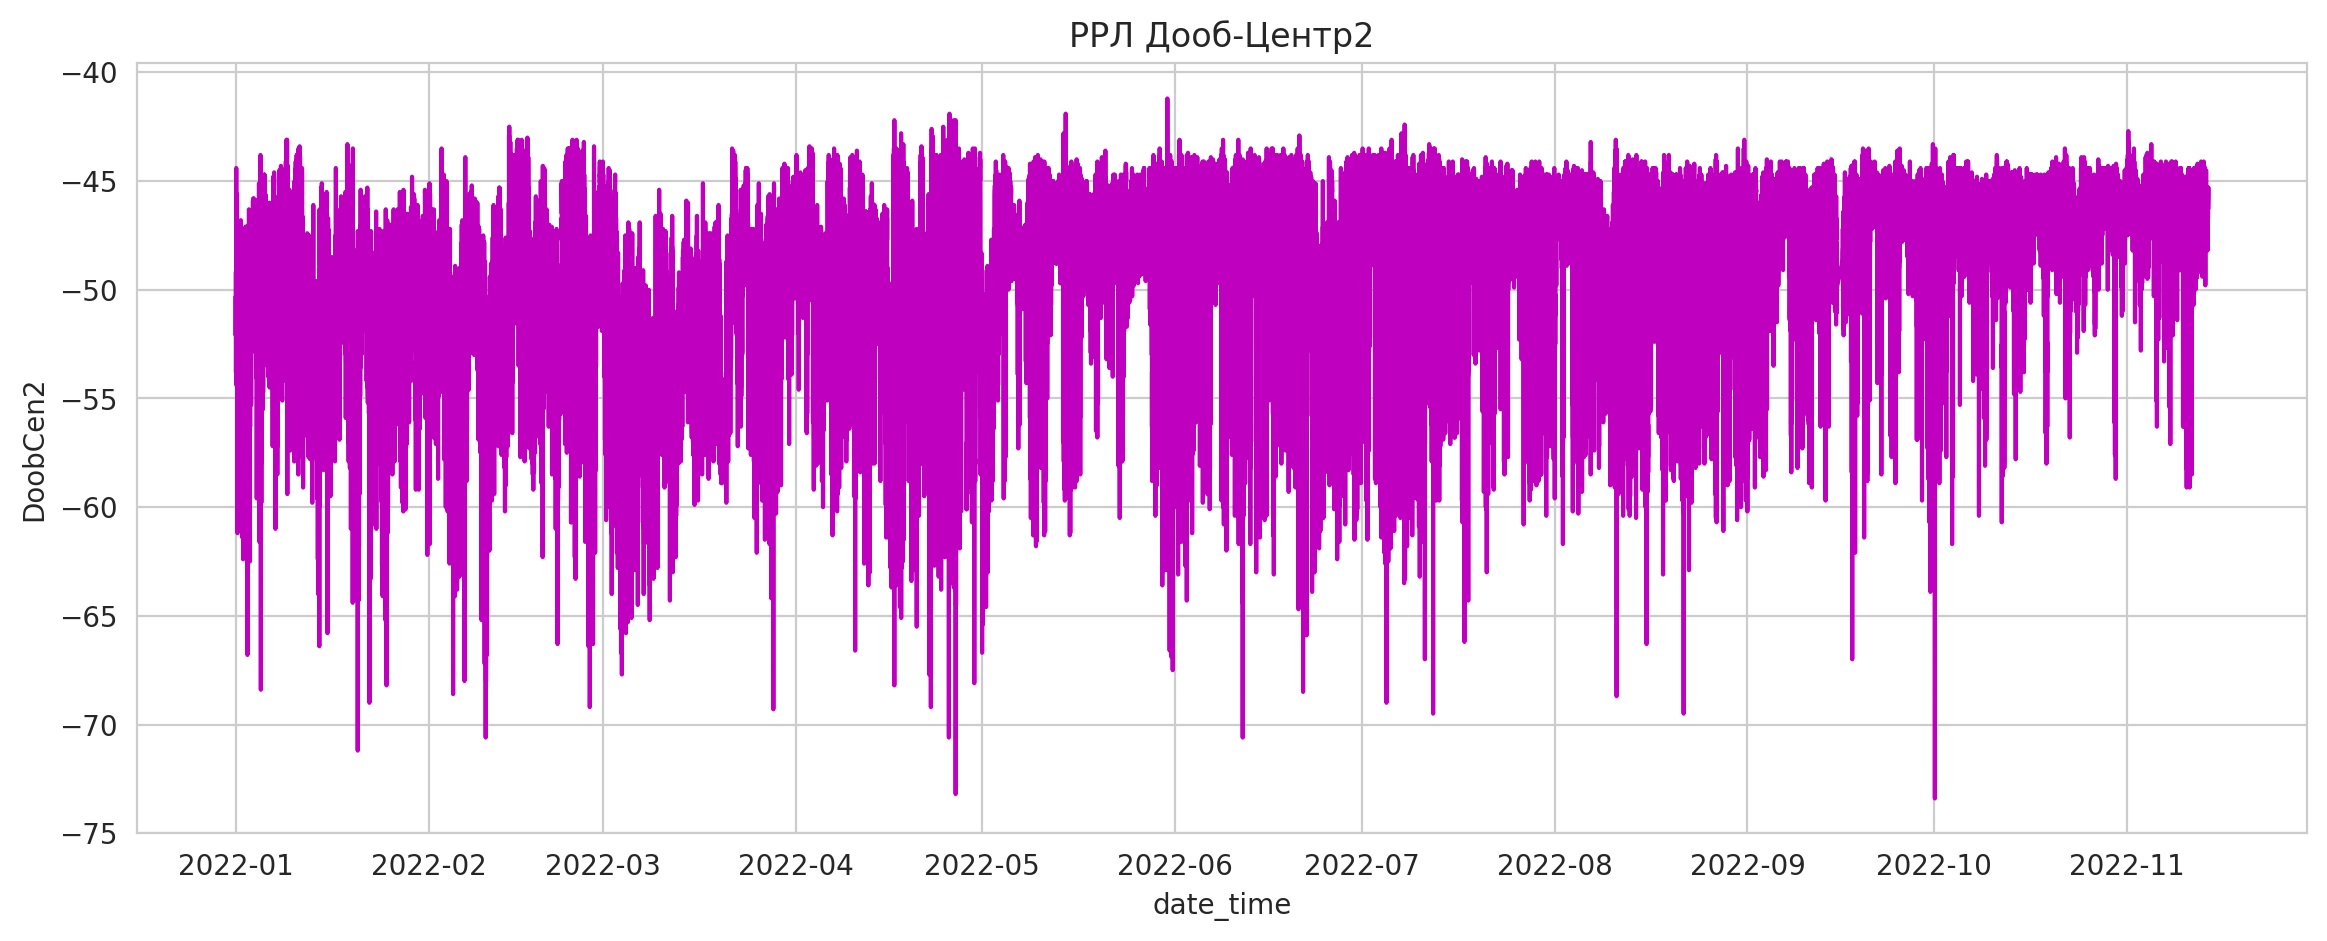

In [255]:
plt.figure(figsize=(14, 5))
sns.lineplot(x = "date_time", y = "DoobCen2", data = df5 , legend = 'auto', color = 'm')\
                                                              .set(title='РРЛ Дооб-Центр2');
plt.show()